# Bias in Advertising - IBM Developer Data Asset Exchange

## Aim of the Dataset

* To demonstrate discovery, measurement, and mitigation of bias in advertising.
* Develop a Targeting plan based on the inferences/relations between the conversions and the features.
* Showing the particular ad to those users who have these attributes.


## Description of the features in the Dataset

1. Age
2. Gender
3. Income
4. Political / Religious Affiliation
5. Parental Status
6. Home Ownership
7. Area (Rural/Urban)
8. Education Status

## Target Variable in the Dataset - Conversion

* A user is considered to have converted (true conversion=1) if they clicked on the ad.
* Predicted_Conversion, True_Conversion (Estimated, Actual) data given
* Predicted_Conversion is obtained by thresholding the predicted probability, provided in the dataset

In [ ]:
import pandas as pd

In [ ]:
data = pd.read_csv('ad_campaign_data.csv')
data

religion politics  college_educated  parents  homeowner   gender  \
0        Unknown  Unknown                 1        1          1  Unknown   
1          Other  Unknown                 1        1          1  Unknown   
2        Unknown  Unknown                 1        1          1        F   
3        Unknown  Unknown                 1        1          1        F   
4        Unknown  Unknown                 1        1          1        F   
...          ...      ...               ...      ...        ...      ...   
1443135    Other  Unknown                 1        1          1        F   
1443136  Unknown  Unknown                 1        1          0        F   
1443137  Unknown  Unknown                 1        1          1  Unknown   
1443138  Unknown  Unknown                 1        1          1        F   
1443139  Unknown  Unknown                 1        1          1        F   

           age   income     area  true_conversion  predicted_conversion  \
0        55-64  Unknown  Unknown                0                     0   
1        55-64  Unknown    Urban                0                     0   
2        55-64  Unknown  Unknown                0                     0   
3        55-64  Unknown  Unknown                0                     0   
4        55-64  Unknown    Urban                0                     0   
...        ...      ...      ...              ...                   ...   
1443135  25-34  Unknown  Unknown                0                     0   
1443136  55-64  Unknown  Unknown                0                     0   
1443137  55-64  Unknown  Unknown                0                     0   
1443138  55-64  Unknown  Unknown                0                     0   
1443139  55-64  Unknown  Unknown                0                     0   

         predicted_probability  
0                     0.001351  
1                     0.002238  
2                     0.002704  
3                     0.001967  
4                     0.001681  
...                        ...  
1443135               0.002318  
1443136               0.001420  
1443137               0.002879  
1443138               0.001905  
1443139               0.001575  

[1443140 rows x 12 columns]

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1443140 entries, 0 to 1443139
Data columns (total 12 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   religion               1443140 non-null  object 
 1   politics               1443140 non-null  object 
 2   college_educated       1443140 non-null  int64  
 3   parents                1443140 non-null  int64  
 4   homeowner              1443140 non-null  int64  
 5   gender                 1443140 non-null  object 
 6   age                    1443140 non-null  object 
 7   income                 1443140 non-null  object 
 8   area                   1443140 non-null  object 
 9   true_conversion        1443140 non-null  int64  
 10  predicted_conversion   1443140 non-null  int64  
 11  predicted_probability  1443140 non-null  float64
dtypes: float64(1), int64(5), object(6)
memory usage: 132.1+ MB


### Unique Values in each of the Features of the Dataset

In [ ]:
# Iterate through each column and print unique values
for column in data.columns:
    unique_values = data[column].unique()
    print(f"\nColumn: {column}")
    print(f"  Number of unique values: {len(unique_values)}")
    print(f"  Unique values: {unique_values}")


Column: religion
  Number of unique values: 3
  Unique values: ['Unknown' 'Other' 'Christianity']

Column: politics
  Number of unique values: 9
  Unique values: ['Unknown' 'Environmentalism' 'Conservatism' 'Conservative' 'Communism'
 'Moderate' 'Liberal' 'Liberalism' 'Socialism']

Column: college_educated
  Number of unique values: 2
  Unique values: [1 0]

Column: parents
  Number of unique values: 2
  Unique values: [1 0]

Column: homeowner
  Number of unique values: 2
  Unique values: [1 0]

Column: gender
  Number of unique values: 3
  Unique values: ['Unknown' 'F' 'M']

Column: age
  Number of unique values: 5
  Unique values: ['55-64' '25-34' 'Unknown' '45-54' '18-24']

Column: income
  Number of unique values: 3
  Unique values: ['Unknown' '<100K' '>100K']

Column: area
  Number of unique values: 3
  Unique values: ['Unknown' 'Urban' 'Rural']

Column: true_conversion
  Number of unique values: 2
  Unique values: [0 1]

Column: predicted_conversion
  Number of unique values: 2


### Finding the number of Unknown / Missing values in each column

In [ ]:
unknown_counts = data.apply(lambda x: x.value_counts().get('Unknown', 0))
total_rows = len(data)
unknown_percentages = (unknown_counts / total_rows) * 100
print("Number of 'Unknown' values in each column:")
print(unknown_counts)
print("\nPercentage of 'Unknown' values in each column:")
unknown_percentages

Number of 'Unknown' values in each column:
religion                  993135
politics                 1436160
college_educated               0
parents                        0
homeowner                      0
gender                    528824
age                        40624
income                   1375624
area                     1061855
true_conversion                0
predicted_conversion           0
predicted_probability          0
dtype: int64

Percentage of 'Unknown' values in each column:


religion                 68.817648
politics                 99.516332
college_educated          0.000000
parents                   0.000000
homeowner                 0.000000
gender                   36.643985
age                       2.814973
income                   95.321590
area                     73.579486
true_conversion           0.000000
predicted_conversion      0.000000
predicted_probability     0.000000
dtype: float64

### Occurences / Datapoints where the Conversion differs despite being same on all other features

In [ ]:
# Count occurrences where all columns except `true_conversion` and `predicted_conversion` are the same, but `true_conversion` differs
grouped_true_diff = data.groupby(['religion', 'politics', 'college_educated', 'parents', 'homeowner', 'gender', 'age', 'income', 'area'])['true_conversion']
true_diff_count = grouped_true_diff.nunique().reset_index()
true_diff_count = true_diff_count[true_diff_count['true_conversion'] > 1]
num_true_diff = true_diff_count.shape[0]

print(f"Number of instances where `true_conversion` differs despite identical other parameters: {num_true_diff}")

# Count occurrences where all columns except `true_conversion` and `predicted_conversion` are the same, but `predicted_conversion` differs
grouped_pred_diff = data.groupby(['religion', 'politics', 'college_educated', 'parents', 'homeowner', 'gender', 'age', 'income', 'area'])['predicted_conversion']
pred_diff_count = grouped_pred_diff.nunique().reset_index()
pred_diff_count = pred_diff_count[pred_diff_count['predicted_conversion'] > 1]
num_pred_diff = pred_diff_count.shape[0]

print(f"Number of instances where `predicted_conversion` differs despite identical other parameters: {num_pred_diff}")

Number of instances where `true_conversion` differs despite identical other parameters: 218
Number of instances where `predicted_conversion` differs despite identical other parameters: 176


### Comparison of True vs. Predicted Conversion from the Dataset

Value Counts:
0    1440766
1       2374
Name: true_conversion, dtype: int64 

0    1440773
1       2367
Name: predicted_conversion, dtype: int64


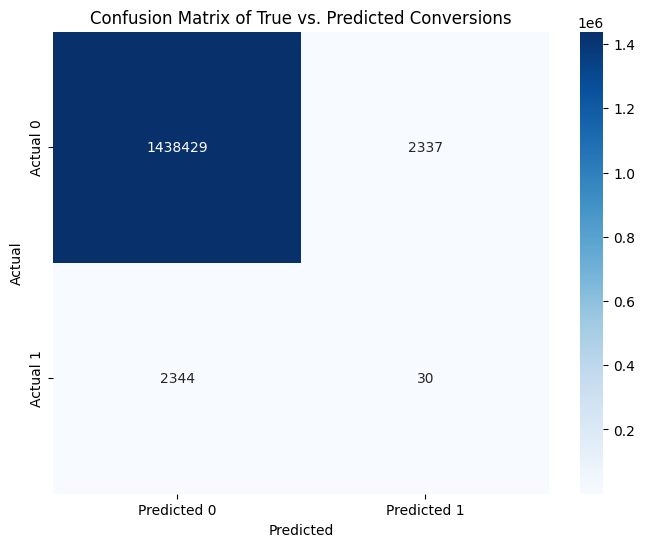

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import pandas as pd

# Calculate value counts for true_conversion and predicted_conversion
true_conversion_counts = data['true_conversion'].value_counts()
predicted_conversion_counts = data['predicted_conversion'].value_counts()

# Print value counts
print("Value Counts:")
print(true_conversion_counts, "\n")
print(predicted_conversion_counts)

# Confusion Matrix
conf_matrix = confusion_matrix(data['true_conversion'], data['predicted_conversion'])
conf_matrix_df = pd.DataFrame(conf_matrix, index=['Actual 0', 'Actual 1'], columns=['Predicted 0', 'Predicted 1'])

# Plotting the Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_df, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix of True vs. Predicted Conversions')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

### Predicted Probability Threshold for Conversion (1)

In [ ]:
# Find the threshold
threshold = data[data['predicted_conversion'] == 1]['predicted_probability'].min()

# Print the threshold value
print(f"The threshold for predicted_probability where predicted_conversion is 1 is: {threshold}")

The threshold for predicted_probability where predicted_conversion is 1 is: 0.365148522082927


In [ ]:
data = data.drop('predicted_probability', axis=1)

# Print the updated dataset
data

religion politics  college_educated  parents  homeowner   gender  \
0        Unknown  Unknown                 1        1          1  Unknown   
1          Other  Unknown                 1        1          1  Unknown   
2        Unknown  Unknown                 1        1          1        F   
3        Unknown  Unknown                 1        1          1        F   
4        Unknown  Unknown                 1        1          1        F   
...          ...      ...               ...      ...        ...      ...   
1443135    Other  Unknown                 1        1          1        F   
1443136  Unknown  Unknown                 1        1          0        F   
1443137  Unknown  Unknown                 1        1          1  Unknown   
1443138  Unknown  Unknown                 1        1          1        F   
1443139  Unknown  Unknown                 1        1          1        F   

           age   income     area  true_conversion  predicted_conversion  
0        55-64  Unknown  Unknown                0                     0  
1        55-64  Unknown    Urban                0                     0  
2        55-64  Unknown  Unknown                0                     0  
3        55-64  Unknown  Unknown                0                     0  
4        55-64  Unknown    Urban                0                     0  
...        ...      ...      ...              ...                   ...  
1443135  25-34  Unknown  Unknown                0                     0  
1443136  55-64  Unknown  Unknown                0                     0  
1443137  55-64  Unknown  Unknown                0                     0  
1443138  55-64  Unknown  Unknown                0                     0  
1443139  55-64  Unknown  Unknown                0                     0  

[1443140 rows x 11 columns]

In [ ]:
# Drop duplicate rows
data2 = data.drop_duplicates()
data2

religion politics  college_educated  parents  homeowner   gender  \
0        Unknown  Unknown                 1        1          1  Unknown   
1          Other  Unknown                 1        1          1  Unknown   
2        Unknown  Unknown                 1        1          1        F   
4        Unknown  Unknown                 1        1          1        F   
6        Unknown  Unknown                 1        1          1        M   
...          ...      ...               ...      ...        ...      ...   
1434335    Other  Unknown                 1        1          1  Unknown   
1434358    Other  Unknown                 1        0          1  Unknown   
1435329    Other  Unknown                 1        1          1        F   
1441325    Other  Unknown                 0        1          0        M   
1441742    Other  Unknown                 0        1          1        F   

           age   income     area  true_conversion  predicted_conversion  
0        55-64  Unknown  Unknown                0                     0  
1        55-64  Unknown    Urban                0                     0  
2        55-64  Unknown  Unknown                0                     0  
4        55-64  Unknown    Urban                0                     0  
6        55-64  Unknown  Unknown                0                     0  
...        ...      ...      ...              ...                   ...  
1434335  45-54  Unknown  Unknown                0                     1  
1434358  55-64  Unknown    Rural                0                     1  
1435329  18-24    >100K    Urban                0                     0  
1441325  45-54    <100K    Urban                0                     0  
1441742  45-54    >100K    Urban                0                     0  

[2591 rows x 11 columns]

### Value Counts in each of the features

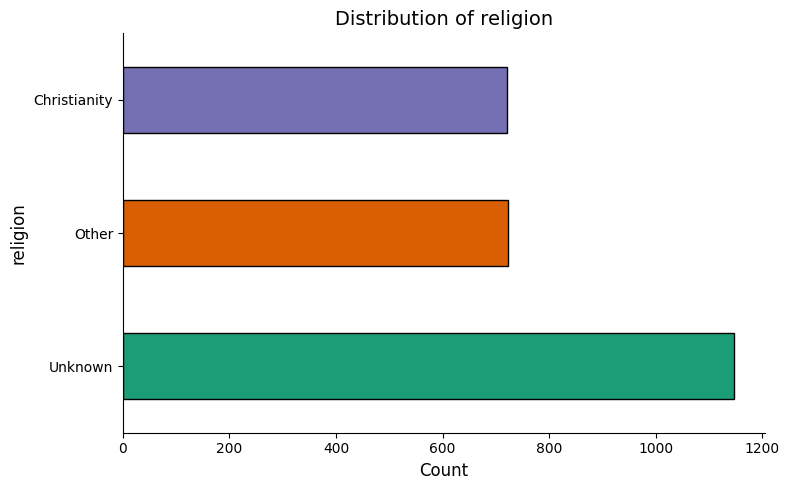

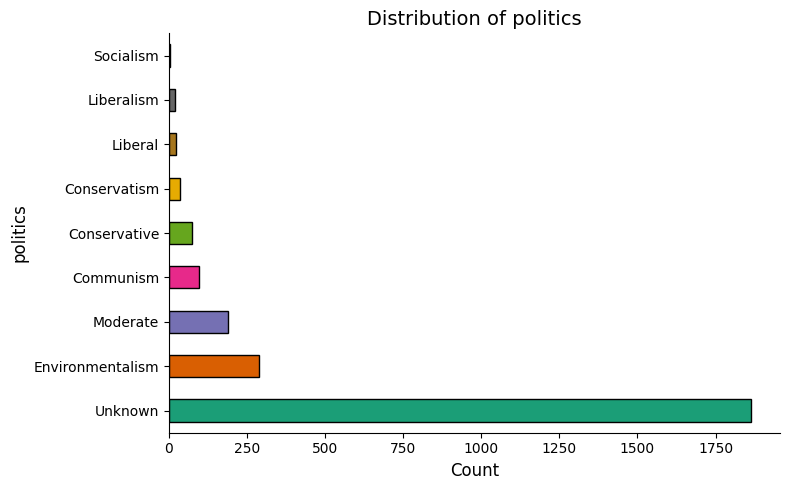

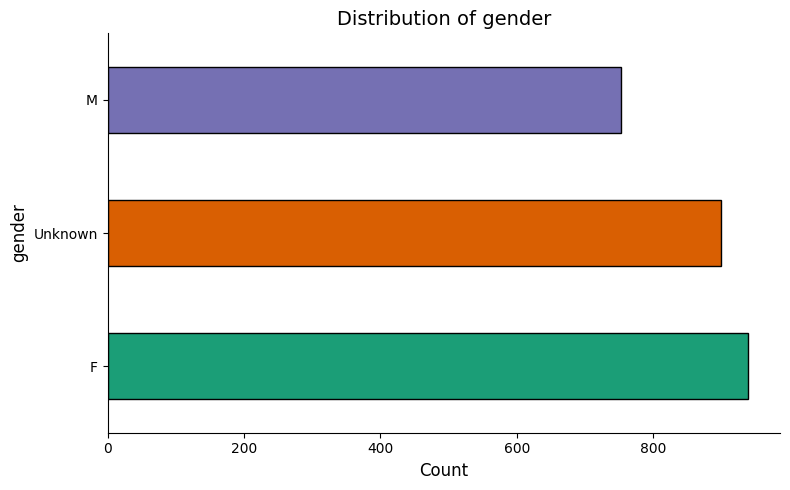

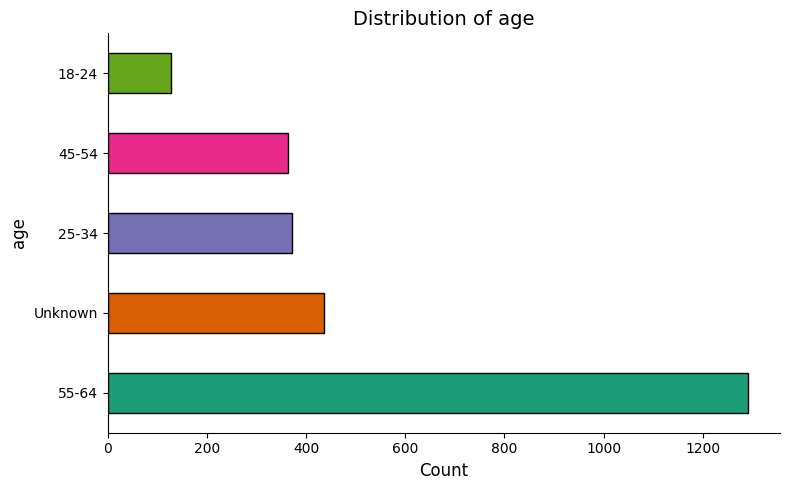

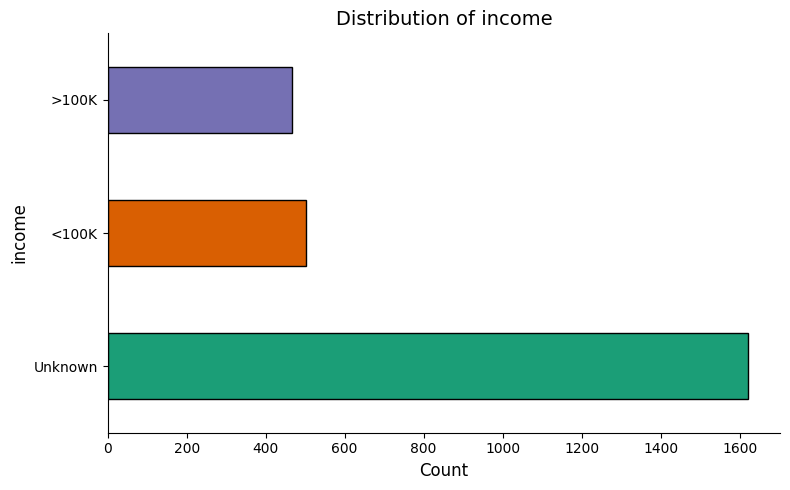

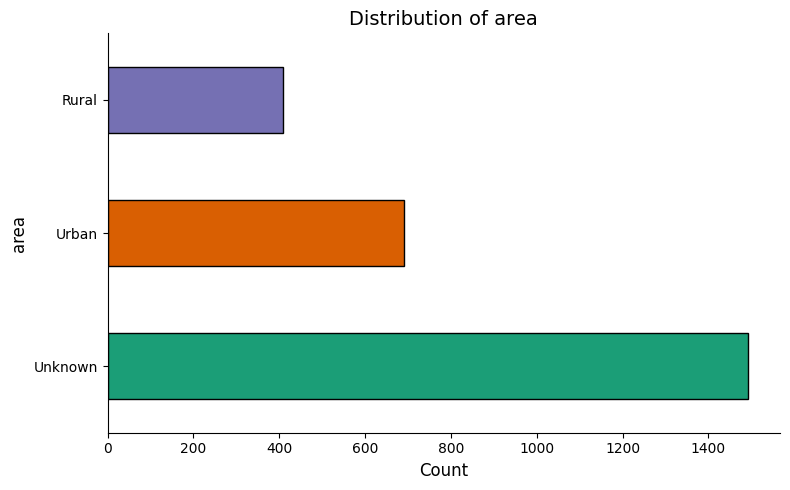

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns

# Set a color palette
palette = sns.color_palette('Dark2')

# Loop through each column in the dataset
for col in data2.columns:
    if data2[col].dtype == 'object':  # Only plot categorical columns
        plt.figure(figsize=(8, 5))

        # Get the value counts for the column
        counts = data2[col].value_counts()

        # Plot using different colors for each category in the column
        counts.plot(
            kind='barh',
            color=[palette[i % len(palette)] for i in range(len(counts))],
            edgecolor='black'
        )

        # Customize the plot
        plt.title(f'Distribution of {col}', fontsize=14)
        plt.xlabel('Count', fontsize=12)
        plt.ylabel(col, fontsize=12)

        # Remove top and right spines
        plt.gca().spines[['top', 'right']].set_visible(False)

        # Show the plot
        plt.tight_layout()
        plt.show()


In [ ]:
unknown_counts = data2.apply(lambda x: x.value_counts().get('Unknown', 0))
total_rows = len(data2)
unknown_percentages = (unknown_counts / total_rows) * 100
print("Number of 'Unknown' values in each column:")
print(unknown_counts)
print("\nPercentage of 'Unknown' values in each column:")
unknown_percentages

Number of 'Unknown' values in each column:
religion                1147
politics                1863
college_educated           0
parents                    0
homeowner                  0
gender                   899
age                      436
income                  1621
area                    1492
true_conversion            0
predicted_conversion       0
dtype: int64

Percentage of 'Unknown' values in each column:


religion                44.268622
politics                71.902740
college_educated         0.000000
parents                  0.000000
homeowner                0.000000
gender                  34.697028
age                     16.827480
income                  62.562717
area                    57.583944
true_conversion          0.000000
predicted_conversion     0.000000
dtype: float64

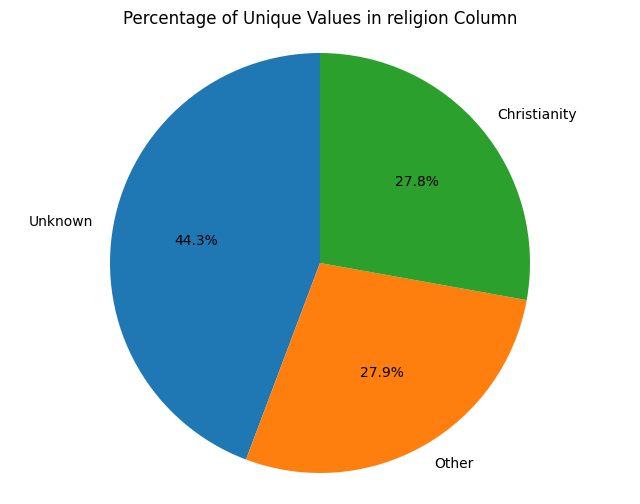

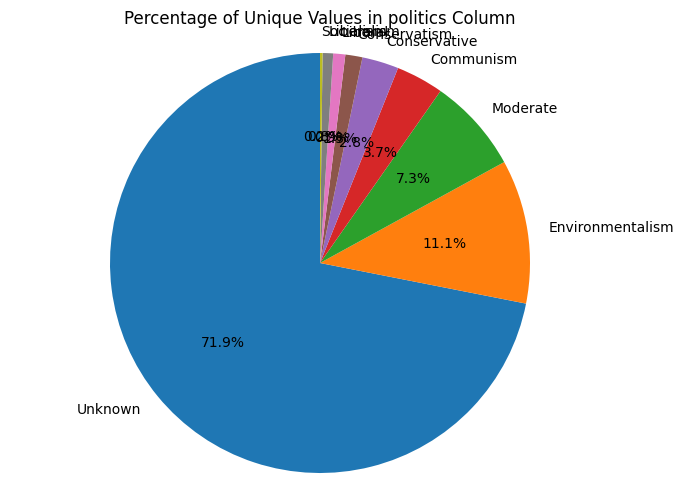

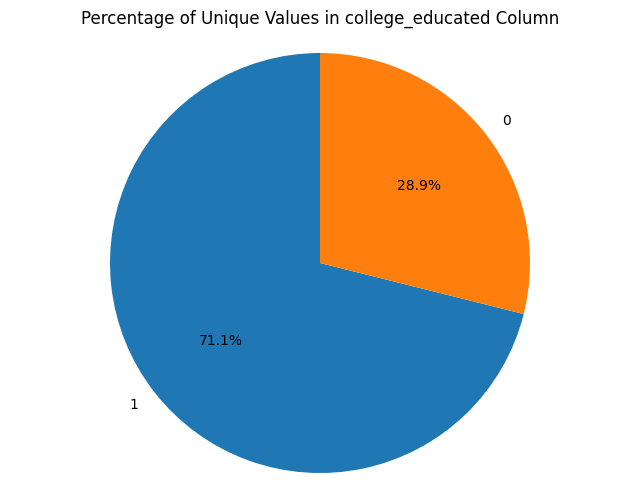

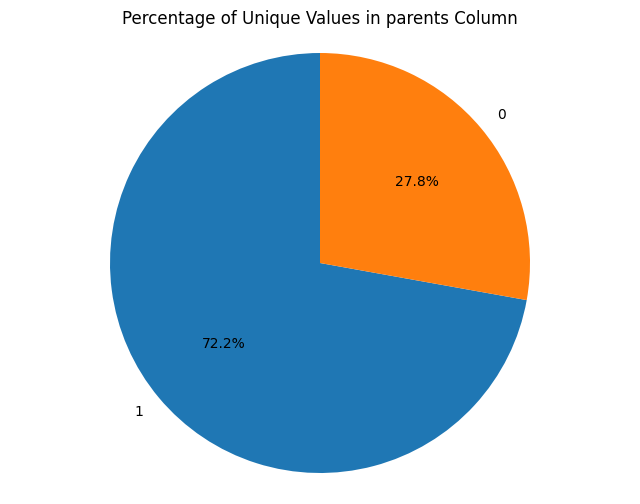

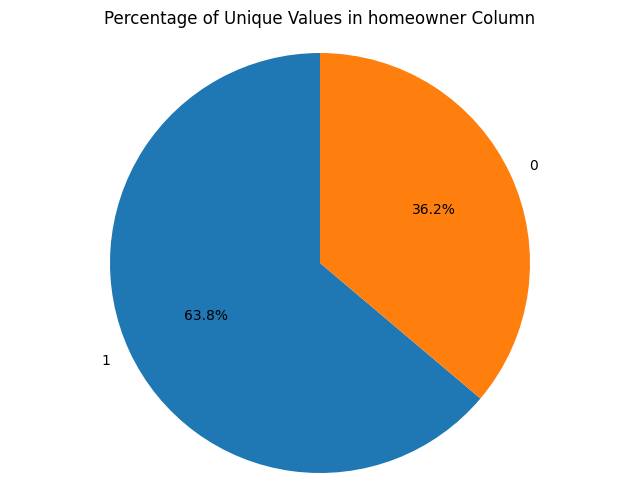

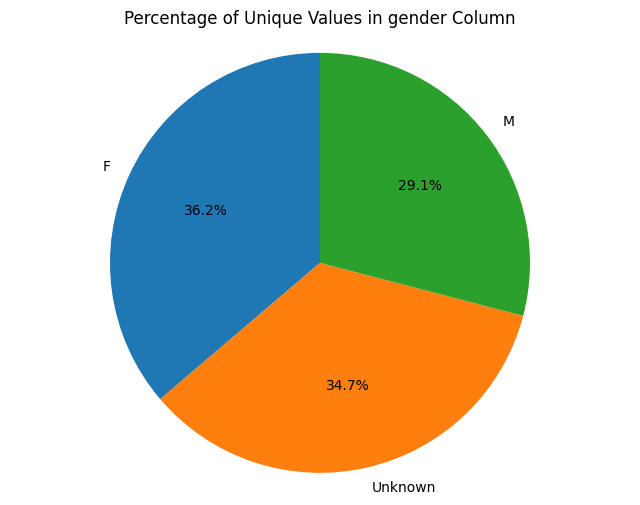

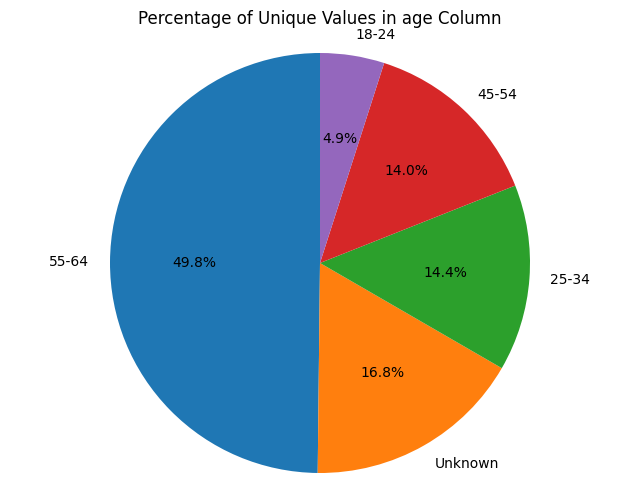

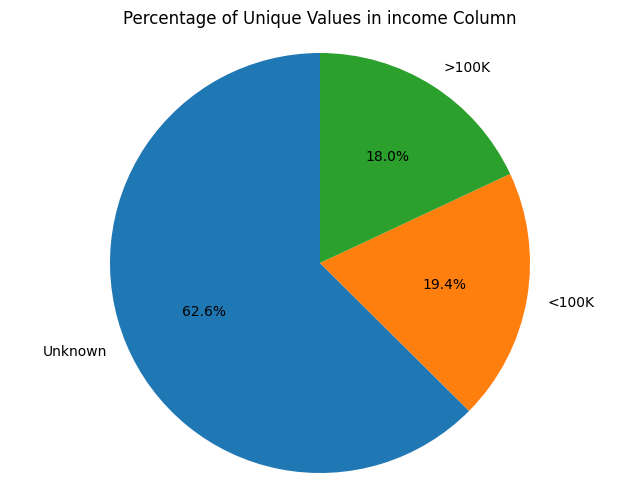

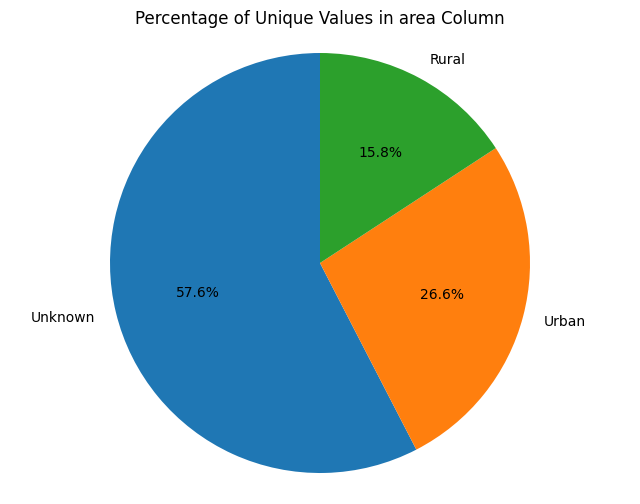

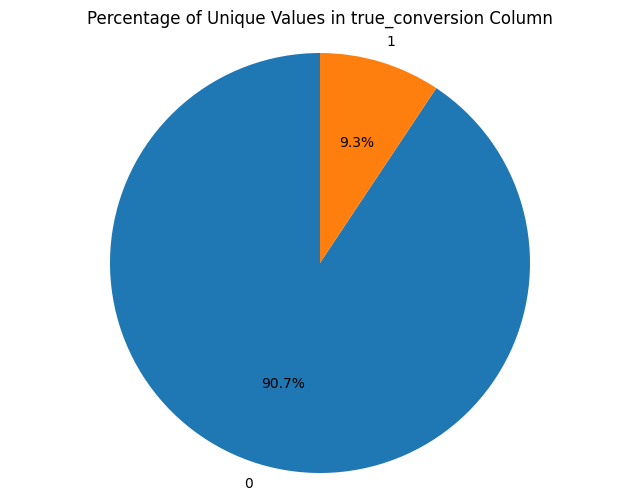

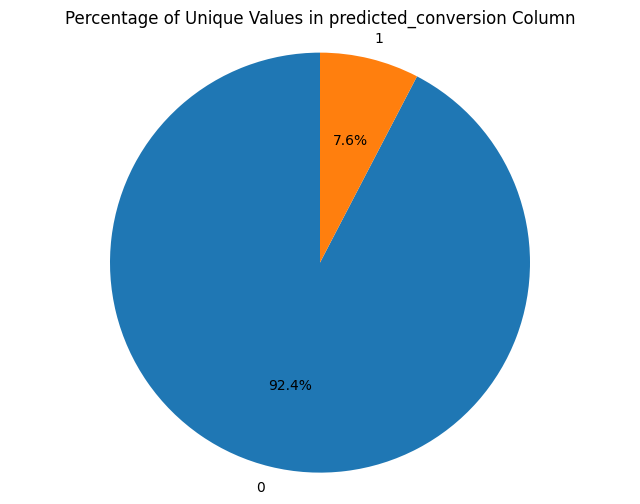

In [ ]:
for col in data2.columns:
    # Calculate percentage of unique values
    unique_counts = data2[col].value_counts(normalize=True) * 100

    # Create pie chart
    plt.figure(figsize=(8, 6))
    plt.pie(unique_counts, labels=unique_counts.index, autopct='%1.1f%%', startangle=90)
    plt.title(f'Percentage of Unique Values in {col} Column')
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.show()

### Handling Missing Data

As the missing data is very high, instead of dropping the column, we are replacing the values of "Unknown" in the dataset based on the proportion of other unique values in that specific column / feature of the dataset

In [ ]:
import pandas as pd

# Dictionary to store the count of 'Unknown' values filled for each column
unknown_counts = {}

for col in data2.columns:
    if data2[col].dtype == 'object':  # Only process categorical columns
        # Get the distribution of values, excluding 'Unknown'
        value_counts = data2[col].value_counts(normalize=True).drop('Unknown', errors='ignore')

        # Count the number of 'Unknown' values in the column
        unknown_count = data2[col].value_counts().get('Unknown', 0)

        if unknown_count > 0:
            # Sample values based on the proportions in value_counts to fill all 'Unknown' entries
            fill_values = pd.Series(
                value_counts.sample(n=unknown_count, replace=True, weights=value_counts.values).index
            )
            data2.loc[data2[col] == 'Unknown', col] = fill_values.values
            unknown_counts[col] = unknown_count  # Track the count of filled 'Unknown' values

# Display details of 'Unknown' values filled for each column
print("\nCount of 'Unknown' values filled in each column:")
for col, count in unknown_counts.items():
    print(f"{col}: {count} 'Unknown' values filled")

# Display final count of 'Unknown' values to verify filling
print("\nFinal count of 'Unknown' values in each column after filling:")
print(data2.isin(['Unknown']).sum())

data2


Count of 'Unknown' values filled in each column:
religion: 1147 'Unknown' values filled
politics: 1863 'Unknown' values filled
gender: 899 'Unknown' values filled
age: 436 'Unknown' values filled
income: 1621 'Unknown' values filled
area: 1492 'Unknown' values filled

Final count of 'Unknown' values in each column after filling:
religion                0
politics                0
college_educated        0
parents                 0
homeowner               0
gender                  0
age                     0
income                  0
area                    0
true_conversion         0
predicted_conversion    0
dtype: int64


religion          politics  college_educated  parents  homeowner  \
0        Christianity  Environmentalism                 1        1          1   
1               Other         Communism                 1        1          1   
2               Other      Conservative                 1        1          1   
4               Other          Moderate                 1        1          1   
6        Christianity         Communism                 1        1          1   
...               ...               ...               ...      ...        ...   
1434335         Other          Moderate                 1        1          1   
1434358         Other           Liberal                 1        0          1   
1435329         Other      Conservatism                 1        1          1   
1441325         Other          Moderate                 0        1          0   
1441742         Other      Conservatism                 0        1          1   

        gender    age income   area  true_conversion  predicted_conversion  
0            M  55-64  <100K  Urban                0                     0  
1            M  55-64  <100K  Urban                0                     0  
2            F  55-64  <100K  Urban                0                     0  
4            F  55-64  >100K  Urban                0                     0  
6            M  55-64  <100K  Rural                0                     0  
...        ...    ...    ...    ...              ...                   ...  
1434335      F  45-54  <100K  Rural                0                     1  
1434358      M  55-64  <100K  Rural                0                     1  
1435329      F  18-24  >100K  Urban                0                     0  
1441325      M  45-54  <100K  Urban                0                     0  
1441742      F  45-54  >100K  Urban                0                     0  

[2591 rows x 11 columns]

### Value Counts of Features after replacing Unknown Values

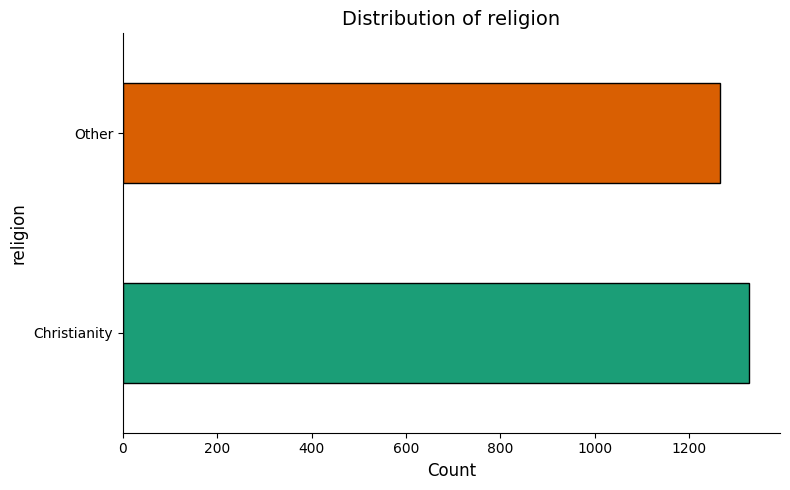

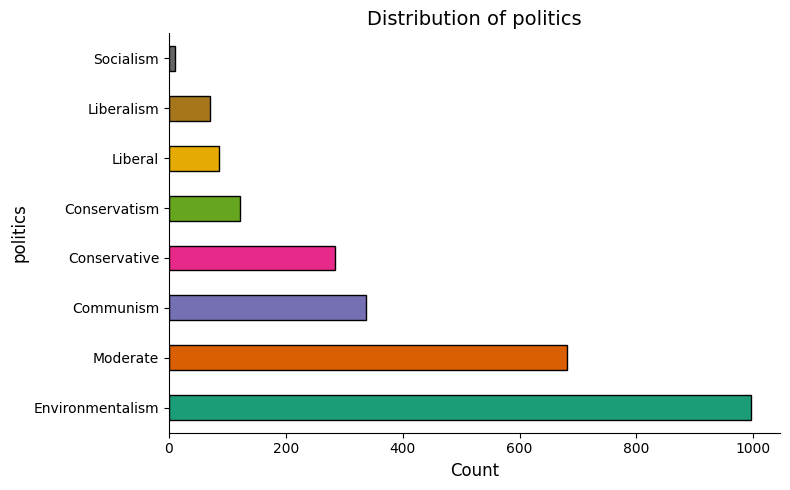

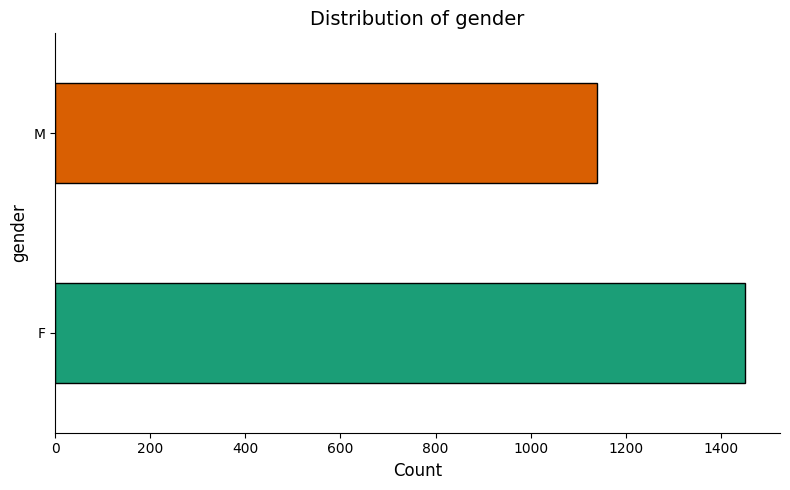

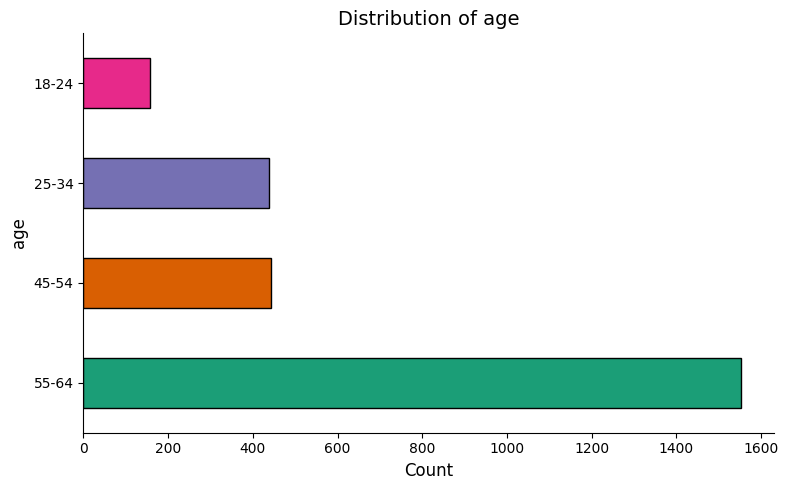

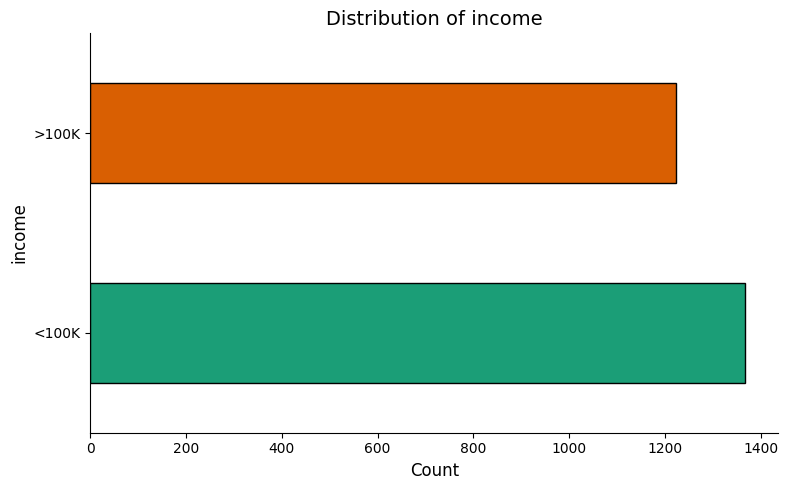

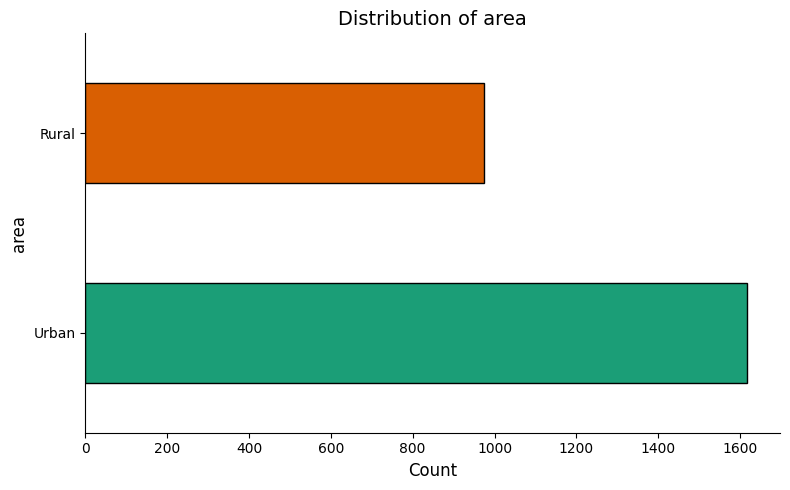

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns

# Set a color palette
palette = sns.color_palette('Dark2')

# Loop through each column in the dataset
for col in data2.columns:
    if data2[col].dtype == 'object':  # Only plot categorical columns
        plt.figure(figsize=(8, 5))

        # Get the value counts for the column
        counts = data2[col].value_counts()

        # Plot using different colors for each category in the column
        counts.plot(
            kind='barh',
            color=[palette[i % len(palette)] for i in range(len(counts))],
            edgecolor='black'
        )

        # Customize the plot
        plt.title(f'Distribution of {col}', fontsize=14)
        plt.xlabel('Count', fontsize=12)
        plt.ylabel(col, fontsize=12)

        # Remove top and right spines
        plt.gca().spines[['top', 'right']].set_visible(False)

        # Show the plot
        plt.tight_layout()
        plt.show()


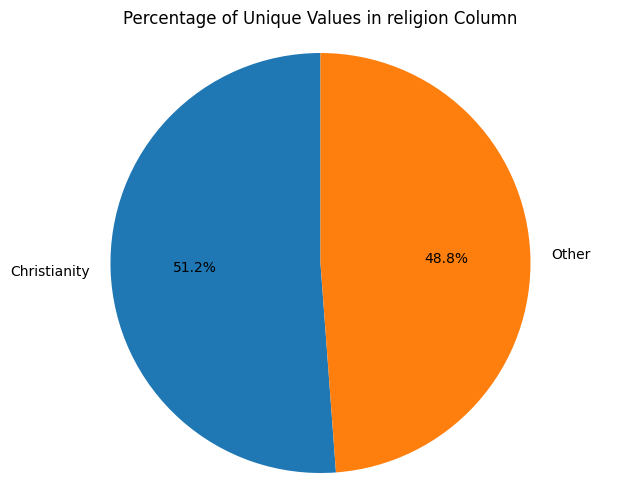

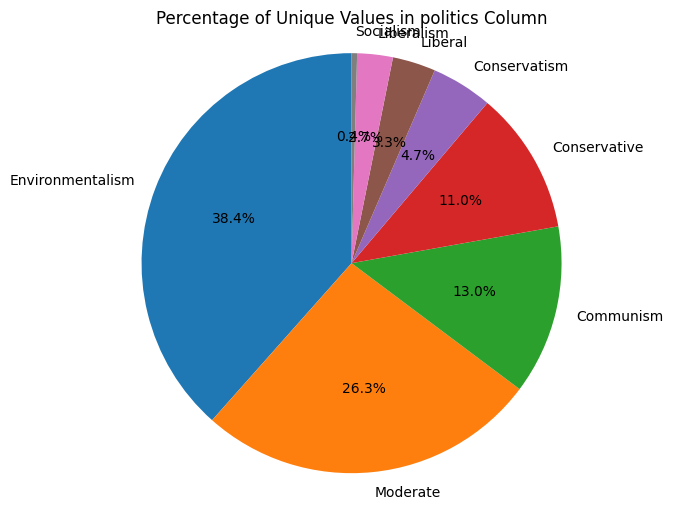

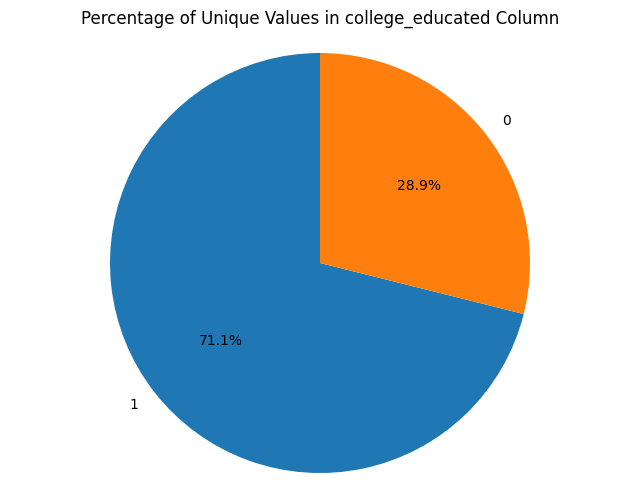

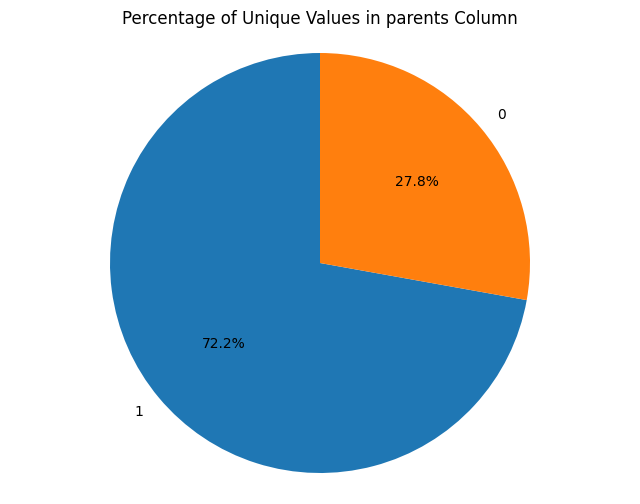

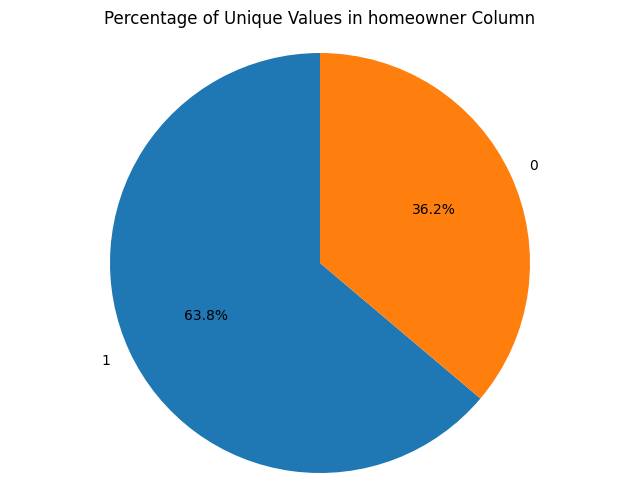

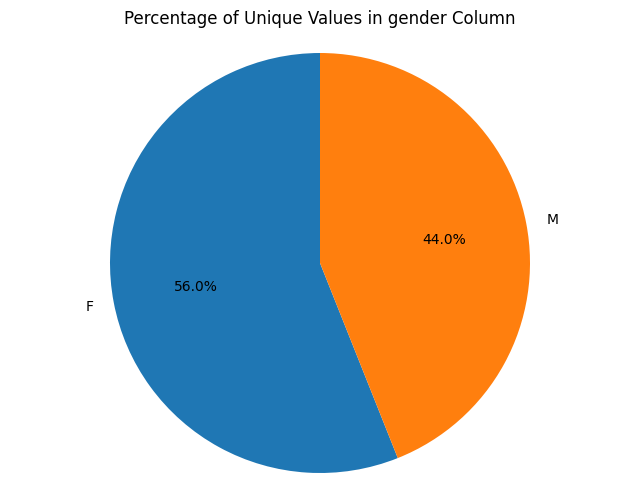

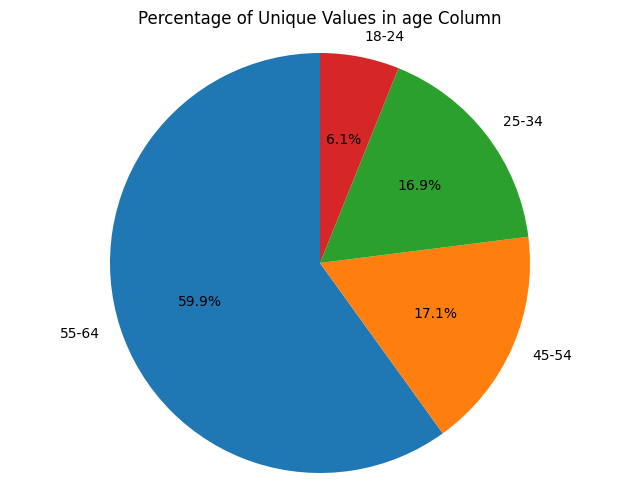

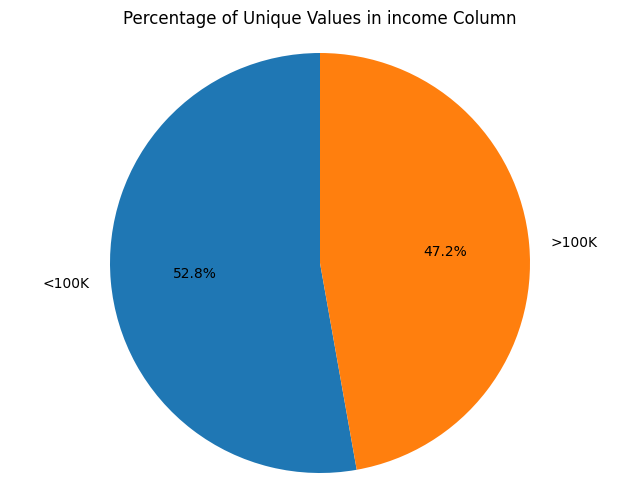

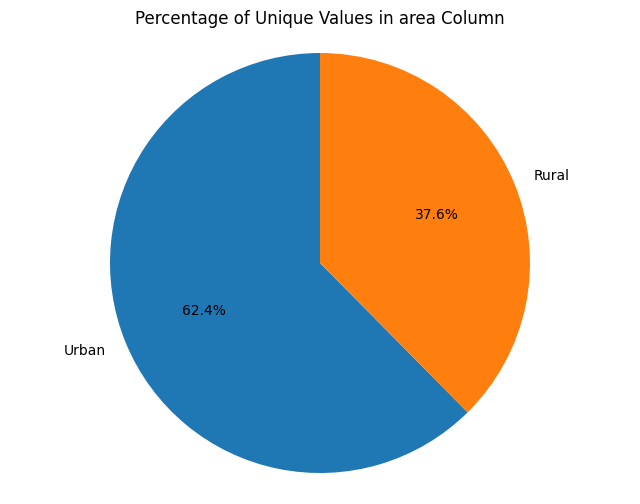

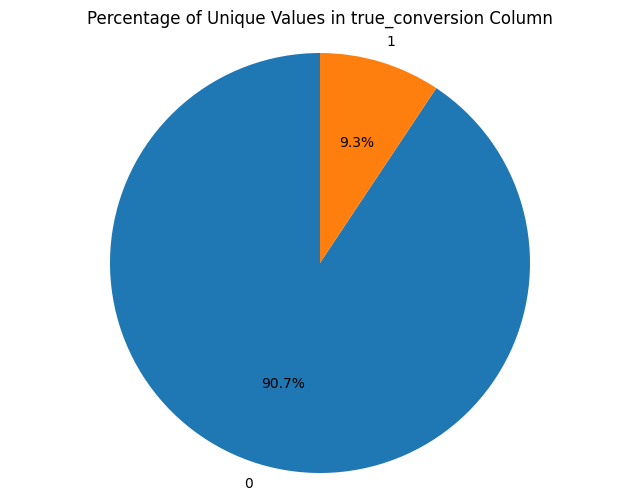

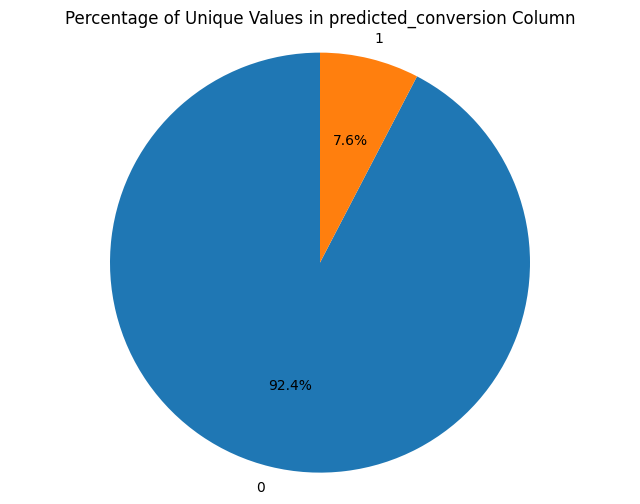

In [ ]:
for col in data2.columns:
    # Calculate percentage of unique values
    unique_counts = data2[col].value_counts(normalize=True) * 100

    # Create pie chart
    plt.figure(figsize=(8, 6))
    plt.pie(unique_counts, labels=unique_counts.index, autopct='%1.1f%%', startangle=90)
    plt.title(f'Percentage of Unique Values in {col} Column')
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.show()

### Features vs. True & Predicted Conversions

Value Counts for True Conversion within each category of religion:
religion      true_conversion
Christianity  0                  234463
              1                     398
Other         0                  214787
              1                     357
Unknown       0                  991516
              1                    1619
Name: true_conversion, dtype: int64

Value Counts for Predicted Conversion within each category of religion:
religion      predicted_conversion
Christianity  0                       234478
              1                          383
Other         0                       214767
              1                          377
Unknown       0                       991528
              1                         1607
Name: predicted_conversion, dtype: int64



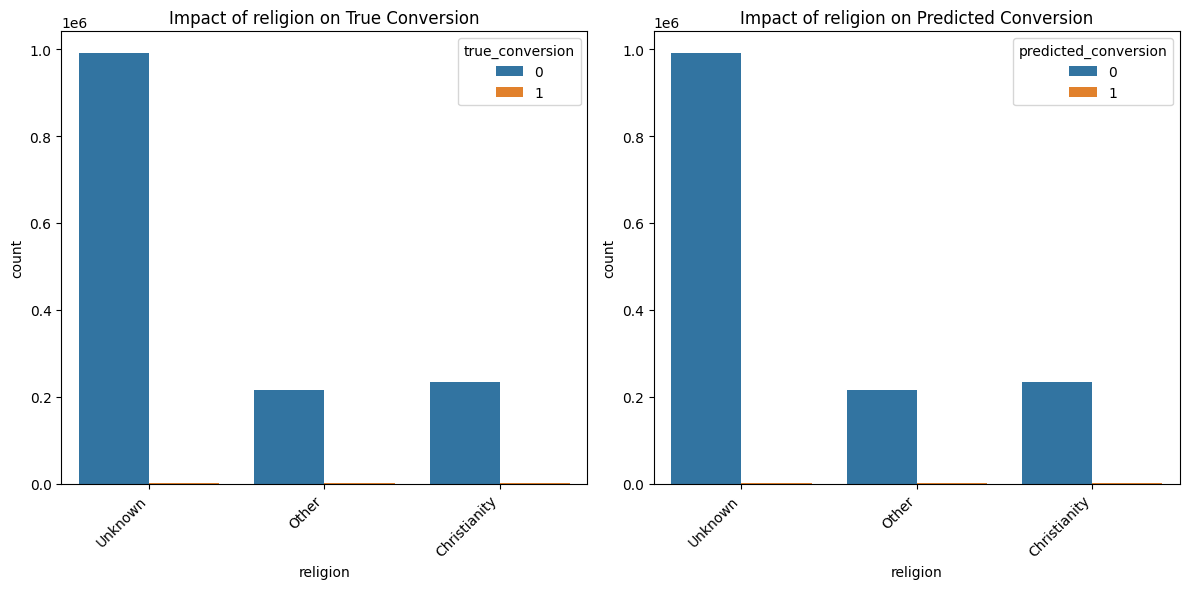

Value Counts for True Conversion within each category of politics:
politics          true_conversion
Communism         0                      402
                  1                        2
Conservatism      0                       79
Conservative      0                      210
Environmentalism  0                     4025
                  1                        7
Liberal           0                       44
Liberalism        0                       38
Moderate          0                     2164
                  1                        4
Socialism         0                        5
Unknown           0                  1433799
                  1                     2361
Name: true_conversion, dtype: int64

Value Counts for Predicted Conversion within each category of politics:
politics          predicted_conversion
Communism         0                           404
Conservatism      0                            79
Conservative      0                           209
                

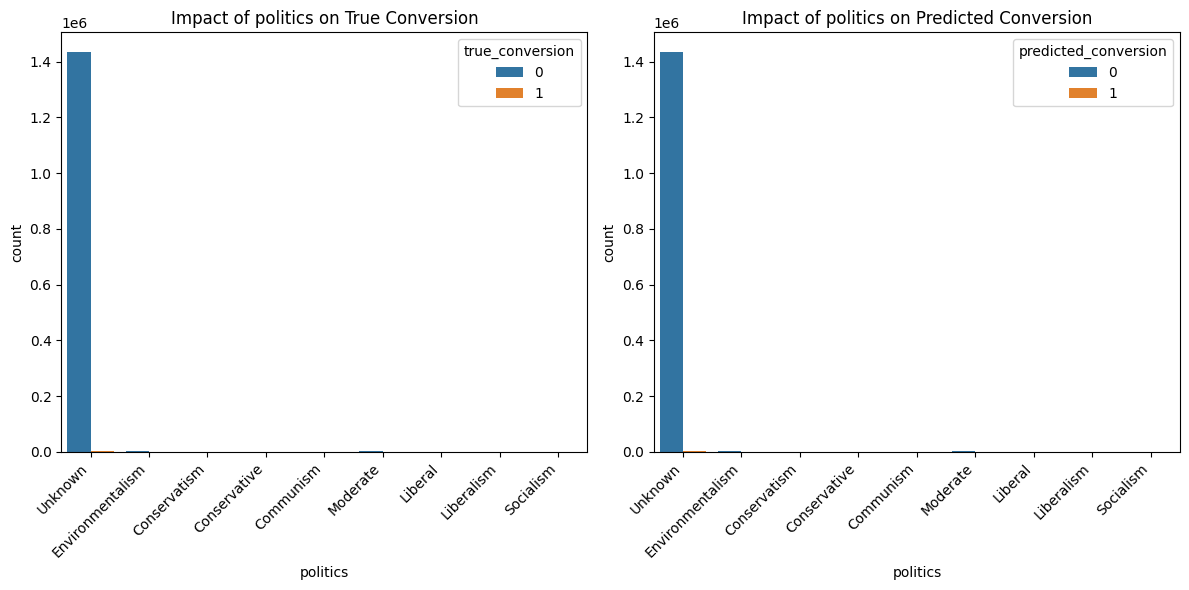

Value Counts for True Conversion within each category of college_educated:
college_educated  true_conversion
0                 0                    81602
                  1                      134
1                 0                  1359164
                  1                     2240
Name: true_conversion, dtype: int64

Value Counts for Predicted Conversion within each category of college_educated:
college_educated  predicted_conversion
0                 0                         81601
                  1                           135
1                 0                       1359172
                  1                          2232
Name: predicted_conversion, dtype: int64



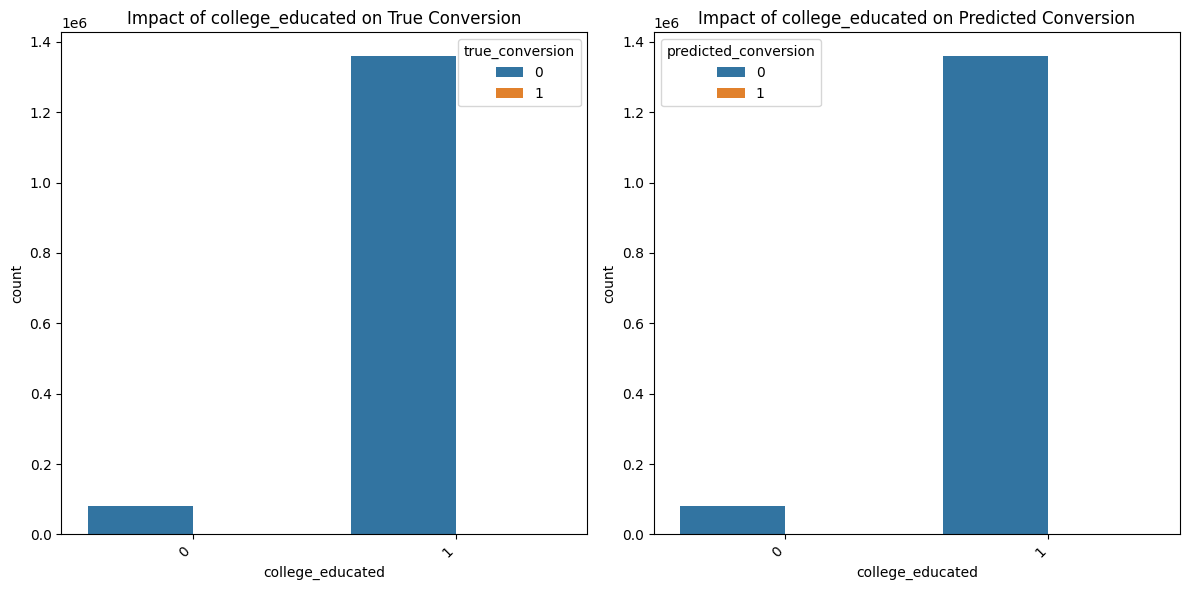

Value Counts for True Conversion within each category of parents:
parents  true_conversion
0        0                    77054
         1                      114
1        0                  1363712
         1                     2260
Name: true_conversion, dtype: int64

Value Counts for Predicted Conversion within each category of parents:
parents  predicted_conversion
0        0                         77037
         1                           131
1        0                       1363736
         1                          2236
Name: predicted_conversion, dtype: int64



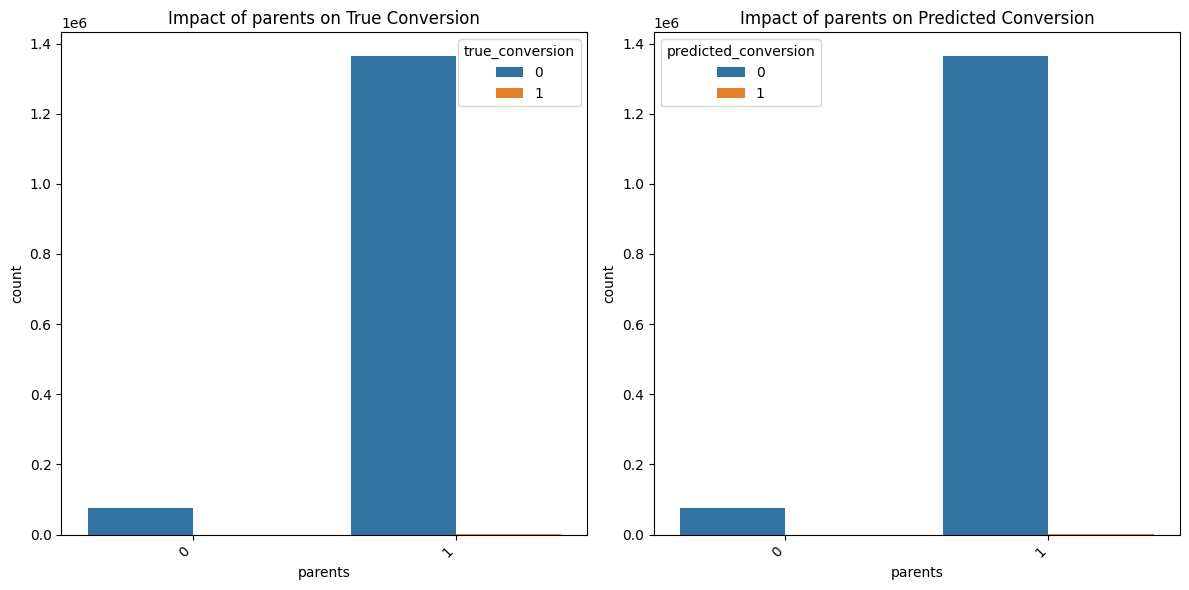

Value Counts for True Conversion within each category of homeowner:
homeowner  true_conversion
0          0                   174322
           1                      332
1          0                  1266444
           1                     2042
Name: true_conversion, dtype: int64

Value Counts for Predicted Conversion within each category of homeowner:
homeowner  predicted_conversion
0          0                        172710
           1                          1944
1          0                       1268063
           1                           423
Name: predicted_conversion, dtype: int64



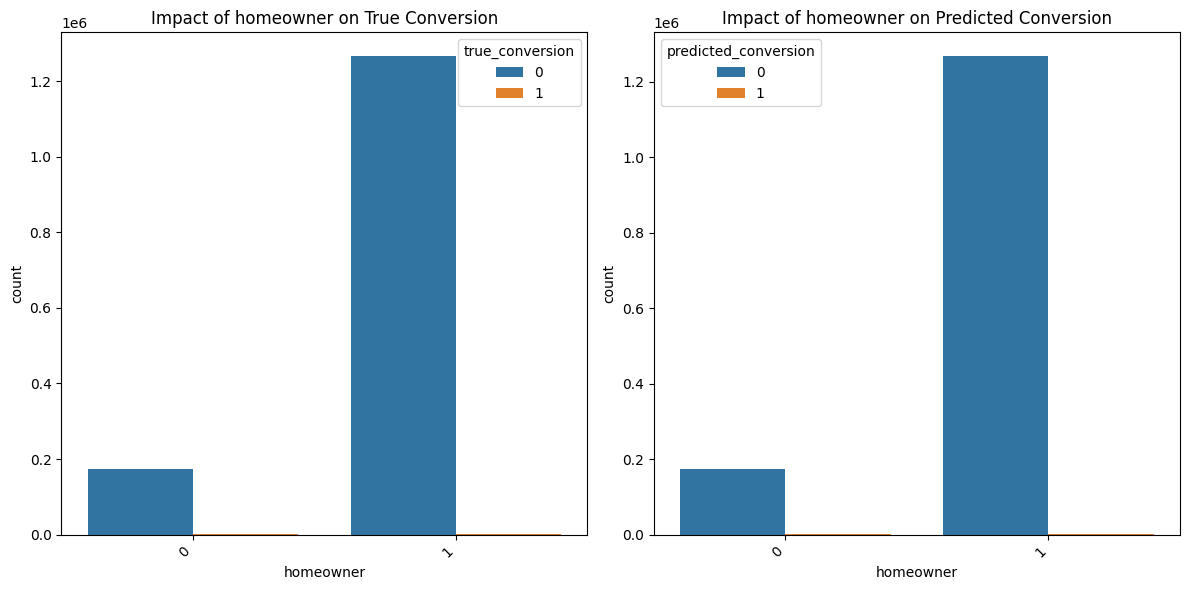

Value Counts for True Conversion within each category of gender:
gender   true_conversion
F        0                  599160
         1                     975
M        0                  313657
         1                     524
Unknown  0                  527949
         1                     875
Name: true_conversion, dtype: int64

Value Counts for Predicted Conversion within each category of gender:
gender   predicted_conversion
F        0                       599171
         1                          964
M        0                       313671
         1                          510
Unknown  0                       527931
         1                          893
Name: predicted_conversion, dtype: int64



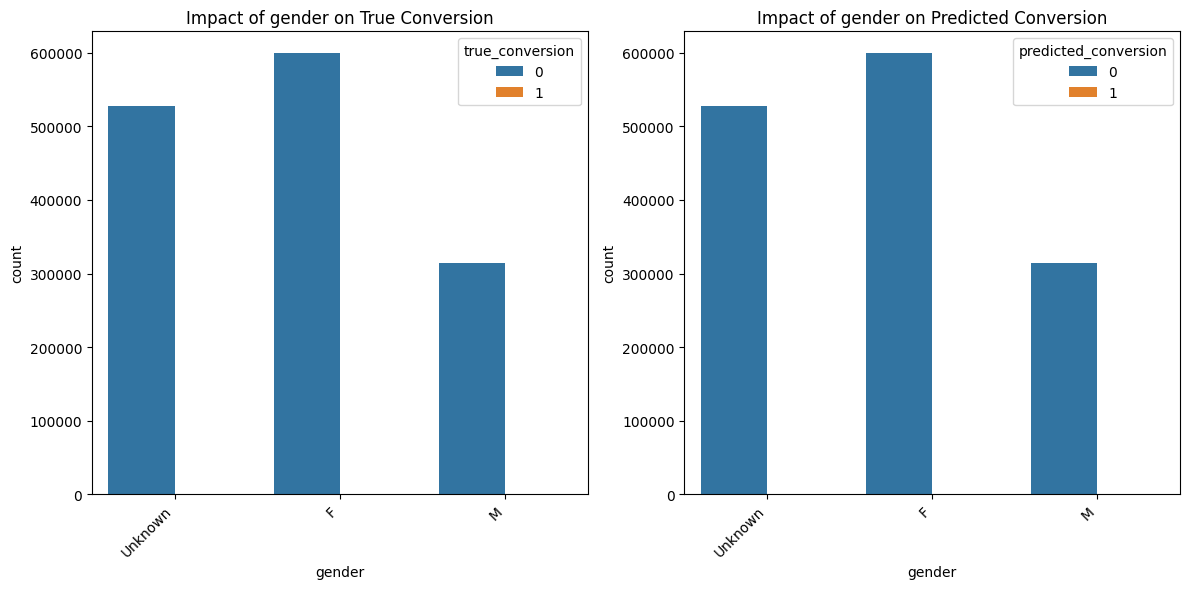

Value Counts for True Conversion within each category of age:
age      true_conversion
18-24    0                     1454
         1                        2
25-34    0                    25806
         1                       43
45-54    0                    24671
         1                       40
55-64    0                  1348264
         1                     2236
Unknown  0                    40571
         1                       53
Name: true_conversion, dtype: int64

Value Counts for Predicted Conversion within each category of age:
age      predicted_conversion
18-24    0                          1456
25-34    0                         25812
         1                            37
45-54    0                         24675
         1                            36
55-64    0                       1348264
         1                          2236
Unknown  0                         40566
         1                            58
Name: predicted_conversion, dtype: int64



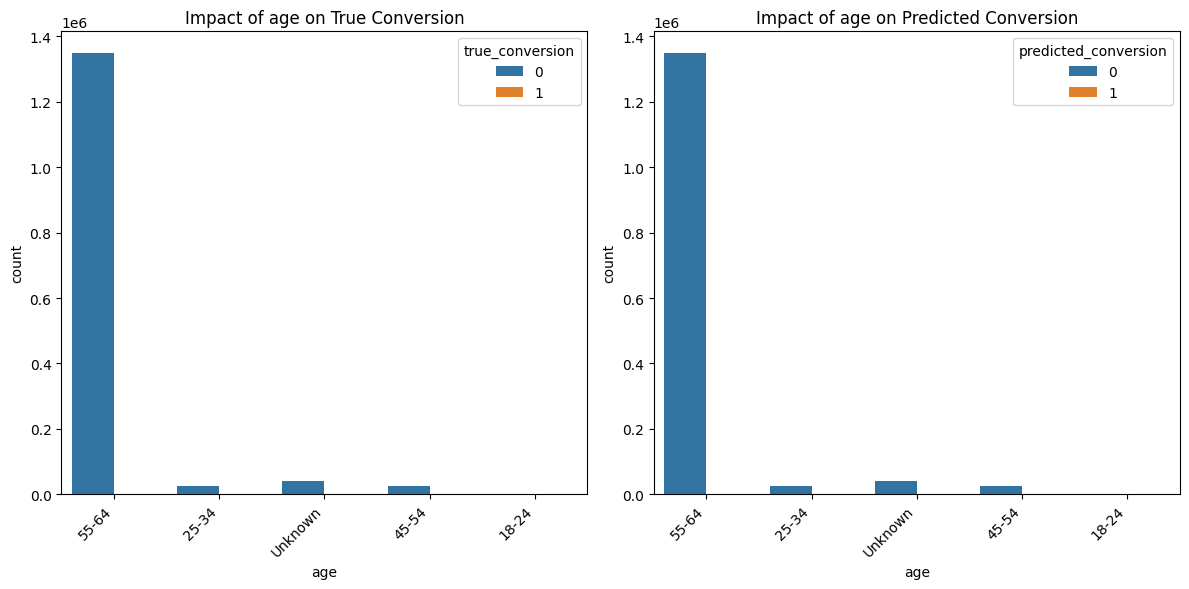

Value Counts for True Conversion within each category of income:
income   true_conversion
<100K    0                    40888
         1                       69
>100K    0                    26515
         1                       44
Unknown  0                  1373363
         1                     2261
Name: true_conversion, dtype: int64

Value Counts for Predicted Conversion within each category of income:
income   predicted_conversion
<100K    0                         40916
         1                            41
>100K    0                         26487
         1                            72
Unknown  0                       1373370
         1                          2254
Name: predicted_conversion, dtype: int64



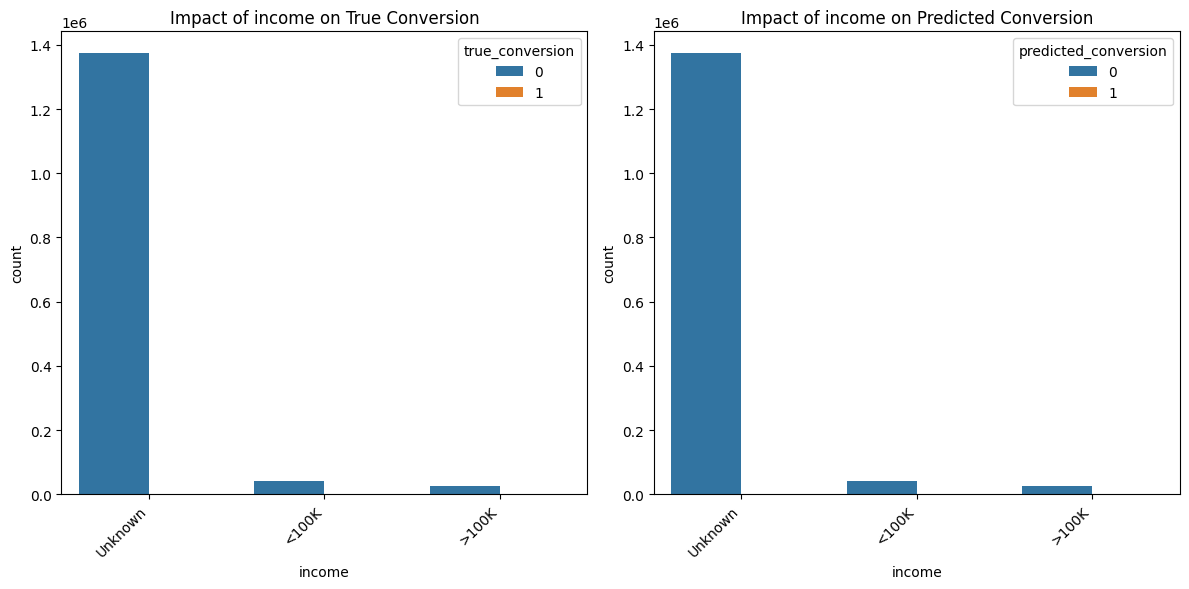

Value Counts for True Conversion within each category of area:
area     true_conversion
Rural    0                    67409
         1                      122
Unknown  0                  1060153
         1                     1702
Urban    0                   313204
         1                      550
Name: true_conversion, dtype: int64

Value Counts for Predicted Conversion within each category of area:
area     predicted_conversion
Rural    0                         67515
         1                            16
Unknown  0                       1059616
         1                          2239
Urban    0                        313642
         1                           112
Name: predicted_conversion, dtype: int64



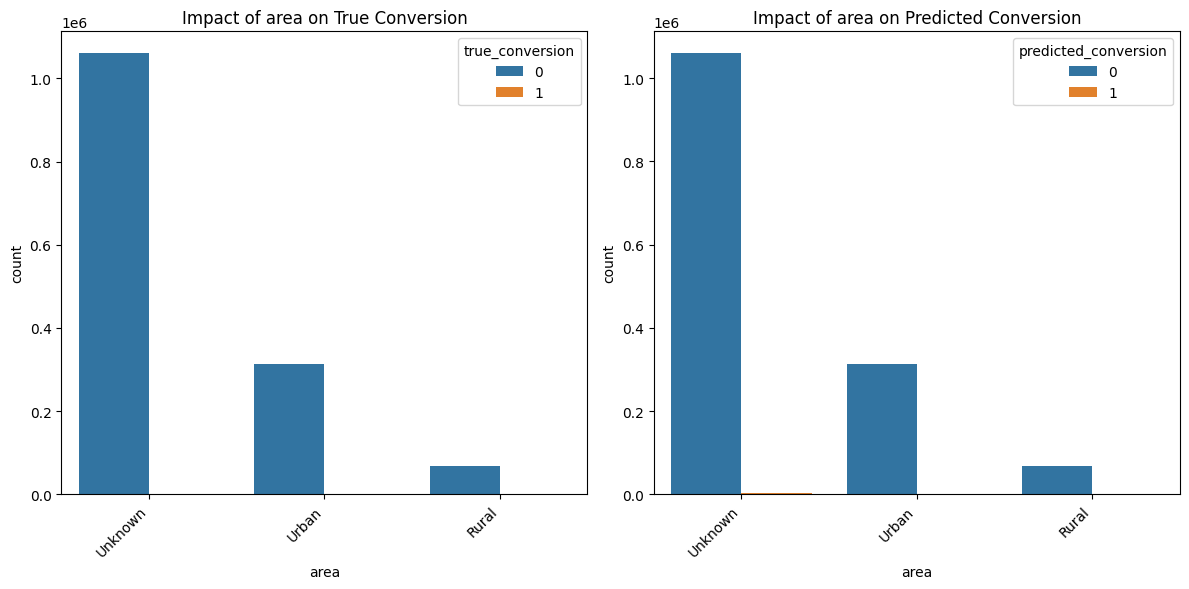

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Iterate through each column (excluding 'true_conversion' and 'predicted_conversion')
for column in data2.columns[:-2]:  # Exclude the last two columns
    plt.figure(figsize=(12, 6))

    # Plot for 'true_conversion'
    plt.subplot(1, 2, 1)
    sns.countplot(x=column, hue='true_conversion', data=data)
    plt.title(f'Impact of {column} on True Conversion')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()

    # Print value counts for true_conversion within the current column's categories
    print(f"Value Counts for True Conversion within each category of {column}:\n{data.groupby(column)['true_conversion'].value_counts()}\n")


    # Plot for 'predicted_conversion'
    plt.subplot(1, 2, 2)
    sns.countplot(x=column, hue='predicted_conversion', data=data)
    plt.title(f'Impact of {column} on Predicted Conversion')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()

    # Print value counts for predicted_conversion within the current column's categories
    print(f"Value Counts for Predicted Conversion within each category of {column}:\n{data.groupby(column)['predicted_conversion'].value_counts()}\n")


    plt.show()

### Impact of College Education & Home Ownership on Conversion

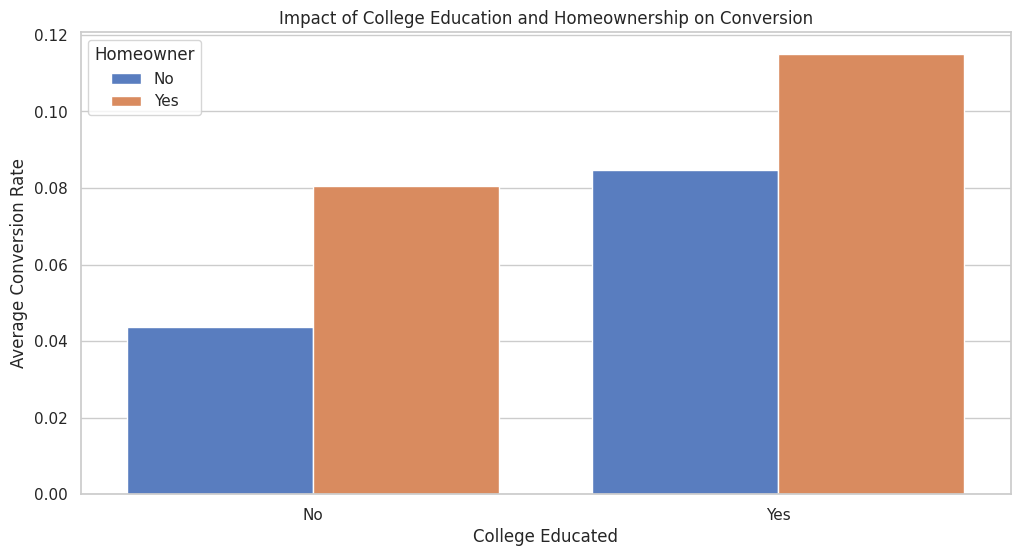

In [ ]:
# Set plot style
sns.set(style="whitegrid")
# College Education and Homeownership vs. Conversion (Grouped Bar Plot)
plt.figure(figsize=(12, 6))
sns.barplot(data=data2, x='college_educated', y='true_conversion', hue='homeowner', palette='muted', errorbar=None)
plt.title("Impact of College Education and Homeownership on Conversion")
plt.xlabel("College Educated")
plt.ylabel("Average Conversion Rate")
plt.xticks([0, 1], ['No', 'Yes'])
plt.legend(title="Homeowner", labels=["No", "Yes"])
plt.show()


### Impact of College Education & Area on Conversion

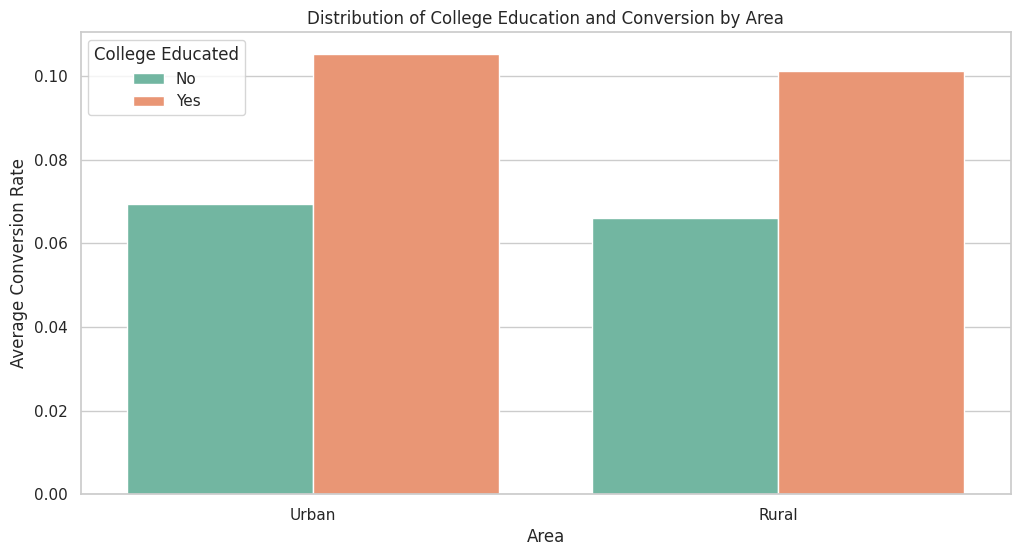

In [ ]:
# Set plot style
sns.set(style="whitegrid")
# Distribution of College Education and Conversion by Area
plt.figure(figsize=(12, 6))
sns.barplot(data=data2, x='area', y='true_conversion', hue='college_educated', errorbar=None, palette="Set2")
plt.title("Distribution of College Education and Conversion by Area")
plt.xlabel("Area")
plt.ylabel("Average Conversion Rate")
plt.legend(title="College Educated", labels=["No", "Yes"])
plt.show()

### Impact of Gender & Area on Conversion

<Figure size 1000x600 with 0 Axes>

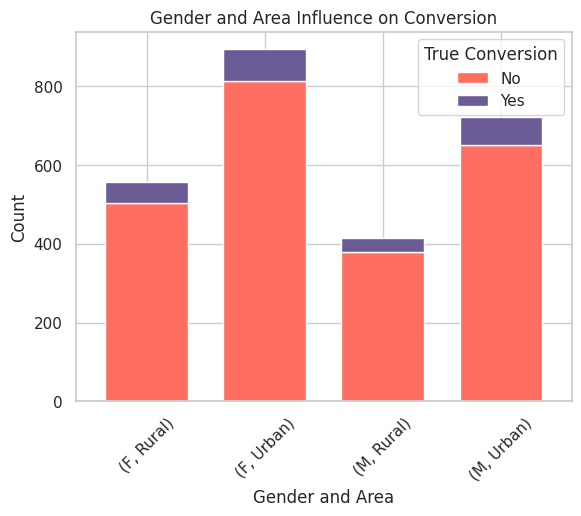

In [ ]:
# Set plot style
sns.set(style="whitegrid")
# Gender and Area Influence on Conversion (Stacked Bar Plot)
plt.figure(figsize=(10, 6))
# Compute counts for each combination
stacked_counts = data2.groupby(['gender', 'area', 'true_conversion']).size().unstack(fill_value=0)
stacked_counts.plot(kind='bar', stacked=True, color=['#FF6F61', '#6B5B95'], width=0.7)
plt.title("Gender and Area Influence on Conversion")
plt.xlabel("Gender and Area")
plt.ylabel("Count")
plt.legend(title="True Conversion", labels=["No", "Yes"])
plt.xticks(rotation=45)
plt.show()

### Impact of Income & Age on Conversion

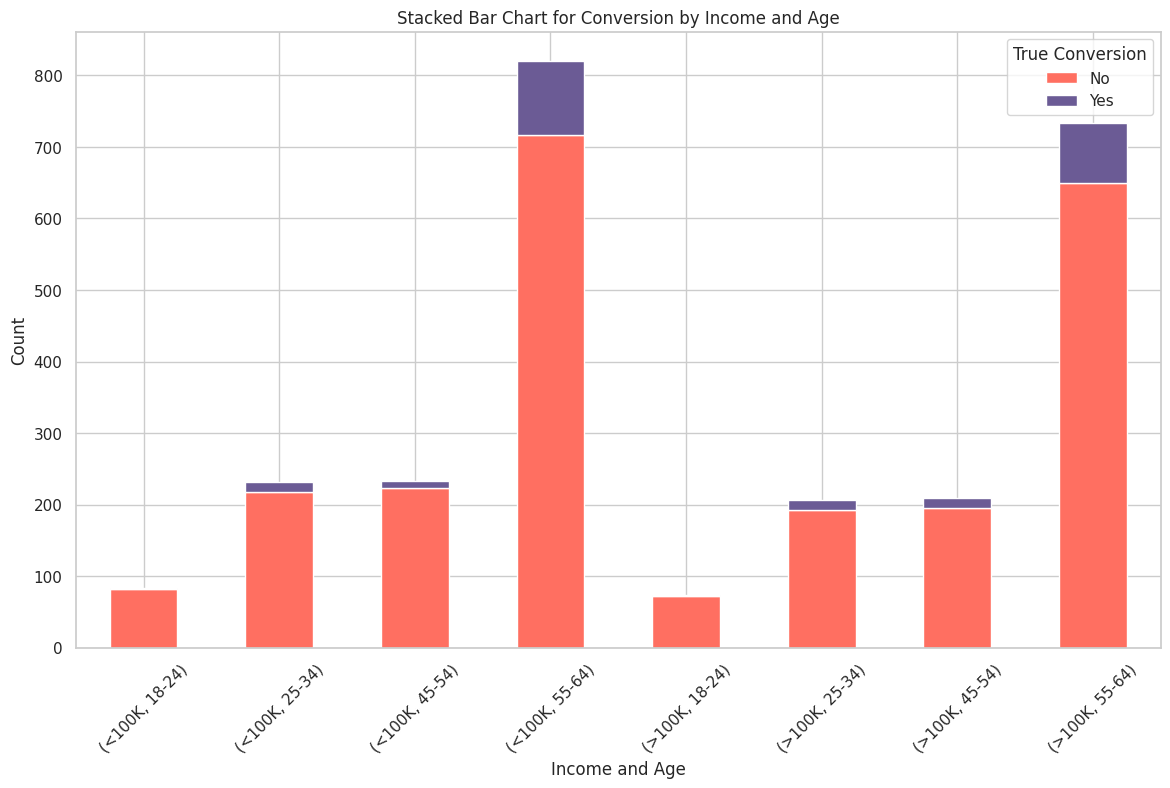

In [ ]:
# Set plot style
sns.set(style="whitegrid")
# Stacked Bar Chart for Conversion by Income and Age
income_age_counts = data2.groupby(['income', 'age', 'true_conversion']).size().unstack().fillna(0)
income_age_counts.plot(kind='bar', stacked=True, color=['#FF6F61', '#6B5B95'], figsize=(14, 8))
plt.title("Stacked Bar Chart for Conversion by Income and Age")
plt.xlabel("Income and Age")
plt.ylabel("Count")
plt.legend(title="True Conversion", labels=["No", "Yes"])
plt.xticks(rotation=45)
plt.show()

### Impact of Religion and Politics on Conversion

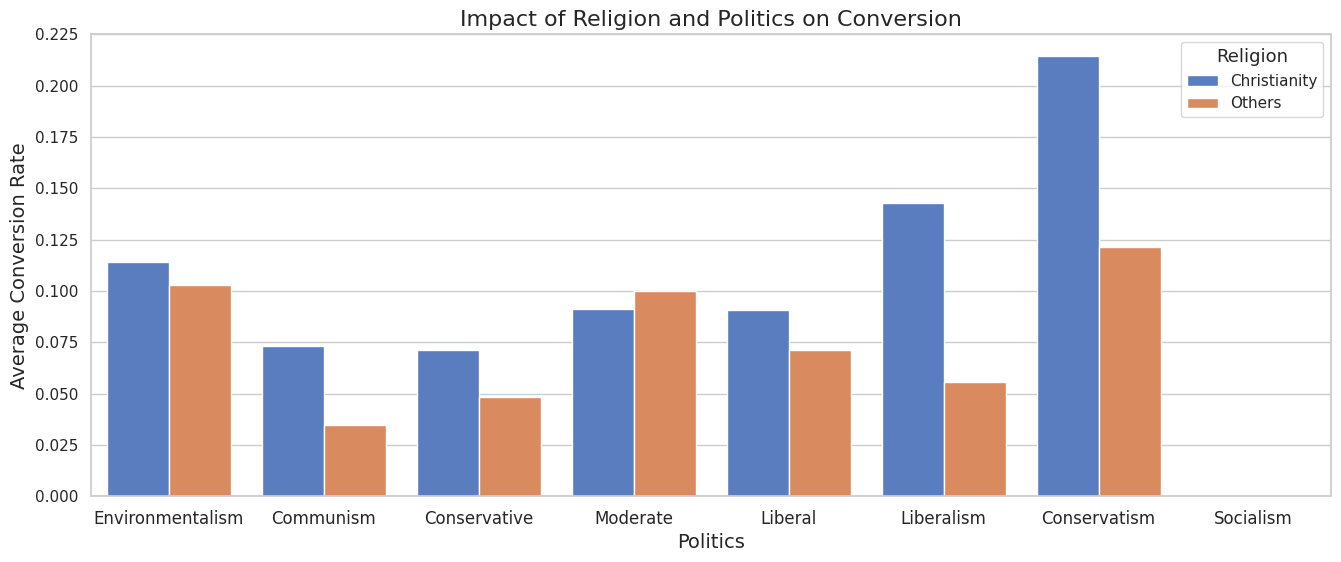

In [ ]:
# Set plot style
sns.set(style="whitegrid")

# Extract unique labels from the 'politics' column
unique_politics_labels = data2['politics'].unique()

# Religion & Politics vs. Conversion (Grouped Bar Plot)
plt.figure(figsize=(16, 6))
sns.barplot(data=data2, x='politics', y='true_conversion', hue='religion', palette='muted', errorbar=None)

# Title and labels
plt.title("Impact of Religion and Politics on Conversion", fontsize=16)
plt.xlabel("Politics", fontsize=14)
plt.ylabel("Average Conversion Rate", fontsize=14)

# Set x-tick labels based on unique values in the 'politics' column
plt.xticks(ticks=range(len(unique_politics_labels)), labels=unique_politics_labels, fontsize=12)

# Legend adjustments
plt.legend(title="Religion", labels=["Christianity", "Others"], title_fontsize=13, fontsize=11)

plt.show()


### Pairplots

<Figure size 1200x1000 with 0 Axes>

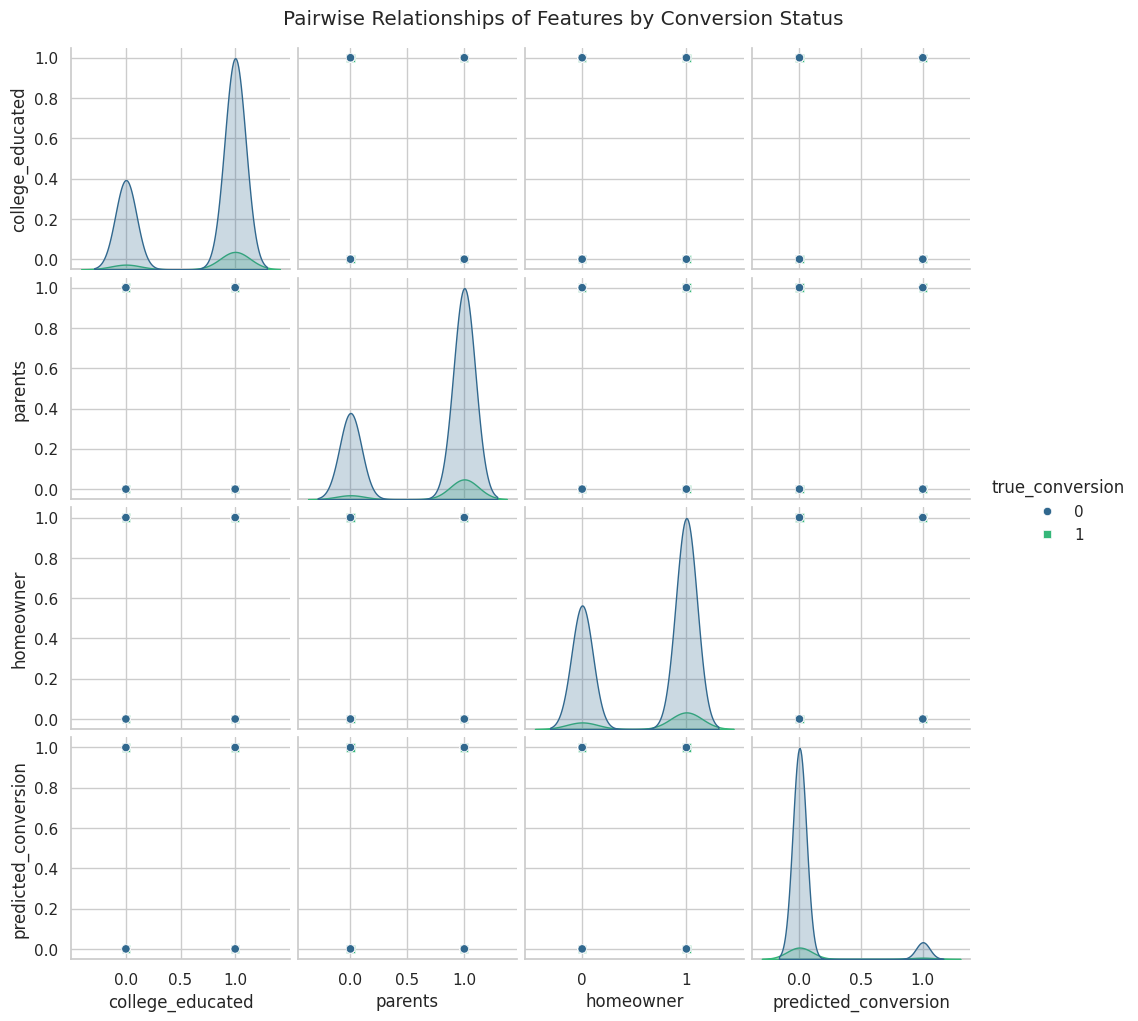

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Set the plotting style
sns.set(style="whitegrid")

# Pairplot with Conversion
plt.figure(figsize=(12, 10))
sns.pairplot(data2, hue="true_conversion", palette="viridis", markers=["o", "s"])
plt.suptitle("Pairwise Relationships of Features by Conversion Status", y=1.02)
plt.show()


### Stacked Area Plots

<Figure size 1800x600 with 0 Axes>

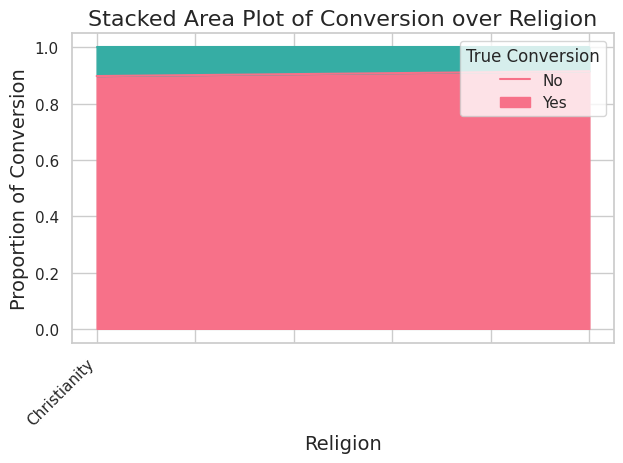

<Figure size 1800x600 with 0 Axes>

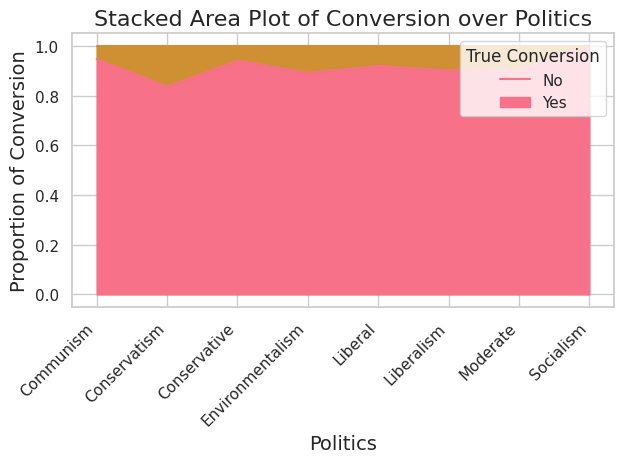

<Figure size 1800x600 with 0 Axes>

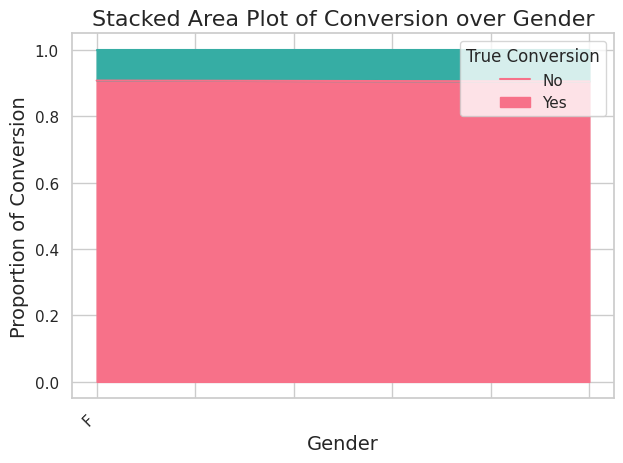

<Figure size 1800x600 with 0 Axes>

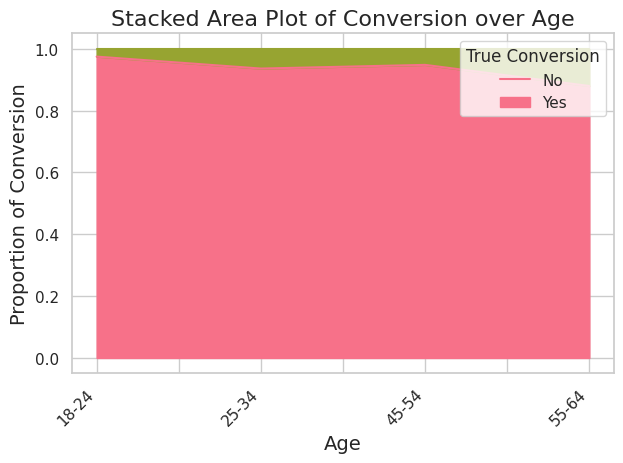

<Figure size 1800x600 with 0 Axes>

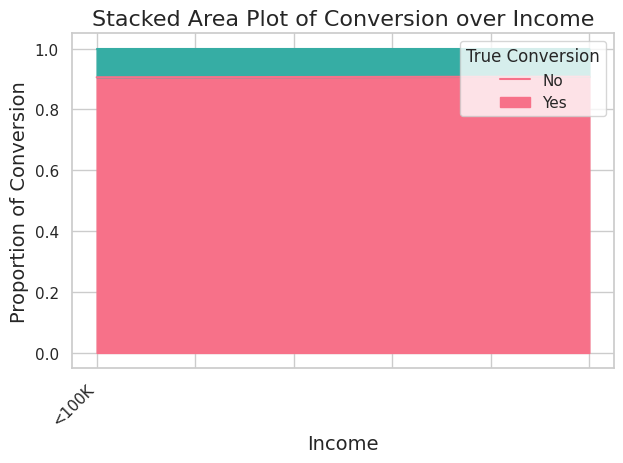

<Figure size 1800x600 with 0 Axes>

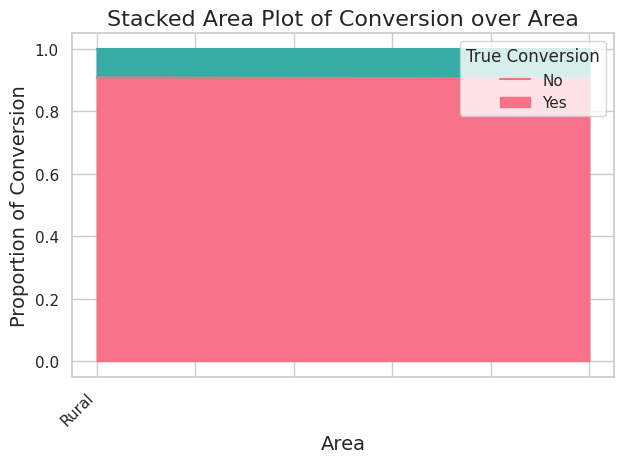

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Iterate through each categorical column
for column in data2.select_dtypes(include=['object']).columns:
    # Group by the current column and 'true_conversion'
    conversion_counts = data2.groupby([column, 'true_conversion']).size().unstack().fillna(0)

    # Normalize the counts to get proportions
    conversion_counts = conversion_counts.div(conversion_counts.sum(axis=1), axis=0)

    # Generate a color palette based on the number of unique values in the column
    num_unique_values = conversion_counts.shape[0]
    color_palette = sns.color_palette("husl", num_unique_values)  # Use the Husl palette

    # Create a stacked area plot
    plt.figure(figsize=(18, 6))  # Increase figure size
    conversion_counts.plot(kind="area", stacked=True, color=color_palette)

    # Title and labels
    plt.title(f"Stacked Area Plot of Conversion over {column.replace('_', ' ').title()}", fontsize=16)
    plt.xlabel(column.replace('_', ' ').title(), fontsize=14)
    plt.ylabel("Proportion of Conversion", fontsize=14)
    plt.legend(title="True Conversion", labels=["No", "Yes"], loc="upper right")

    # Rotate x-axis labels for better visibility
    plt.xticks(rotation=45, ha='right')

    plt.tight_layout()  # Adjust layout to prevent overlap
    plt.show()


### Violin Plot indicating Conversion based on Religion and Politics

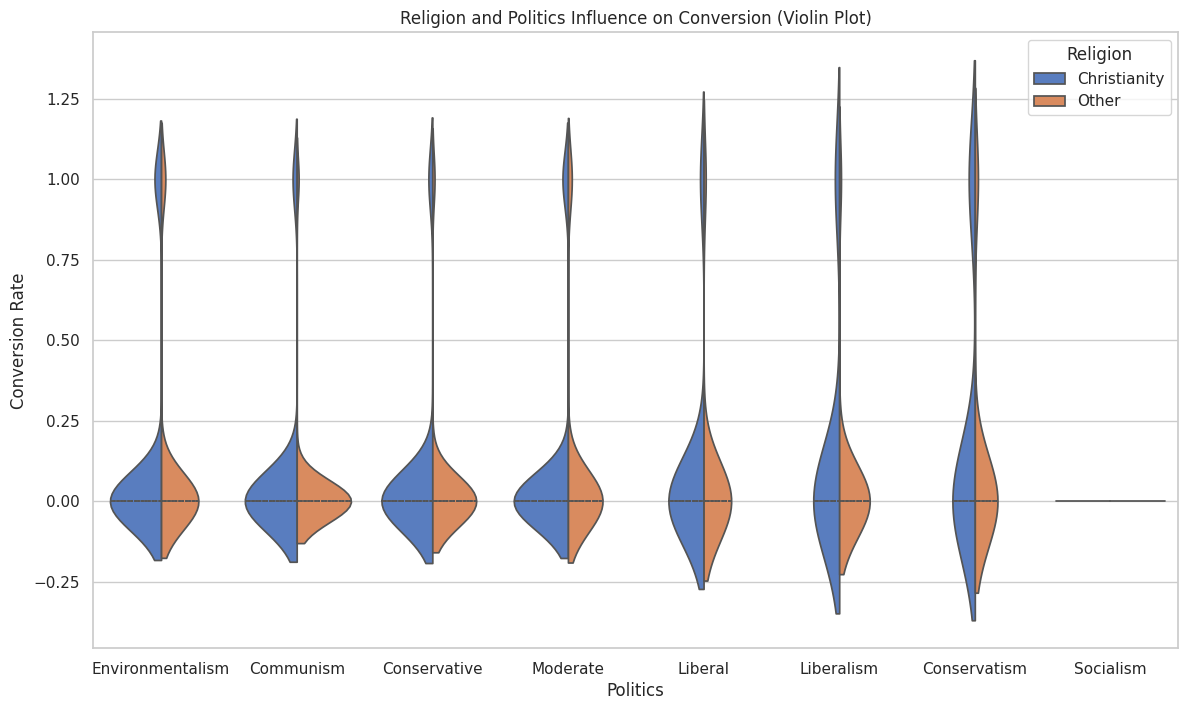

In [ ]:
# Religion and Politics Influence on Conversion (Violin Plot)
plt.figure(figsize=(14, 8))
sns.violinplot(data=data2, x="politics", y="true_conversion", hue="religion", split=True, inner="quartile", palette="muted")
plt.title("Religion and Politics Influence on Conversion (Violin Plot)")
plt.xlabel("Politics")
plt.ylabel("Conversion Rate")
plt.legend(title="Religion")
plt.show()

### Violin Plot indicating Conversion based on Gender and Politics

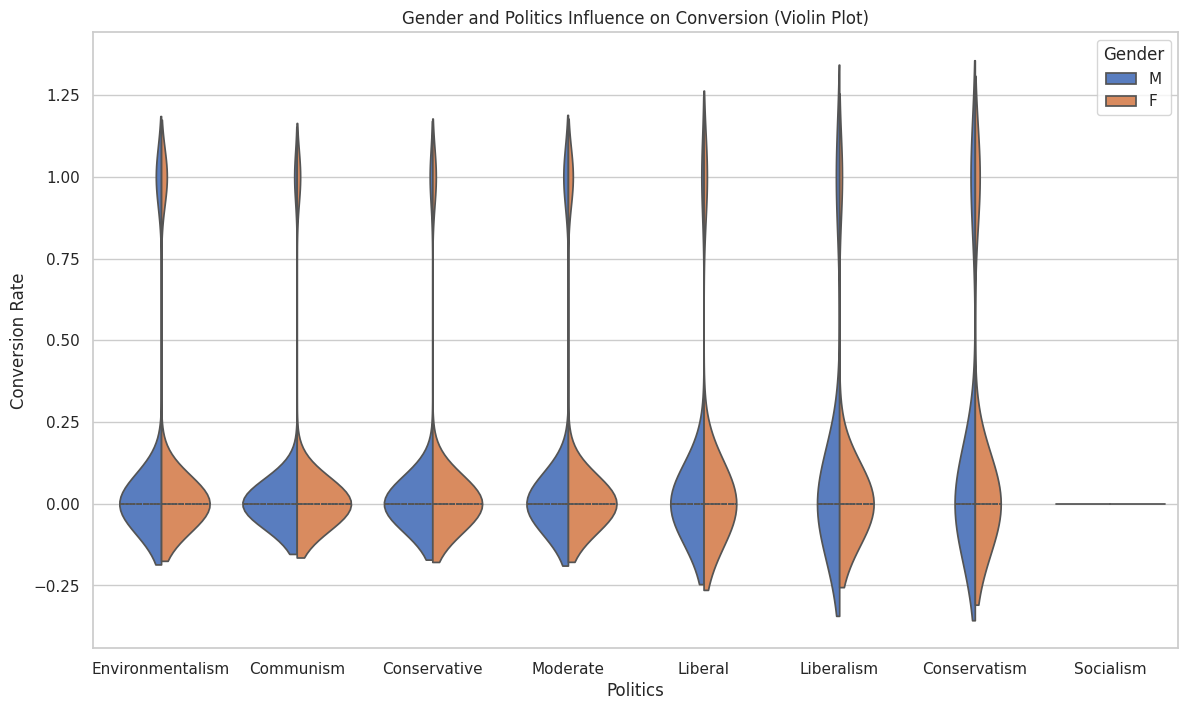

In [ ]:
# Gender and Politics Influence on Conversion (Violin Plot)
plt.figure(figsize=(14, 8))
sns.violinplot(data=data2, x="politics", y="true_conversion", hue="gender", split=True, inner="quartile", palette="muted")
plt.title("Gender and Politics Influence on Conversion (Violin Plot)")
plt.xlabel("Politics")
plt.ylabel("Conversion Rate")
plt.legend(title="Gender")
plt.show()

### Violin Plot indicating Conversion based on Gender and Income

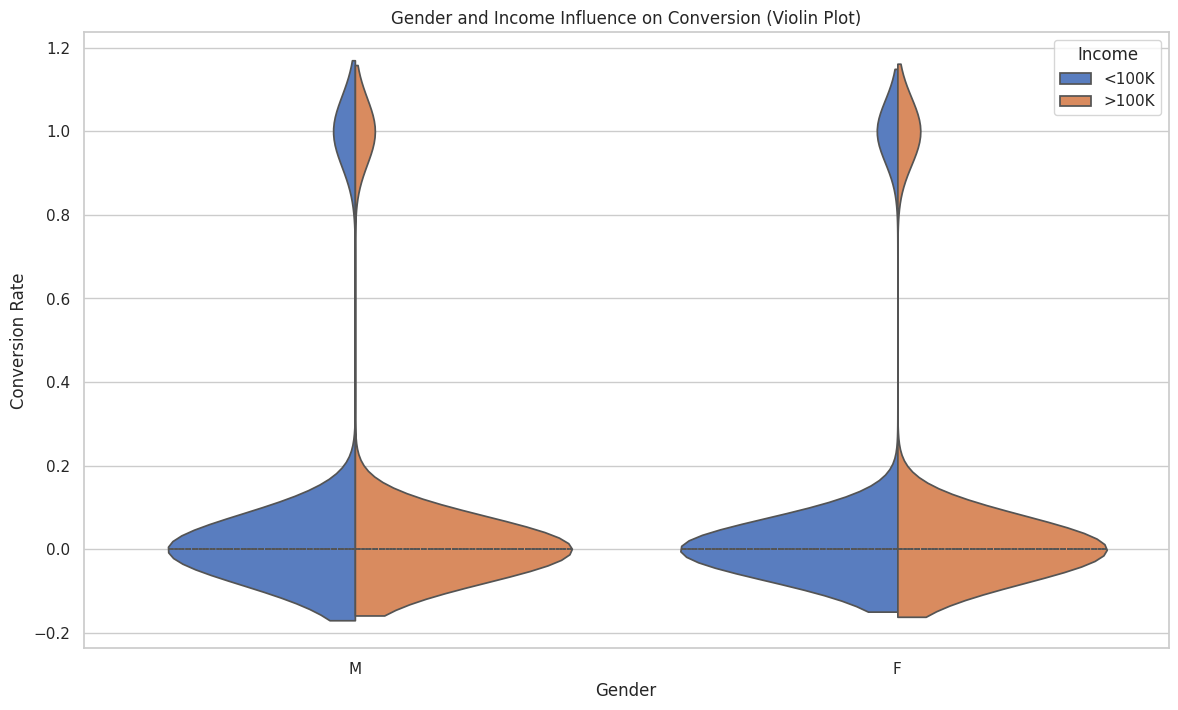

In [ ]:
# Gender and Income Influence on Conversion (Violin Plot)
plt.figure(figsize=(14, 8))
sns.violinplot(data=data2, x="gender", y="true_conversion", hue="income", split=True, inner="quartile", palette="muted")
plt.title("Gender and Income Influence on Conversion (Violin Plot)")
plt.xlabel("Gender")
plt.ylabel("Conversion Rate")
plt.legend(title="Income")
plt.show()

### Comparison of Conversion Rates (True and Predicted) based on several parameters

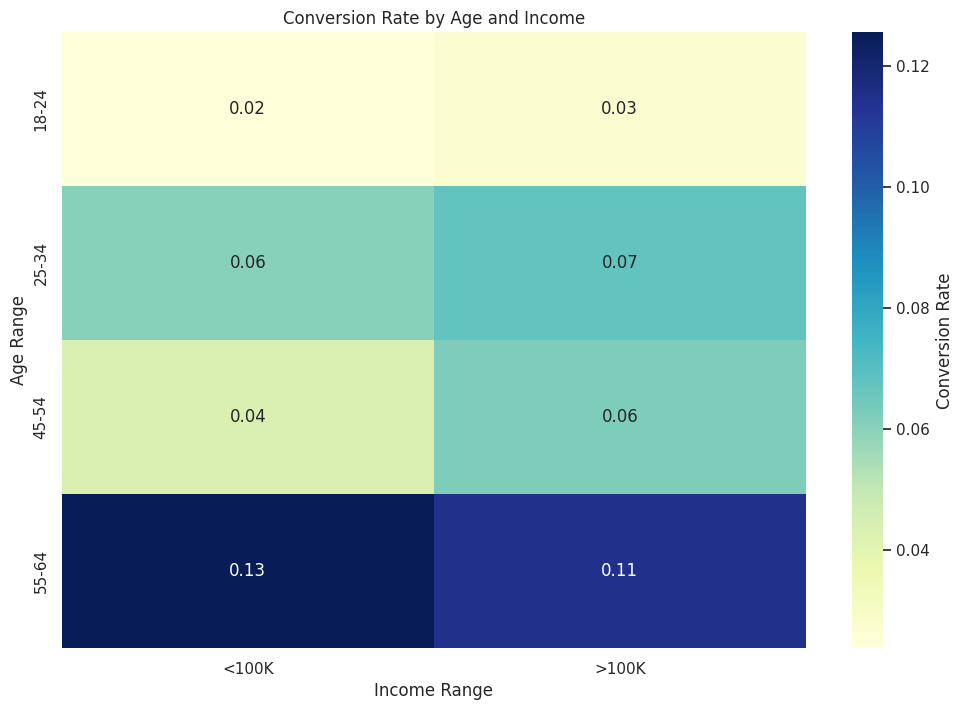

In [ ]:
# Conversion Rate by Age and Income (Heatmap)
plt.figure(figsize=(12, 8))
age_income_conversion = data2.pivot_table(index="age", columns="income", values="true_conversion", aggfunc="mean")
sns.heatmap(age_income_conversion, annot=True, cmap="YlGnBu", fmt=".2f", cbar_kws={'label': 'Conversion Rate'})
plt.title("Conversion Rate by Age and Income")
plt.xlabel("Income Range")
plt.ylabel("Age Range")
plt.show()

<Figure size 1200x600 with 0 Axes>

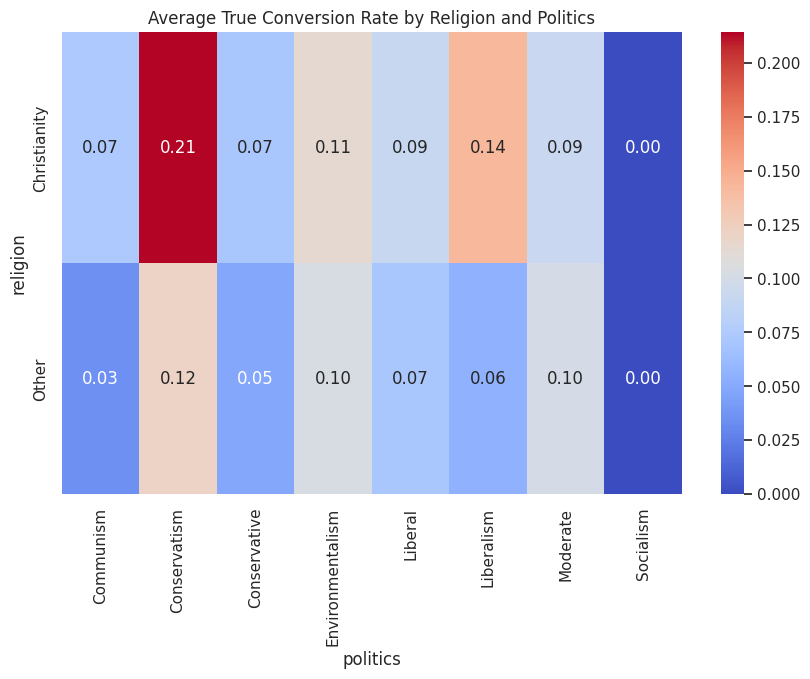

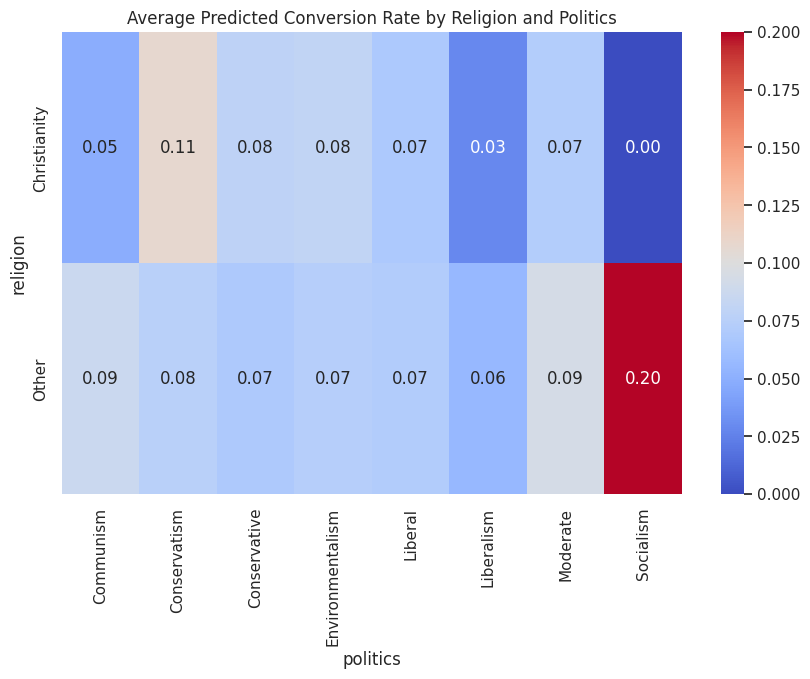

In [ ]:
# Conversion Rate based on 'religion' and 'politics'
plt.figure(figsize=(12, 6))

# Group by religion and politics and see the mean of true_conversion
religion_politics_impact = data2.groupby(['religion', 'politics'])['true_conversion'].mean().unstack()
plt.figure(figsize=(10,6))
sns.heatmap(religion_politics_impact, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Average True Conversion Rate by Religion and Politics')
plt.show()

# Group by religion and politics and see the mean of predicted_conversion
religion_politics_impact = data2.groupby(['religion', 'politics'])['predicted_conversion'].mean().unstack()
plt.figure(figsize=(10,6))
sns.heatmap(religion_politics_impact, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Average Predicted Conversion Rate by Religion and Politics')
plt.show()

<Figure size 1200x600 with 0 Axes>

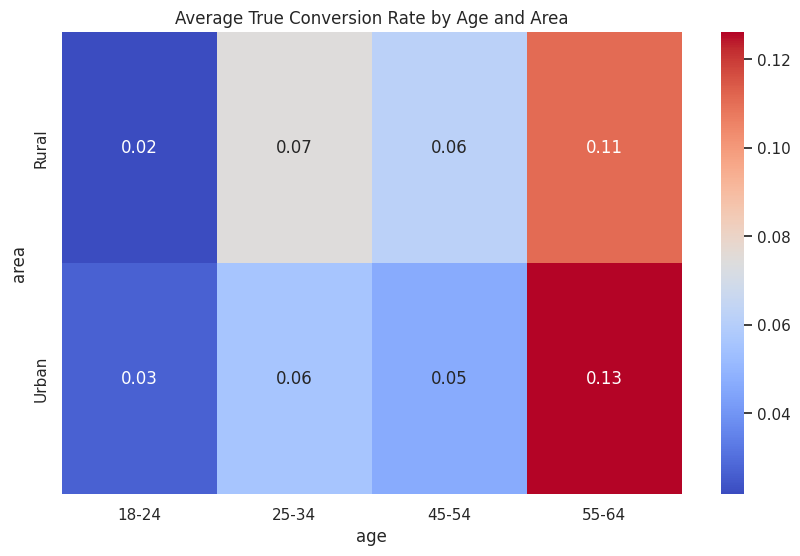

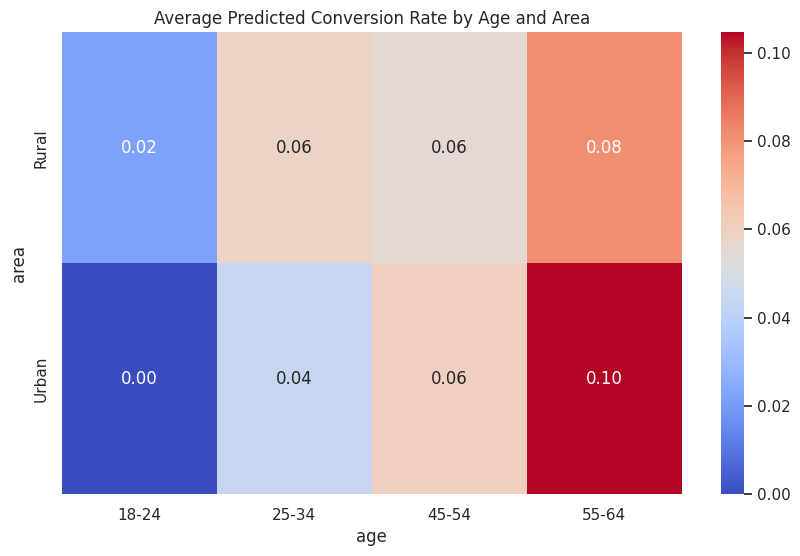

In [ ]:
# Conversion Rate based on 'age' and 'area'
plt.figure(figsize=(12, 6))

# Group by age and area and see the mean of true_conversion
age_area_impact = data2.groupby(['area', 'age'])['true_conversion'].mean().unstack()
plt.figure(figsize=(10,6))
sns.heatmap(age_area_impact, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Average True Conversion Rate by Age and Area')
plt.show()

# Group by age and area and see the mean of predicted_conversion
age_area_impact = data2.groupby(['area', 'age'])['predicted_conversion'].mean().unstack()
plt.figure(figsize=(10,6))
sns.heatmap(age_area_impact, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Average Predicted Conversion Rate by Age and Area')
plt.show()

<Figure size 1200x600 with 0 Axes>

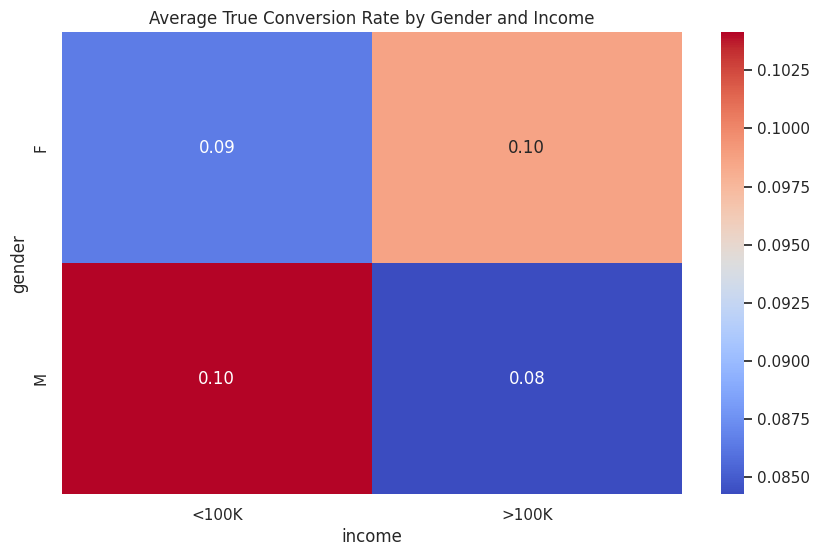

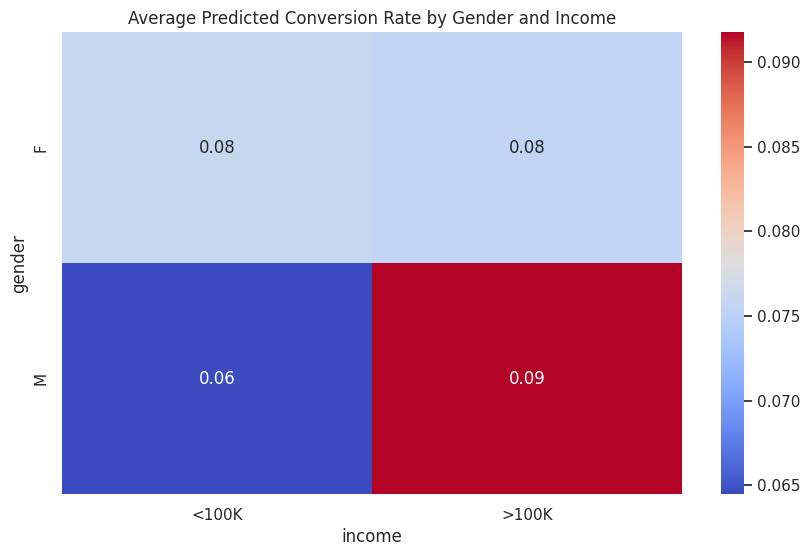

In [ ]:
# Conversion Rate based on 'Gender' and 'Income'
plt.figure(figsize=(12, 6))

# Group by Gender and Income and see the mean of true_conversion
gender_income_impact = data2.groupby(['gender', 'income'])['true_conversion'].mean().unstack()
plt.figure(figsize=(10,6))
sns.heatmap(gender_income_impact, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Average True Conversion Rate by Gender and Income')
plt.show()

# Group by Gender and Income and see the mean of predicted_conversion
gender_income_impact = data2.groupby(['gender', 'income'])['predicted_conversion'].mean().unstack()
plt.figure(figsize=(10,6))
sns.heatmap(gender_income_impact, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Average Predicted Conversion Rate by Gender and Income')
plt.show()

<Figure size 1200x600 with 0 Axes>

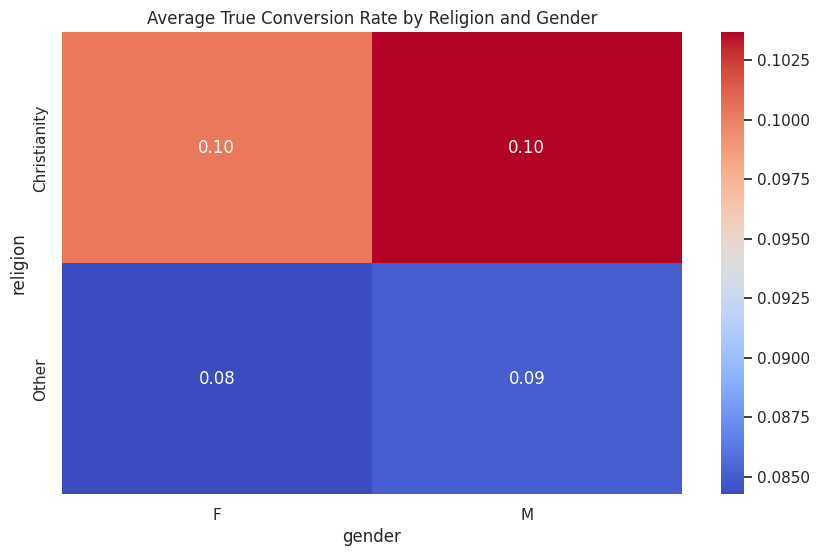

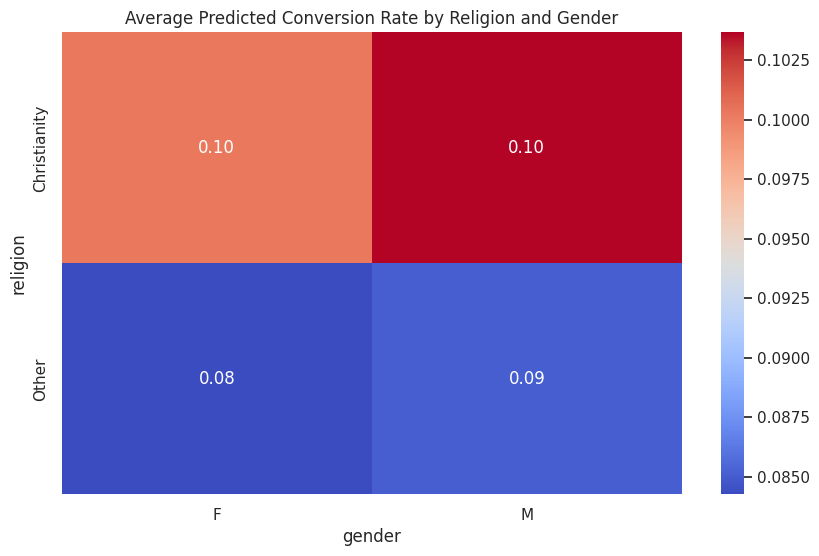

In [ ]:
# Conversion Rate based on 'religion' and 'gender'
plt.figure(figsize=(12, 6))

# Group by religion and gender and see the mean of true_conversion
religion_gender_impact = data2.groupby(['religion', 'gender'])['true_conversion'].mean().unstack()
plt.figure(figsize=(10,6))
sns.heatmap(religion_gender_impact, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Average True Conversion Rate by Religion and Gender')
plt.show()

# Group by religion and gender and see the mean of predicted_conversion
religion_politics_impact = data2.groupby(['religion', 'gender'])['predicted_conversion'].mean().unstack()
plt.figure(figsize=(10,6))
sns.heatmap(religion_gender_impact, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Average Predicted Conversion Rate by Religion and Gender')
plt.show()

### Prediction Power Score

<ipython-input-34-f1837609e1d6>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2[col] = data2[col].astype("category")
<ipython-input-34-f1837609e1d6>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2[col] = data2[col].astype("category")
<ipython-input-34-f1837609e1d6>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/s

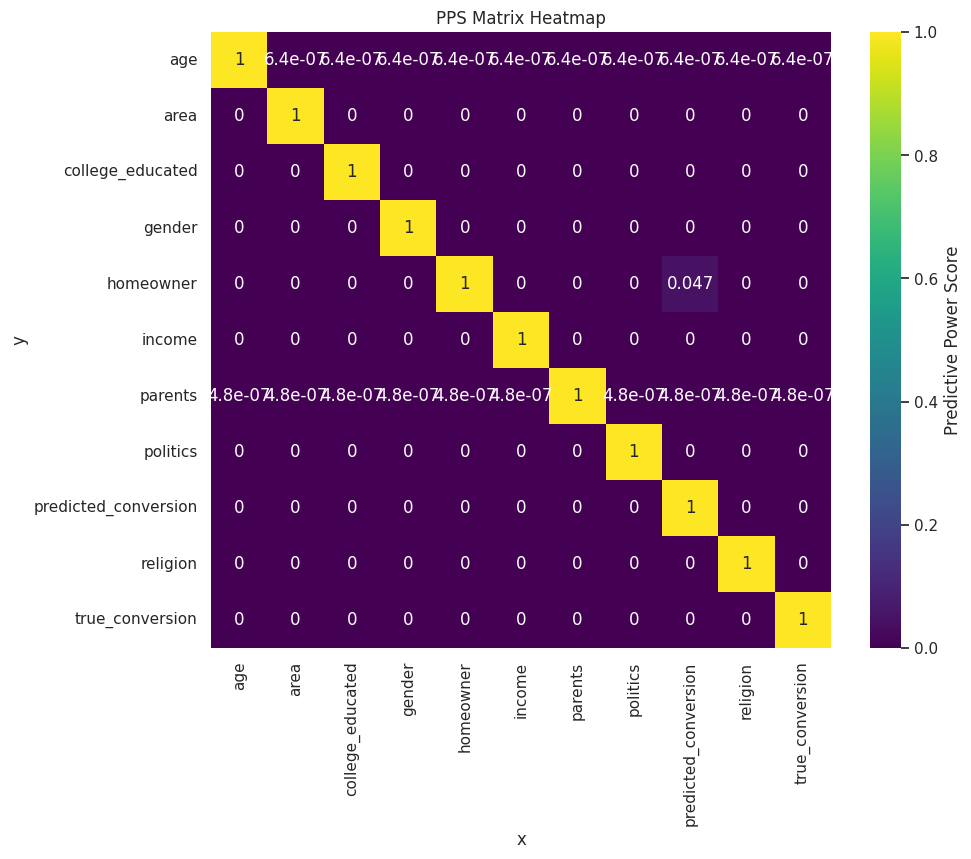

In [ ]:
# Install the ppscore library if not already installed
!pip install ppscore

# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import ppscore as pps  # PPS library

# Convert categorical variables to 'category' dtype if not already done
categorical_cols = ["age", "religion", "income", "politics", "college_educated", "parents", "homeowner", "gender", "area"]
for col in categorical_cols:
    data2[col] = data2[col].astype("category")

# Calculate the PPS matrix
pps_matrix = pps.matrix(data2)[["x", "y", "ppscore"]].pivot(columns="x", index="y", values="ppscore")

# Plot the PPS matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(pps_matrix, annot=True, cmap="viridis", vmin=0, vmax=1, cbar_kws={'label': 'Predictive Power Score'})
plt.title("PPS Matrix Heatmap")
plt.show()


# Implementation of Classification Models on Given Dataset (with Imbalance in Class)

### Decision Tree

In [ ]:
data3 = data2.drop('predicted_conversion', axis=1)
data3

religion          politics college_educated parents homeowner  \
0        Christianity  Environmentalism                1       1         1   
1               Other         Communism                1       1         1   
2               Other      Conservative                1       1         1   
4               Other          Moderate                1       1         1   
6        Christianity         Communism                1       1         1   
...               ...               ...              ...     ...       ...   
1434335         Other          Moderate                1       1         1   
1434358         Other           Liberal                1       0         1   
1435329         Other      Conservatism                1       1         1   
1441325         Other          Moderate                0       1         0   
1441742         Other      Conservatism                0       1         1   

        gender    age income   area  true_conversion  
0            M  55-64  <100K  Urban                0  
1            M  55-64  <100K  Urban                0  
2            F  55-64  <100K  Urban                0  
4            F  55-64  >100K  Urban                0  
6            M  55-64  <100K  Rural                0  
...        ...    ...    ...    ...              ...  
1434335      F  45-54  <100K  Rural                0  
1434358      M  55-64  <100K  Rural                0  
1435329      F  18-24  >100K  Urban                0  
1441325      M  45-54  <100K  Urban                0  
1441742      F  45-54  >100K  Urban                0  

[2591 rows x 10 columns]

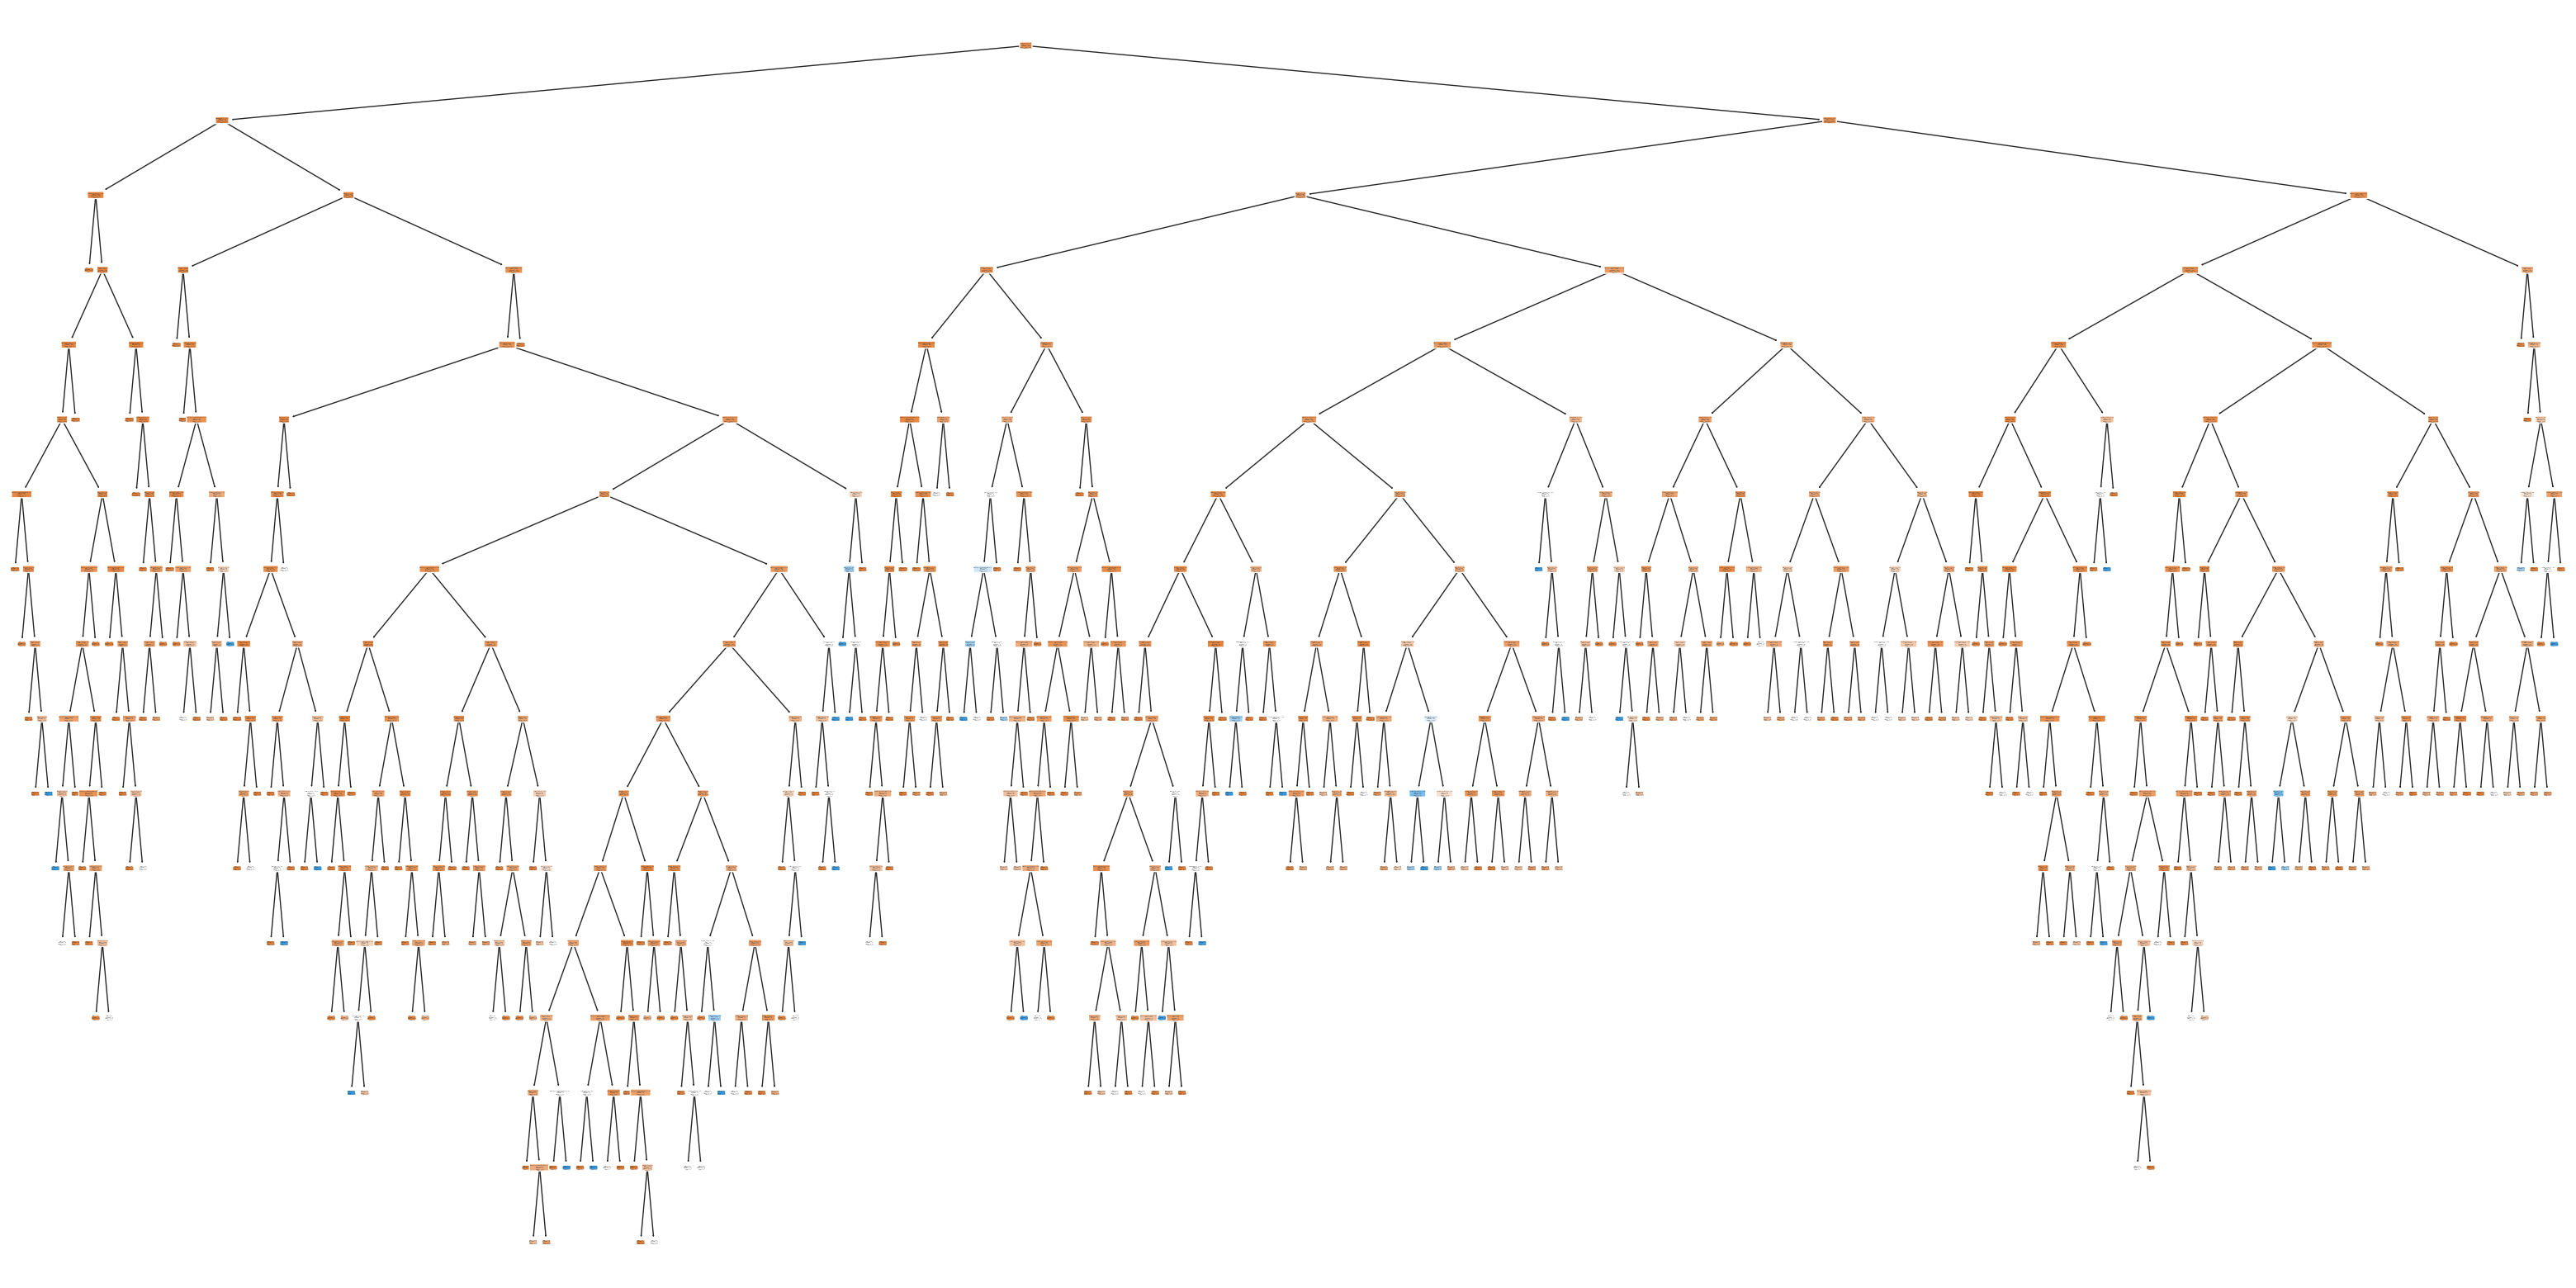

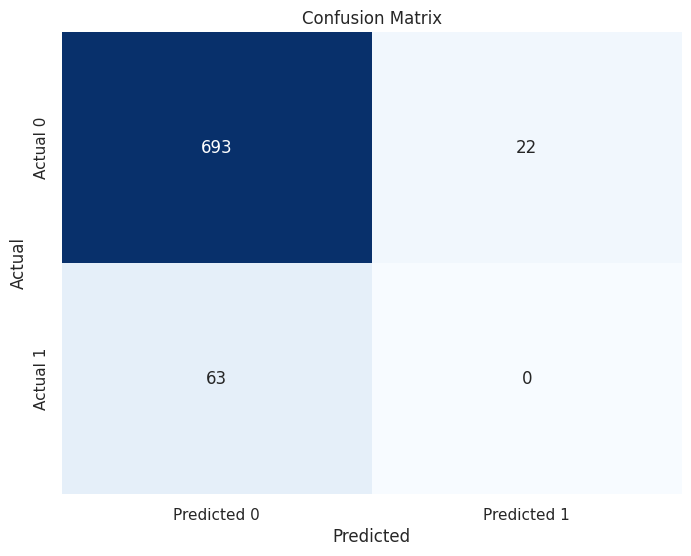

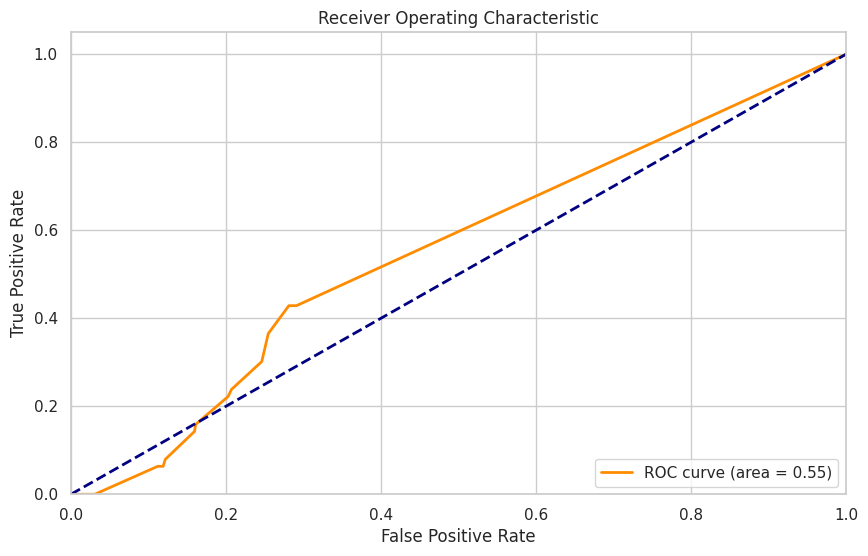

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# Prepare the data
X = data3.drop('true_conversion', axis=1)
y = data3['true_conversion']

# Convert categorical features to numerical using one-hot encoding
X = pd.get_dummies(X, drop_first=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the decision tree classifier
clf = DecisionTreeClassifier(random_state=42)  # No max_depth for a fully grown tree
clf.fit(X_train, y_train)

# Visualize the decision tree
plt.figure(figsize=(40, 20))
plot_tree(clf, feature_names=X.columns, class_names=['0', '1'], filled=True, rounded=True)
plt.show()

# Make predictions on the test set
y_pred = clf.predict(X_test)
y_prob = clf.predict_proba(X_test)[:, 1]

# Evaluate the model
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

### Pre-Pruned Decision Tree

Best depth for maximum AUC: 4


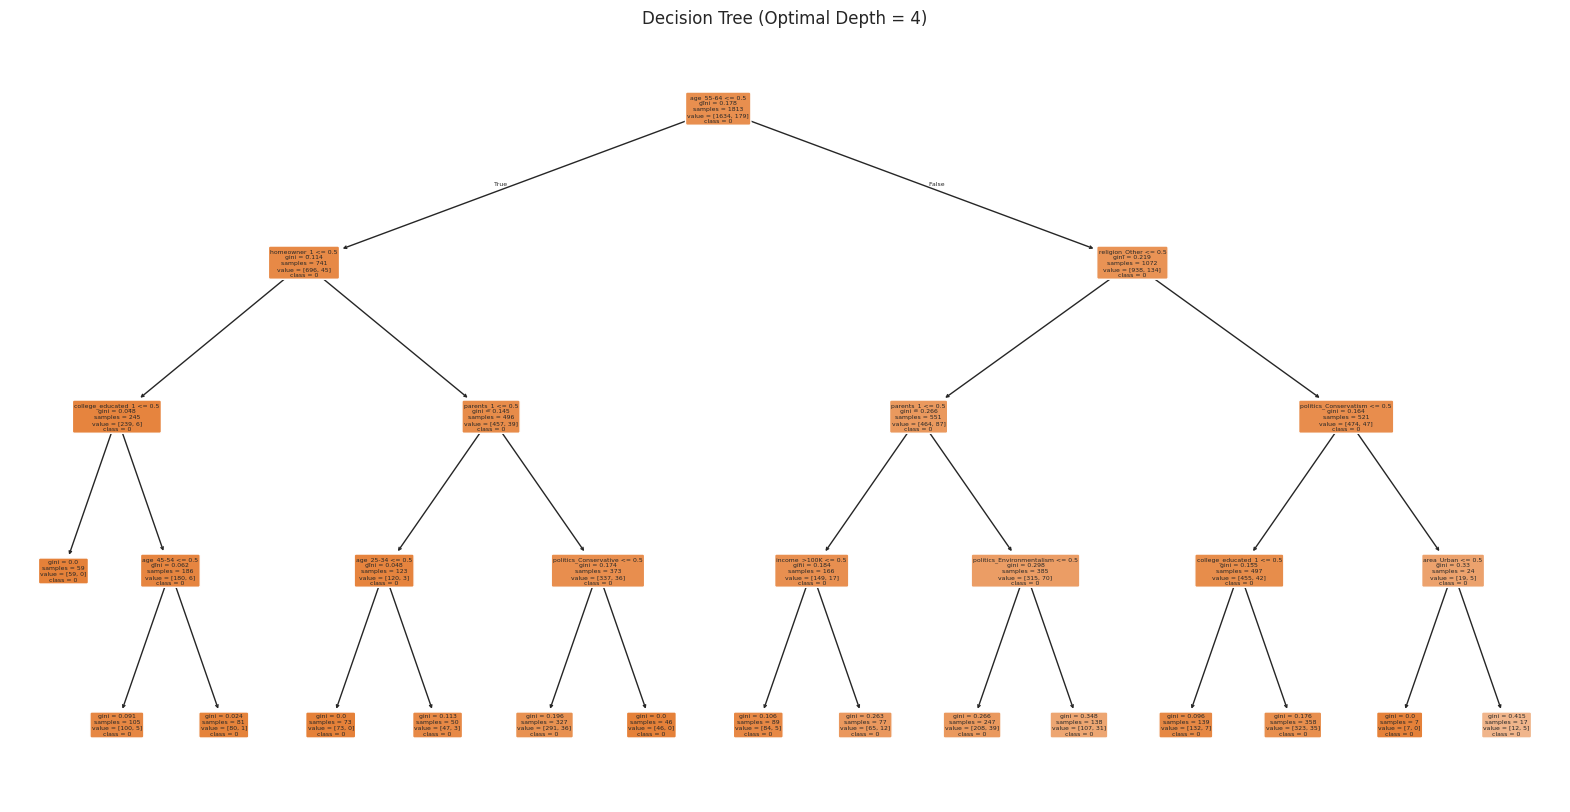

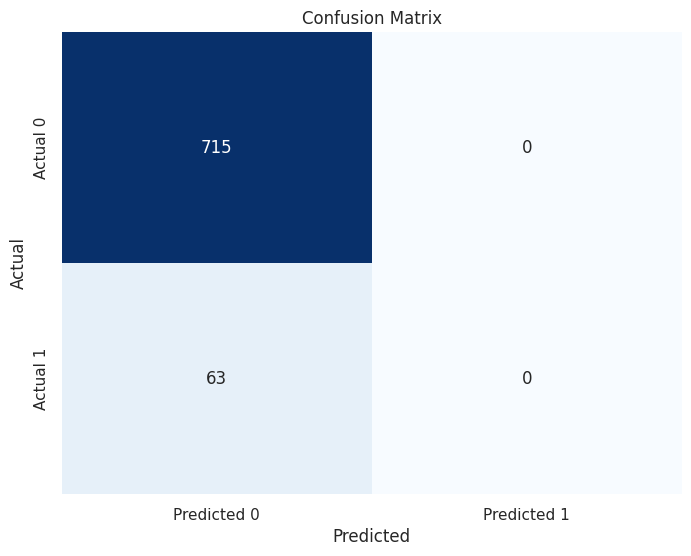

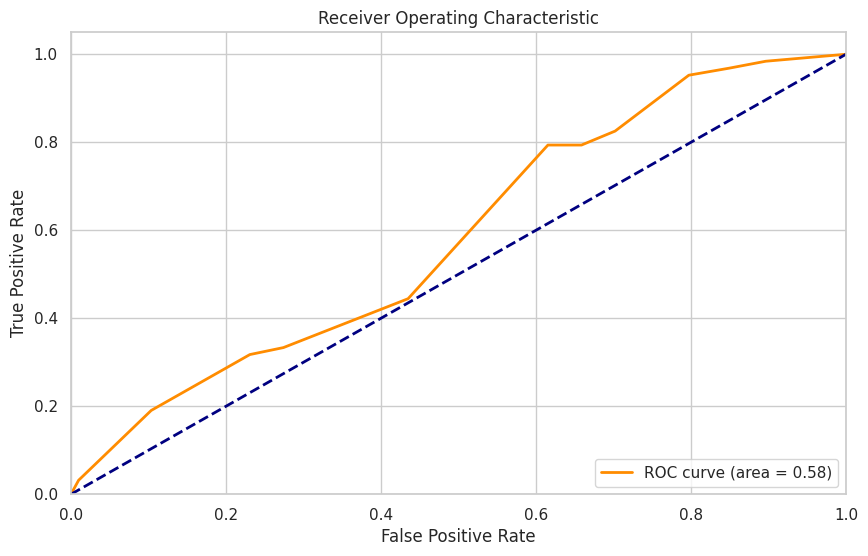

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import roc_auc_score, roc_curve, auc, confusion_matrix
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Initialize variables to store the best depth and the highest AUC score
best_depth = None
best_auc = 0
auc_scores = []

# Test max depths from 4 to 16
for depth in range(4, 16):
    clf = DecisionTreeClassifier(max_depth=depth, random_state=42)

    # Calculate the mean AUC score using cross-validation
    cv_auc = cross_val_score(clf, X_train, y_train, cv=5, scoring='roc_auc').mean()
    auc_scores.append(cv_auc)

    # Update best depth if current AUC is higher than the previous best
    if cv_auc > best_auc:
        best_auc = cv_auc
        best_depth = depth

# Train the decision tree with the best depth
clf_best = DecisionTreeClassifier(max_depth=best_depth, random_state=42)
clf_best.fit(X_train, y_train)

# Display the best depth
print(f"Best depth for maximum AUC: {best_depth}")

# Visualize the decision tree with the best depth
plt.figure(figsize=(20, 10))
plot_tree(clf_best, feature_names=X.columns, class_names=['0', '1'], filled=True, rounded=True)
plt.title(f"Decision Tree (Optimal Depth = {best_depth})")
plt.show()

# Make predictions and calculate AUC on the test set
y_pred = clf_best.predict(X_test)
y_prob = clf_best.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Plot ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


### Post-Pruned Decision Tree

Best ccp_alpha for maximum validation accuracy: 0.0005968586808972297


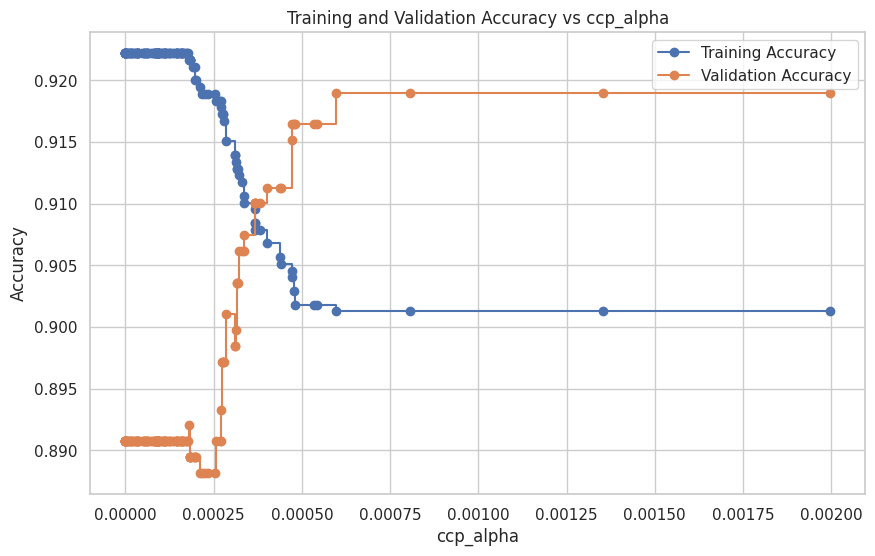

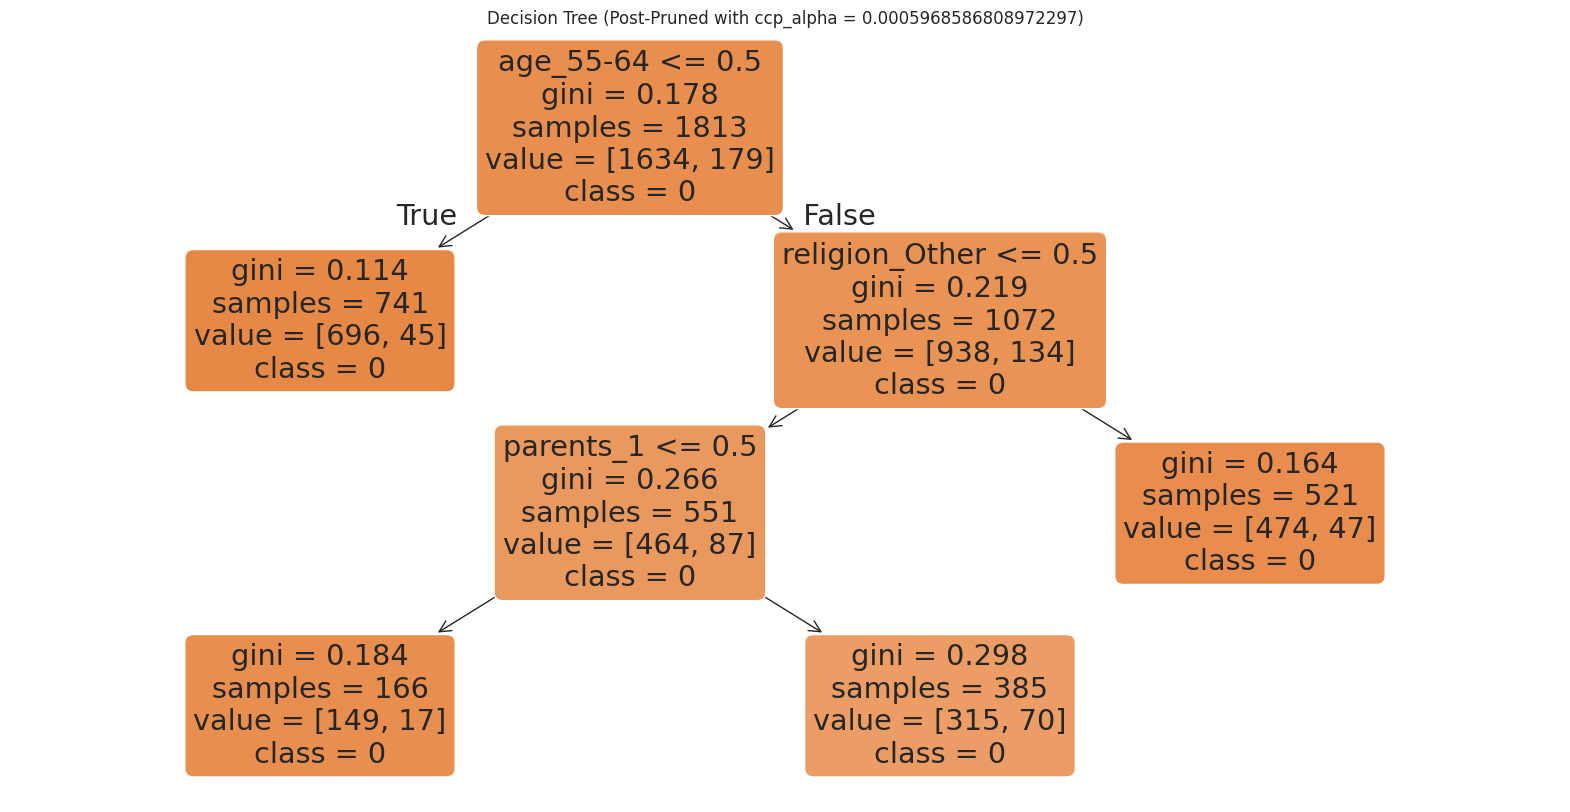

Test accuracy with best ccp_alpha: 0.9190231362467867


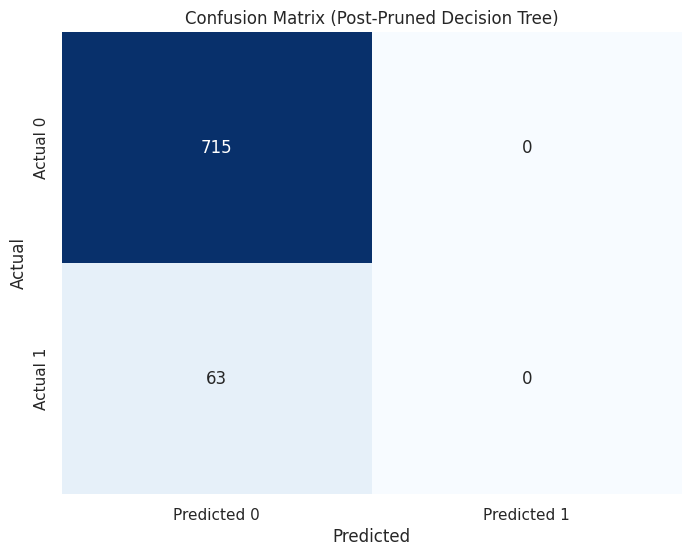

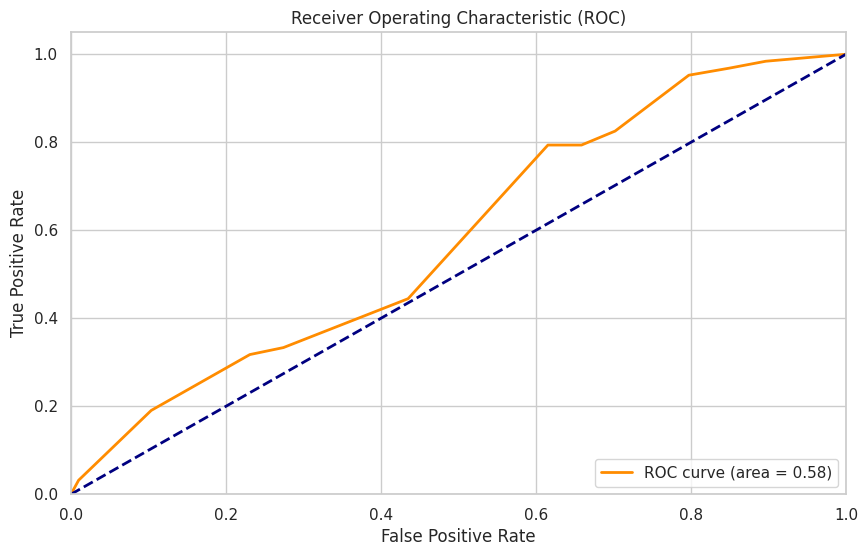

In [ ]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# Prepare the data
X = data3.drop('true_conversion', axis=1)
y = data3['true_conversion']

# Convert categorical features to numerical using one-hot encoding
X = pd.get_dummies(X, drop_first=True)

# Split the data into training and validation sets if not already done
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

# Fit a decision tree classifier to get the effective alphas
clf = DecisionTreeClassifier(random_state=42)
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas  # array of alpha values for pruning
clfs = []

# Train a series of decision trees with different ccp_alpha values
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=42, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)

# Calculate training and validation accuracies for each tree
train_scores = [accuracy_score(y_train, clf.predict(X_train)) for clf in clfs]
val_scores = [accuracy_score(y_val, clf.predict(X_val)) for clf in clfs]

# Identify the best alpha that gives the maximum validation accuracy
best_alpha_index = np.argmax(val_scores)
best_alpha = ccp_alphas[best_alpha_index]

print(f"Best ccp_alpha for maximum validation accuracy: {best_alpha}")

# Train the decision tree with the best ccp_alpha
clf_best = DecisionTreeClassifier(random_state=42, ccp_alpha=best_alpha)
clf_best.fit(X_train, y_train)

# Plot training and validation scores vs. ccp_alpha
plt.figure(figsize=(10, 6))
plt.plot(ccp_alphas, train_scores, marker='o', label='Training Accuracy', drawstyle="steps-post")
plt.plot(ccp_alphas, val_scores, marker='o', label='Validation Accuracy', drawstyle="steps-post")
plt.xlabel("ccp_alpha")
plt.ylabel("Accuracy")
plt.title("Training and Validation Accuracy vs ccp_alpha")
plt.legend()
plt.show()

# Visualize the pruned decision tree
plt.figure(figsize=(20, 10))
plot_tree(clf_best, feature_names=X.columns, class_names=['0', '1'], filled=True, rounded=True)
plt.title(f"Decision Tree (Post-Pruned with ccp_alpha = {best_alpha})")
plt.show()

# Evaluate on the test set
y_pred = clf_best.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)
print(f"Test accuracy with best ccp_alpha: {test_accuracy}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix (Post-Pruned Decision Tree)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# ROC Curve
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

### Bagging Classifier

Bagging Classifier:
Best parameters: {'bootstrap': True, 'max_features': 0.5, 'max_samples': 0.6, 'n_estimators': 50}
              precision    recall  f1-score   support

           0       0.92      1.00      0.96       715
           1       0.00      0.00      0.00        63

    accuracy                           0.92       778
   macro avg       0.46      0.50      0.48       778
weighted avg       0.84      0.92      0.88       778

ROC AUC Score: 0.6475080475080475


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


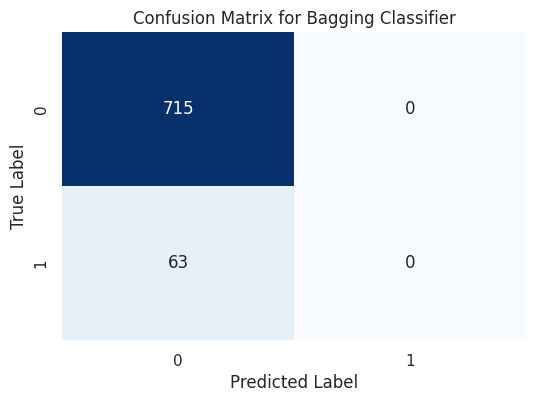

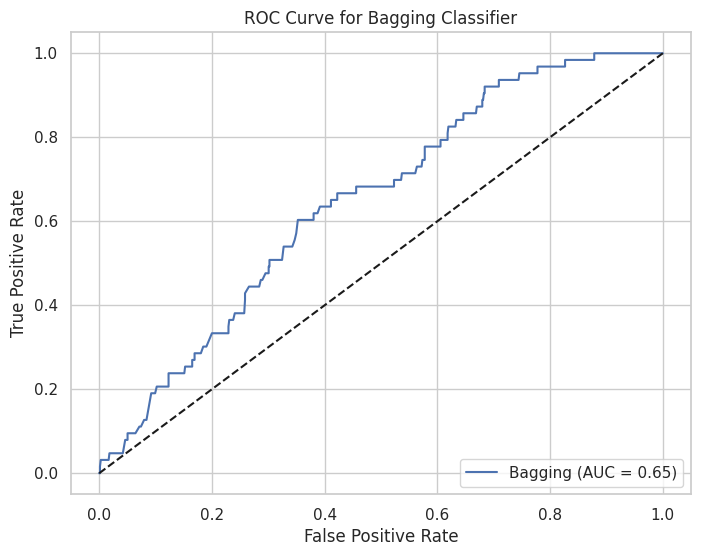

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, auc, confusion_matrix
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Bagging Classifier with extended parameter grid
bagging_clf = BaggingClassifier(random_state=42)
bagging_params = {
    'n_estimators': [50, 100, 200],
    'max_samples': [0.6, 0.8, 1.0],
    'max_features': [0.5, 0.75, 1.0],
    'bootstrap': [True, False]
}
bagging_grid = GridSearchCV(bagging_clf, bagging_params, cv=5, scoring='roc_auc')
bagging_grid.fit(X_train, y_train)
bagging_best = bagging_grid.best_estimator_

# Predictions and Evaluation
bagging_pred = bagging_best.predict(X_test)
bagging_prob = bagging_best.predict_proba(X_test)[:, 1]

# Print Best Parameters and Classification Report
print("Bagging Classifier:")
print("Best parameters:", bagging_grid.best_params_)
print(classification_report(y_test, bagging_pred))
print(f"ROC AUC Score: {roc_auc_score(y_test, bagging_prob)}")

# Confusion Matrix Heatmap
conf_matrix = confusion_matrix(y_test, bagging_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix for Bagging Classifier")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, bagging_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Bagging (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Random classifier line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Bagging Classifier')
plt.legend(loc='lower right')
plt.show()


### Random Forest Classifier


Random Forest Classifier:
Best parameters: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}
              precision    recall  f1-score   support

           0       0.92      1.00      0.96       715
           1       0.00      0.00      0.00        63

    accuracy                           0.92       778
   macro avg       0.46      0.50      0.48       778
weighted avg       0.84      0.92      0.88       778

ROC AUC Score: 0.6358308358308358


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


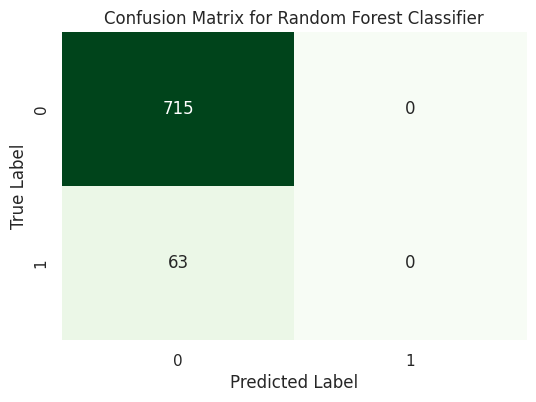

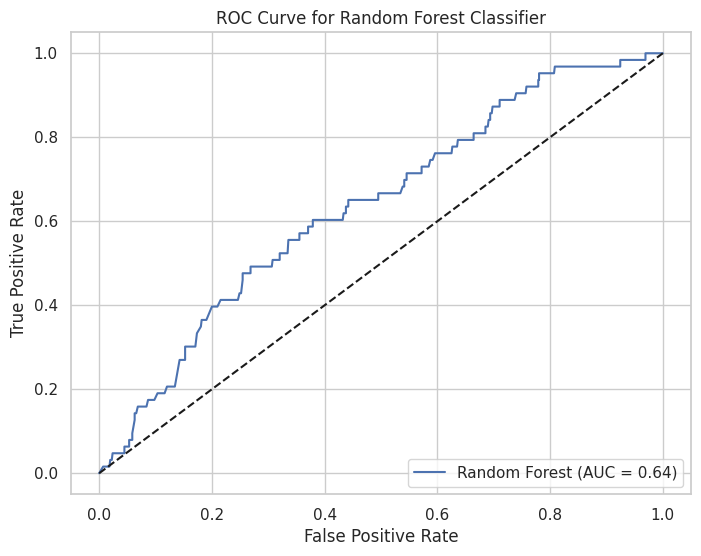


Feature Importances (Random Forest):
income_>100K                 0.098110
religion_Other               0.094150
area_Urban                   0.093081
homeowner_1                  0.084226
parents_1                    0.078312
gender_M                     0.077273
age_55-64                    0.076176
college_educated_1           0.072344
politics_Environmentalism    0.058625
politics_Conservatism        0.052613
politics_Moderate            0.050088
politics_Liberalism          0.040744
politics_Conservative        0.033974
age_45-54                    0.031467
age_25-34                    0.031296
politics_Liberal             0.026195
politics_Socialism           0.001326
dtype: float64


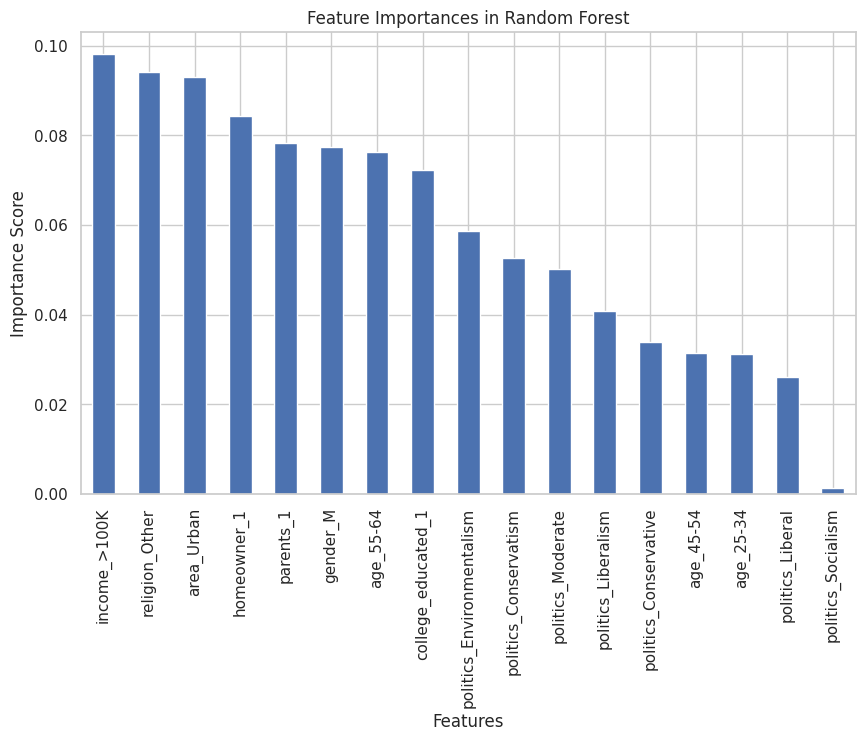

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, auc, confusion_matrix
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Random Forest Classifier with extended parameter grid
rf_clf = RandomForestClassifier(random_state=42)
rf_params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]
}
rf_grid = GridSearchCV(rf_clf, rf_params, cv=5, scoring='roc_auc')
rf_grid.fit(X_train, y_train)
rf_best = rf_grid.best_estimator_

# Predictions and Evaluation
rf_pred = rf_best.predict(X_test)
rf_prob = rf_best.predict_proba(X_test)[:, 1]

# Print Best Parameters and Classification Report
print("\nRandom Forest Classifier:")
print("Best parameters:", rf_grid.best_params_)
print(classification_report(y_test, rf_pred))
print(f"ROC AUC Score: {roc_auc_score(y_test, rf_prob)}")

# Confusion Matrix Heatmap
conf_matrix_rf = confusion_matrix(y_test, rf_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_rf, annot=True, fmt="d", cmap="Greens", cbar=False)
plt.title("Confusion Matrix for Random Forest Classifier")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# ROC Curve
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, rf_prob)
roc_auc_rf = auc(fpr_rf, tpr_rf)

plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {roc_auc_rf:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Random classifier line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Random Forest Classifier')
plt.legend(loc='lower right')
plt.show()

# Feature Importance
rf_feature_importances = pd.Series(rf_best.feature_importances_, index=X_train.columns).sort_values(ascending=False)
print("\nFeature Importances (Random Forest):")
print(rf_feature_importances)

# Plot feature importances
plt.figure(figsize=(10, 6))
rf_feature_importances.plot(kind='bar')
plt.title("Feature Importances in Random Forest")
plt.xlabel("Features")
plt.ylabel("Importance Score")
plt.show()


### Naive Bayes Classification

Accuracy: 0.10668380462724936
Precision: 0.08311345646437995
Recall: 1.0
F1-score: 0.15347137637028013
ROC AUC: 0.6446664446664447


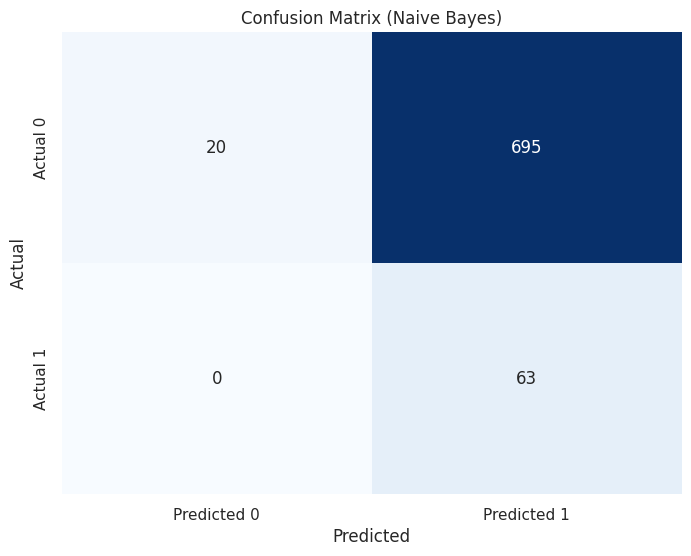

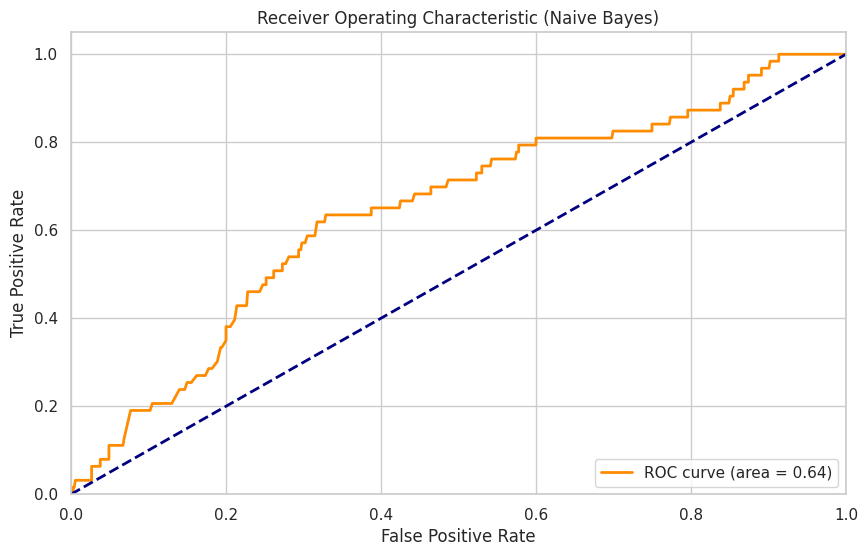

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming X_train, X_test, y_train, y_test are already defined from the previous code

# Initialize and train the Gaussian Naive Bayes classifier
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = nb_classifier.predict(X_test)
y_prob = nb_classifier.predict_proba(X_test)[:, 1]

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)


print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")
print(f"ROC AUC: {roc_auc}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix (Naive Bayes)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (Naive Bayes)')
plt.legend(loc="lower right")
plt.show()

### Artificial Neural Network

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9054 - loss: 0.6872 - val_accuracy: 0.8750 - val_loss: 0.6716
Epoch 2/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9113 - loss: 0.6639 - val_accuracy: 0.8750 - val_loss: 0.6514
Epoch 3/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9097 - loss: 0.6420 - val_accuracy: 0.8750 - val_loss: 0.6323
Epoch 4/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9132 - loss: 0.6207 - val_accuracy: 0.8750 - val_loss: 0.6144
Epoch 5/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9043 - loss: 0.6031 - val_accuracy: 0.8750 - val_loss: 0.5976
Epoch 6/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8978 - loss: 0.5869 - val_accuracy: 0.8750 - val_loss: 0.5818
Epoch 7/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9080 - loss: 0.5666 - val_accuracy: 0.8750 - val_loss: 0.5670
Epoch 8/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9074 - loss: 0.5506 - val_accuracy: 0.8750 - val_loss: 0.5

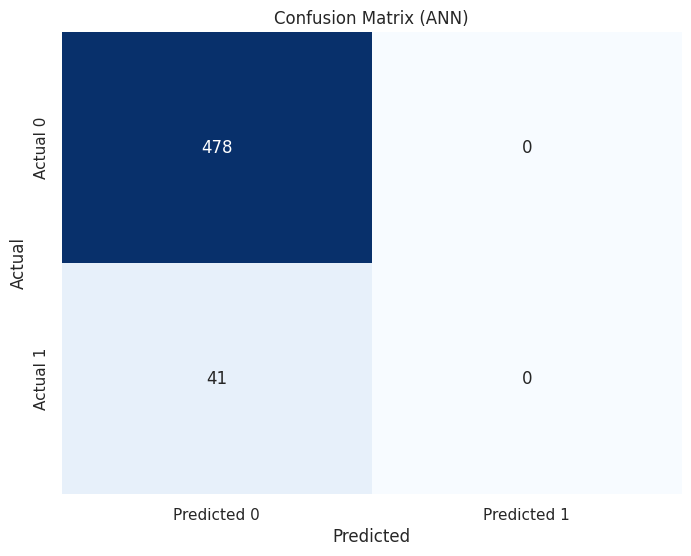

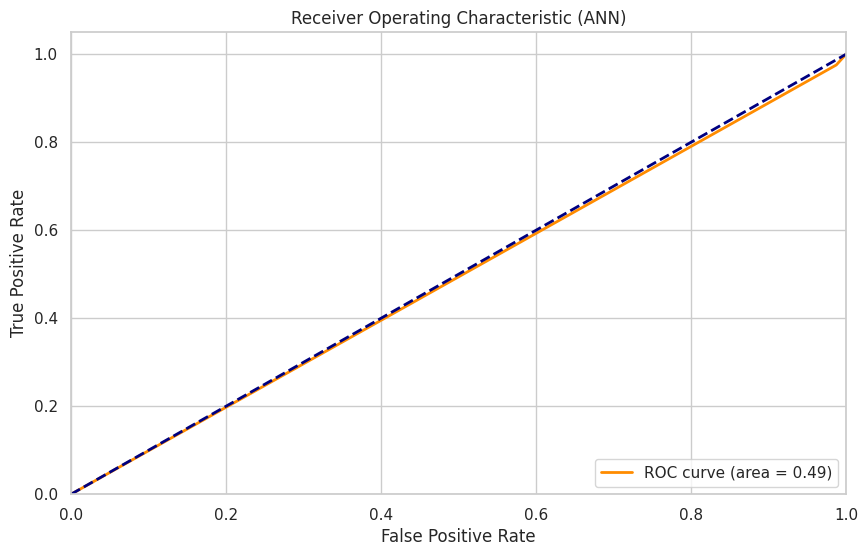

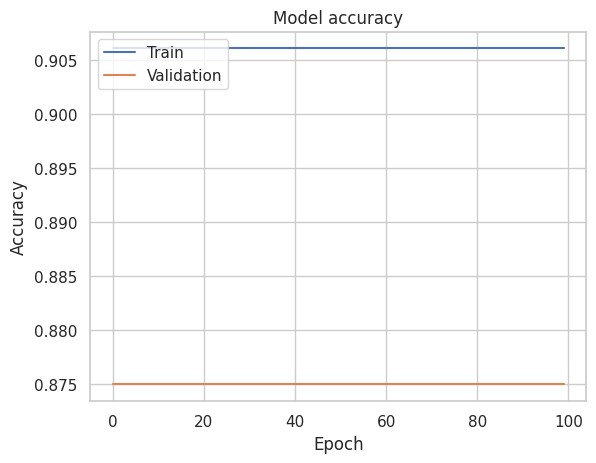

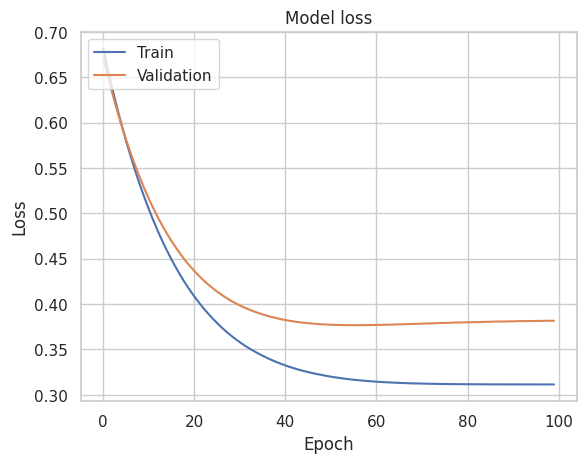

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data' is your DataFrame
# Prepare the data
X = data3.drop('true_conversion', axis=1)
y = data3['true_conversion']

# Identify numerical and categorical features
numerical_cols = X.select_dtypes(include=np.number).columns
categorical_cols = X.select_dtypes(include=['object']).columns

# Create transformers
numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown="ignore")

# Combine transformers using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])


# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a pipeline
model_pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

# Fit and transform the training data
X_train_transformed = model_pipeline.fit_transform(X_train)

# Transform the testing data
X_test_transformed = model_pipeline.transform(X_test)

# Define the ANN model
model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(X_train_transformed.shape[1],)),
    layers.Dropout(0.1),  # Add dropout for regularization
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.1),
    layers.Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train_transformed, y_train, epochs=100, batch_size=32, validation_split=0.1)


# Make predictions on the test set
y_pred_prob = model.predict(X_test_transformed)
y_pred = (y_pred_prob > 0.5).astype(int)

# Evaluate the model
loss, accuracy = model.evaluate(X_test_transformed, y_test, verbose=0)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")


#Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix (ANN)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

#ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ANN)')
plt.legend(loc="lower right")
plt.show()

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

### XG Boost

Fitting 5 folds for each of 50 candidates, totalling 250 fits


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [18:32:54] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


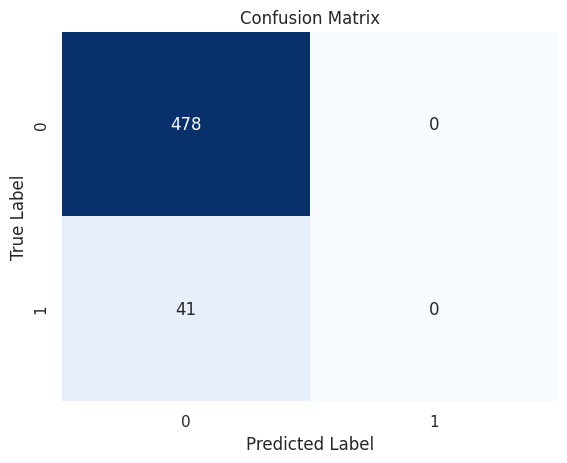

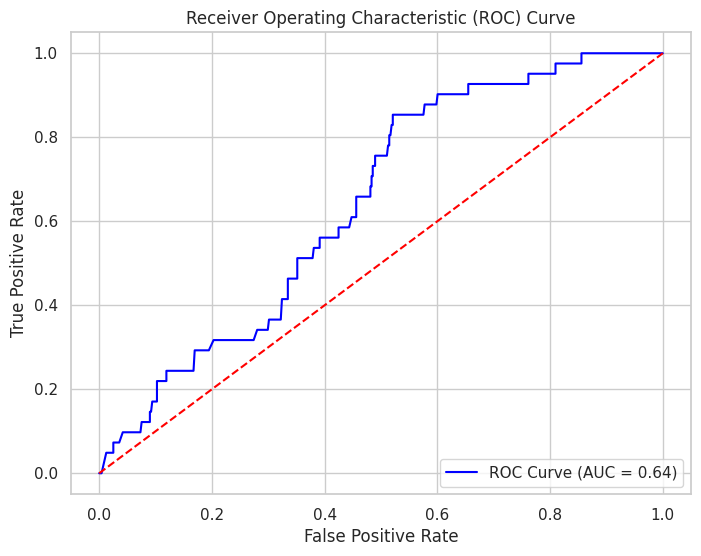

              precision    recall  f1-score   support

           0       0.92      1.00      0.96       478
           1       0.00      0.00      0.00        41

    accuracy                           0.92       519
   macro avg       0.46      0.50      0.48       519
weighted avg       0.85      0.92      0.88       519



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# Separate features and target
X = data3.drop("true_conversion", axis=1)
y = data3["true_conversion"]

# Convert categorical features to numeric using one-hot encoding
X = pd.get_dummies(X, drop_first=True)

# Encode the target variable if it is categorical
le = LabelEncoder()
y = le.fit_transform(y)

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define parameter grid for XGBoost
param_dist = {
    "n_estimators": [100, 200, 300, 400, 500],
    "max_depth": [3, 5, 7, 9, 11],
    "learning_rate": [0.01, 0.05, 0.1, 0.15, 0.2],
    "subsample": [0.6, 0.7, 0.8, 0.9, 1.0],
    "colsample_bytree": [0.6, 0.7, 0.8, 0.9, 1.0],
    "gamma": [0, 0.1, 0.2, 0.3, 0.4],
    "min_child_weight": [1, 3, 5, 7]
}

# Initialize XGBoost classifier
xgb_clf = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Use RandomizedSearchCV to tune parameters
random_search = RandomizedSearchCV(
    estimator=xgb_clf,
    param_distributions=param_dist,
    n_iter=50,
    scoring='roc_auc',
    cv=5,
    verbose=1,
    n_jobs=-1,
    random_state=42
)

# Fit the model
random_search.fit(X_train, y_train)

# Get the best estimator
best_model = random_search.best_estimator_

# Make predictions
y_pred = best_model.predict(X_test)
y_pred_proba = best_model.predict_proba(X_test)[:, 1]

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color="blue", label="ROC Curve (AUC = {:.2f})".format(roc_auc))
plt.plot([0, 1], [0, 1], color="red", linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.show()

# Print classification report
print(classification_report(y_test, y_pred))


# DATASET BALANCING BY SMOTE (Synthetic Minority Oversampling Technique)

In [ ]:
data3

religion          politics college_educated parents homeowner  \
0        Christianity  Environmentalism                1       1         1   
1               Other         Communism                1       1         1   
2               Other      Conservative                1       1         1   
4               Other          Moderate                1       1         1   
6        Christianity         Communism                1       1         1   
...               ...               ...              ...     ...       ...   
1434335         Other          Moderate                1       1         1   
1434358         Other           Liberal                1       0         1   
1435329         Other      Conservatism                1       1         1   
1441325         Other          Moderate                0       1         0   
1441742         Other      Conservatism                0       1         1   

        gender    age income   area  true_conversion  
0            M  55-64  <100K  Urban                0  
1            M  55-64  <100K  Urban                0  
2            F  55-64  <100K  Urban                0  
4            F  55-64  >100K  Urban                0  
6            M  55-64  <100K  Rural                0  
...        ...    ...    ...    ...              ...  
1434335      F  45-54  <100K  Rural                0  
1434358      M  55-64  <100K  Rural                0  
1435329      F  18-24  >100K  Urban                0  
1441325      M  45-54  <100K  Urban                0  
1441742      F  45-54  >100K  Urban                0  

[2591 rows x 10 columns]

In [ ]:
# Calculate the count and percentage of true conversions (1) and non-conversions (0)
conversion_counts = data3['true_conversion'].value_counts()
conversion_percentages = data3['true_conversion'].value_counts(normalize=True) * 100

print("Conversion Counts:\n", conversion_counts)
print("\nConversion Percentages:\n", conversion_percentages)

Conversion Counts:
 0    2349
1     242
Name: true_conversion, dtype: int64

Conversion Percentages:
 0    90.659977
1     9.340023
Name: true_conversion, dtype: float64


In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import FunctionTransformer
from collections import Counter
import pandas as pd

# Separate features and target
X = data3.drop('true_conversion', axis=1)  # Replace 'target_column' with the actual name of the target variable
y = data3['true_conversion']

print("Original dataset shape %s" % Counter(y))

# Step 1: Identify categorical and numeric columns
categorical_cols = X.select_dtypes(include=['object', 'category']).columns
numerical_cols = X.select_dtypes(include=['number']).columns

# Step 2: Determine the encoding strategy for each categorical column
# Threshold for deciding one-hot encoding vs label encoding
high_cardinality_threshold = 10

# Separate columns based on their cardinality (number of unique values)
low_cardinality_categorical_cols = [col for col in categorical_cols if X[col].nunique() <= high_cardinality_threshold]
high_cardinality_categorical_cols = [col for col in categorical_cols if X[col].nunique() > high_cardinality_threshold]

# Step 3: Define transformers
# 3a. One-hot encode low-cardinality columns
one_hot_transformer = OneHotEncoder(drop='first', handle_unknown='ignore')

# 3b. Label encode high-cardinality columns
# Use a custom transformer to apply LabelEncoder to each column individually
def label_encode_columns(X):
    X = X.copy()
    for col in X.columns:
        X[col] = LabelEncoder().fit_transform(X[col].astype(str))
    return X

label_transformer = FunctionTransformer(label_encode_columns)

# Step 4: Create a ColumnTransformer for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numerical_cols),  # Keep numerical columns as is
        ('low_card_cat', one_hot_transformer, low_cardinality_categorical_cols),
        ('high_card_cat', label_transformer, high_cardinality_categorical_cols)
    ],
    remainder='drop'  # Drop any columns not specified
)

# Step 5: Preprocess the data
X_preprocessed = preprocessor.fit_transform(X)

# Step 6: Apply SMOTE to the preprocessed data
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_preprocessed, y)

print("Resampled dataset shape %s" % Counter(y_res))


Original dataset shape Counter({0: 2349, 1: 242})
Resampled dataset shape Counter({0: 2349, 1: 2349})


In [ ]:
# Step 7: Convert SMOTE results to DataFrames
import numpy as np

# Get the transformed feature names from the ColumnTransformer
one_hot_columns = preprocessor.named_transformers_['low_card_cat'].get_feature_names_out(low_cardinality_categorical_cols)
feature_names = numerical_cols.tolist() + one_hot_columns.tolist() + high_cardinality_categorical_cols
X_res_df = pd.DataFrame(X_res, columns=feature_names)
y_res_df = pd.Series(y_res, name='true_conversion')

# Step 8: Revert label encoding for high cardinality columns
# Define a function to reverse label encoding using the original data's unique values

def revert_label_encoding(col, original_data):
    le = LabelEncoder()
    le.fit(original_data[col].astype(str))
    return le.inverse_transform(X_res_df[col].astype(int))

for col in high_cardinality_categorical_cols:
    X_res_df[col] = revert_label_encoding(col, X)

# Step 9: Revert one-hot encoding for low cardinality columns
# This step will combine one-hot encoded columns into their original categorical columns

for col in low_cardinality_categorical_cols:
    # Get all one-hot columns for this category
    one_hot_columns = [c for c in X_res_df.columns if c.startswith(col + '_')]
    if one_hot_columns:
        # Find the original category by locating the max value per row
        X_res_df[col] = X_res_df[one_hot_columns].idxmax(axis=1).str.replace(f'{col}_', '')
        # Drop the one-hot columns as we now have the original column back
        X_res_df.drop(columns=one_hot_columns, inplace=True)

# Step 10: Combine features and target back into one DataFrame
data4 = pd.concat([X_res_df, y_res_df.reset_index(drop=True)], axis=1)

# Display the first few rows to verify the format
data4

religion          politics college_educated parents homeowner gender  \
0       Other  Environmentalism                1       1         1      M   
1       Other      Conservatism                1       1         1      M   
2       Other      Conservative                1       1         1      M   
3       Other          Moderate                1       1         1      M   
4       Other      Conservatism                1       1         1      M   
...       ...               ...              ...     ...       ...    ...   
4693    Other           Liberal                1       1         1      M   
4694    Other  Environmentalism                1       1         1      M   
4695    Other          Moderate                1       1         1      M   
4696    Other      Conservatism                1       1         1      M   
4697    Other          Moderate                1       1         1      M   

        age income   area  true_conversion  
0     55-64  >100K  Urban                0  
1     55-64  >100K  Urban                0  
2     55-64  >100K  Urban                0  
3     55-64  >100K  Urban                0  
4     55-64  >100K  Urban                0  
...     ...    ...    ...              ...  
4693  25-34  >100K  Urban                1  
4694  55-64  >100K  Urban                1  
4695  55-64  >100K  Urban                1  
4696  55-64  >100K  Urban                1  
4697  25-34  >100K  Urban                1  

[4698 rows x 10 columns]

In [ ]:
# Calculate the count and percentage of true conversions (1) and non-conversions (0)
conversion_counts = data4['true_conversion'].value_counts()
conversion_percentages = data4['true_conversion'].value_counts(normalize=True) * 100

print("Conversion Counts:\n", conversion_counts)
print("\nConversion Percentages:\n", conversion_percentages)

Conversion Counts:
 0    2349
1    2349
Name: true_conversion, dtype: int64

Conversion Percentages:
 0    50.0
1    50.0
Name: true_conversion, dtype: float64


# CLASSIFICATION MODELS AFTER SMOTE

In [ ]:
data4

religion          politics college_educated parents homeowner gender  \
0       Other  Environmentalism                1       1         1      M   
1       Other      Conservatism                1       1         1      M   
2       Other      Conservative                1       1         1      M   
3       Other          Moderate                1       1         1      M   
4       Other      Conservatism                1       1         1      M   
...       ...               ...              ...     ...       ...    ...   
4693    Other           Liberal                1       1         1      M   
4694    Other  Environmentalism                1       1         1      M   
4695    Other          Moderate                1       1         1      M   
4696    Other      Conservatism                1       1         1      M   
4697    Other          Moderate                1       1         1      M   

        age income   area  true_conversion  
0     55-64  >100K  Urban                0  
1     55-64  >100K  Urban                0  
2     55-64  >100K  Urban                0  
3     55-64  >100K  Urban                0  
4     55-64  >100K  Urban                0  
...     ...    ...    ...              ...  
4693  25-34  >100K  Urban                1  
4694  55-64  >100K  Urban                1  
4695  55-64  >100K  Urban                1  
4696  55-64  >100K  Urban                1  
4697  25-34  >100K  Urban                1  

[4698 rows x 10 columns]

In [ ]:
import pandas as pd
from sklearn.utils import shuffle

# Assuming 'data4' is your DataFrame
# Shuffle the entire dataset to mix 0s and 1s in 'true_conversion'
data5 = shuffle(data4, random_state=42)

# After shuffling, you can recheck the distribution of the classes
print("Shuffled dataset class distribution:\n", data5['true_conversion'].value_counts())


Shuffled dataset class distribution:
 1    2349
0    2349
Name: true_conversion, dtype: int64


In [ ]:
data5

religion          politics college_educated parents homeowner gender  \
3526    Other  Environmentalism                1       1         1      M   
1504    Other          Moderate                1       1         1      M   
354     Other      Conservatism                1       1         1      M   
670     Other  Environmentalism                1       1         1      M   
3869    Other  Environmentalism                1       1         1      M   
...       ...               ...              ...     ...       ...    ...   
4426    Other      Conservative                1       1         1      M   
466     Other          Moderate                1       1         1      M   
3092    Other      Conservatism                1       1         1      M   
3772    Other      Conservatism                1       1         1      M   
860     Other  Environmentalism                1       1         1      M   

        age income   area  true_conversion  
3526  25-34  >100K  Urban                1  
1504  55-64  >100K  Urban                0  
354   55-64  >100K  Urban                0  
670   55-64  >100K  Urban                0  
3869  55-64  >100K  Urban                1  
...     ...    ...    ...              ...  
4426  55-64  >100K  Urban                1  
466   55-64  >100K  Urban                0  
3092  55-64  >100K  Urban                1  
3772  55-64  >100K  Urban                1  
860   55-64  >100K  Urban                0  

[4698 rows x 10 columns]

### Decision Tree after SMOTE

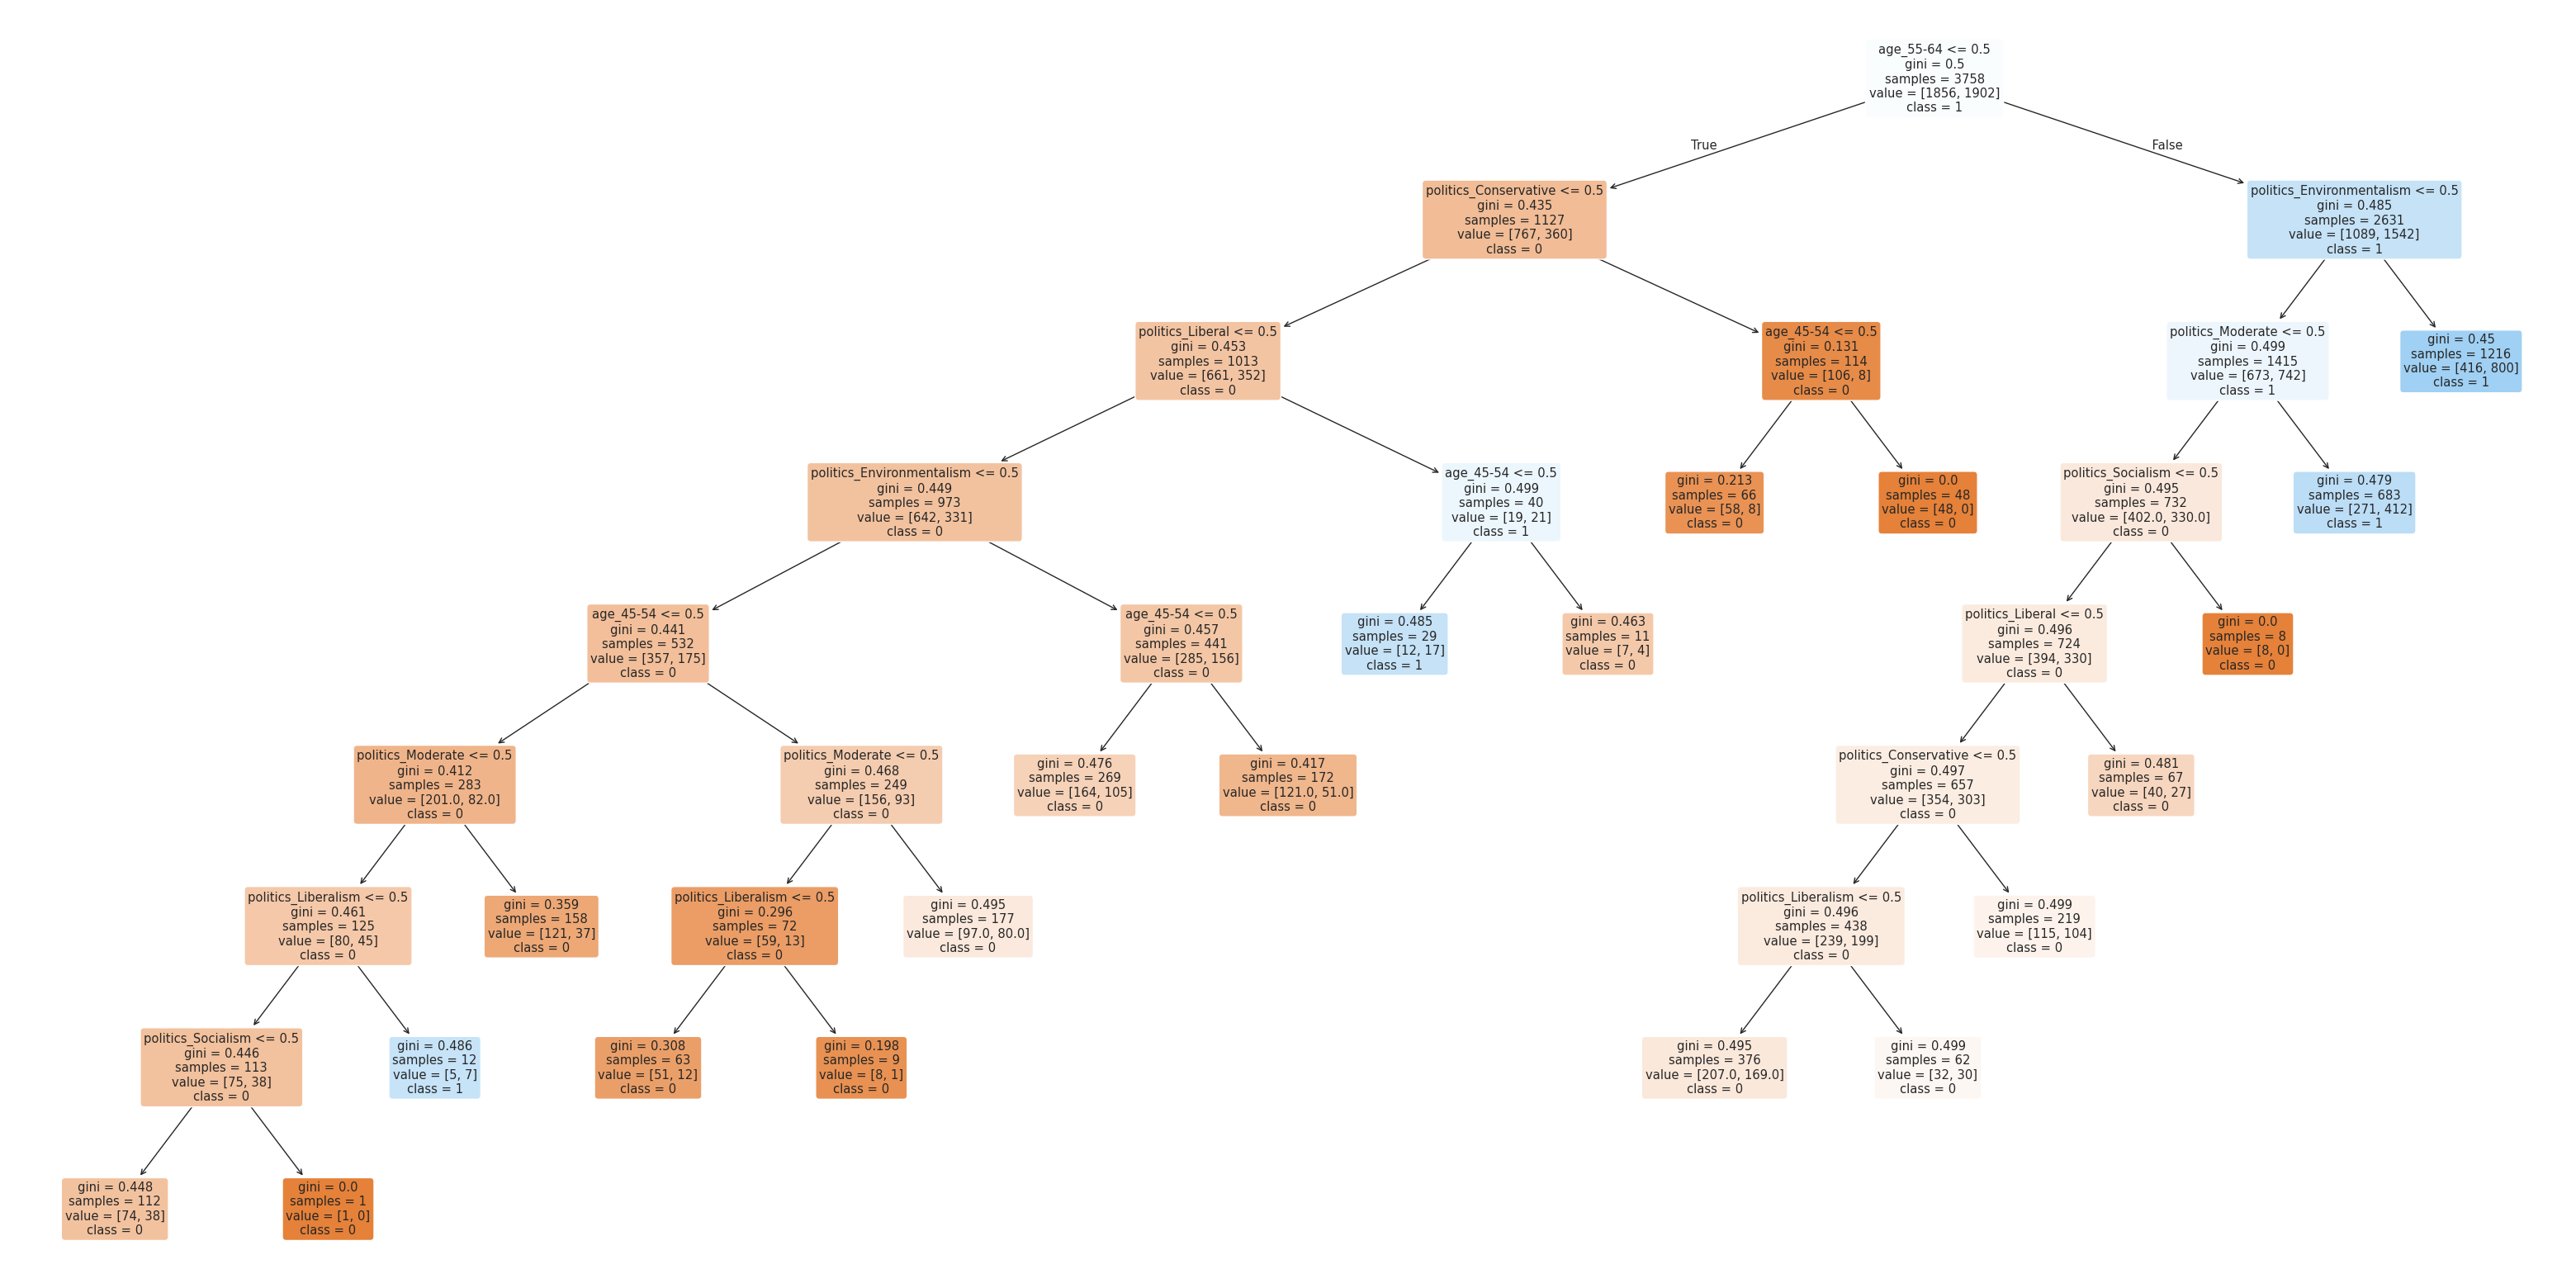

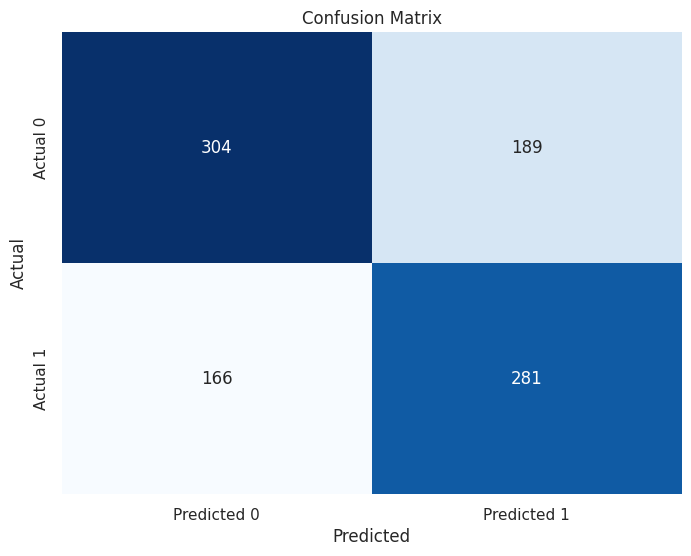

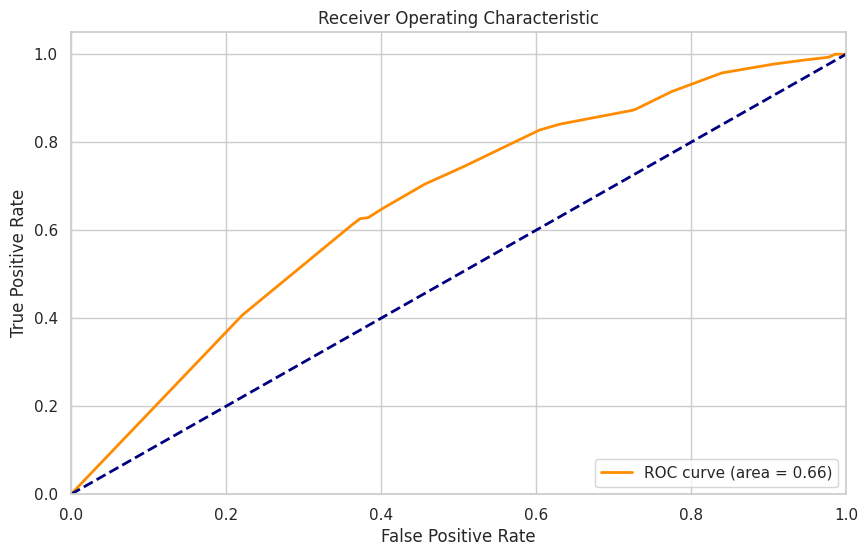

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# Prepare the data
X = data5.drop('true_conversion', axis=1)
y = data5['true_conversion']

# Convert categorical features to numerical using one-hot encoding
X = pd.get_dummies(X, drop_first=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the decision tree classifier
clf = DecisionTreeClassifier(random_state=42)  # No max_depth for a fully grown tree
clf.fit(X_train, y_train)

# Visualize the decision tree
plt.figure(figsize=(40, 20))
plot_tree(clf, feature_names=X.columns, class_names=['0', '1'], filled=True, rounded=True)
plt.show()

# Make predictions on the test set
y_pred = clf.predict(X_test)
y_prob = clf.predict_proba(X_test)[:, 1]

# Evaluate the model
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

### Pre-Pruned Decision Tree after SMOTE

Best depth for maximum AUC: 8


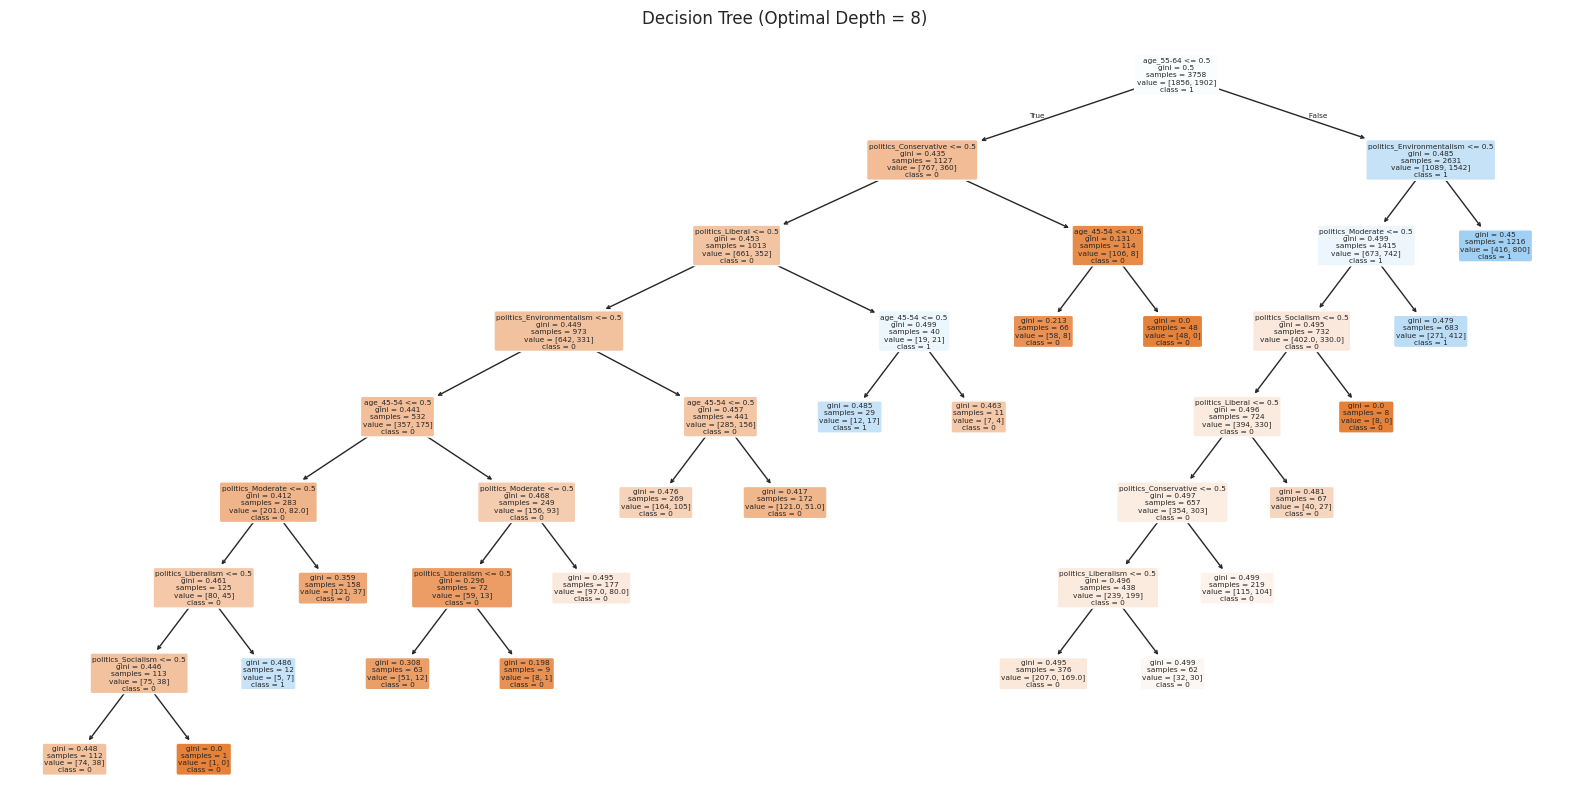

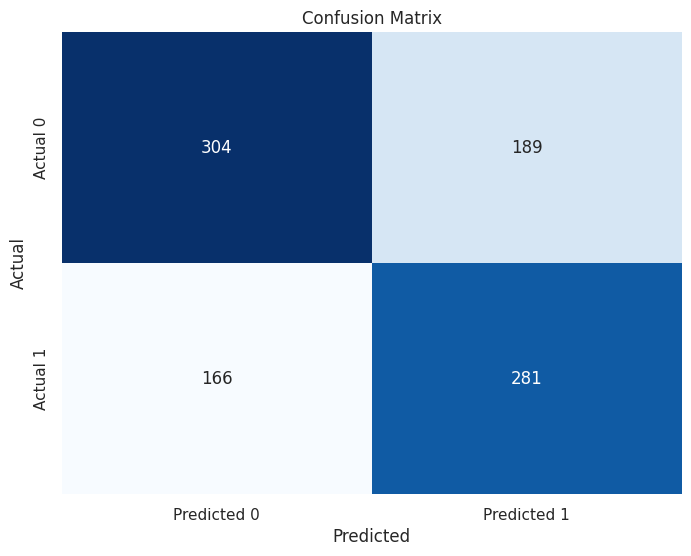

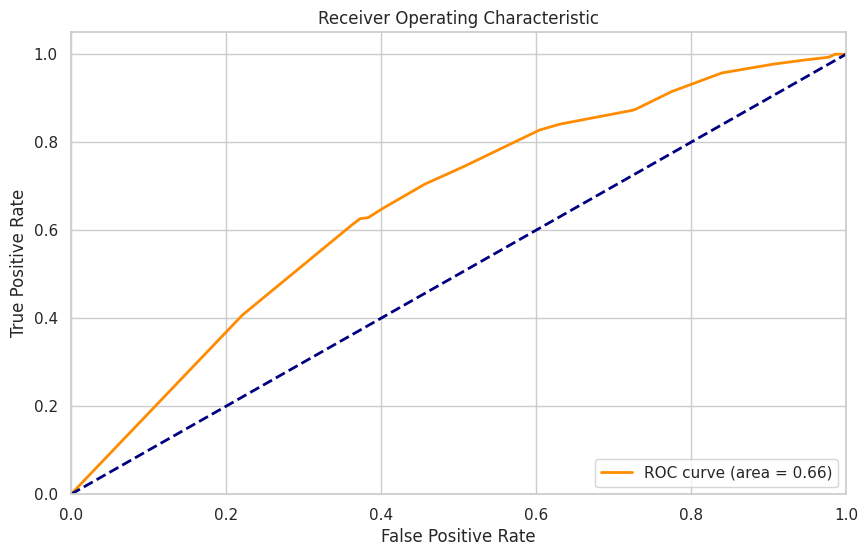

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import roc_auc_score, roc_curve, auc, confusion_matrix
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Initialize variables to store the best depth and the highest AUC score
best_depth = None
best_auc = 0
auc_scores = []

# Test max depths from 4 to 16
for depth in range(4, 16):
    clf = DecisionTreeClassifier(max_depth=depth, random_state=42)

    # Calculate the mean AUC score using cross-validation
    cv_auc = cross_val_score(clf, X_train, y_train, cv=5, scoring='roc_auc').mean()
    auc_scores.append(cv_auc)

    # Update best depth if current AUC is higher than the previous best
    if cv_auc > best_auc:
        best_auc = cv_auc
        best_depth = depth

# Prepare the data
X = data5.drop('true_conversion', axis=1)
y = data5['true_conversion']

# Convert categorical features to numerical using one-hot encoding
X = pd.get_dummies(X, drop_first=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the decision tree with the best depth
clf_best = DecisionTreeClassifier(max_depth=best_depth, random_state=42)
clf_best.fit(X_train, y_train)

# Display the best depth
print(f"Best depth for maximum AUC: {best_depth}")

# Visualize the decision tree with the best depth
plt.figure(figsize=(20, 10))
plot_tree(clf_best, feature_names=X.columns, class_names=['0', '1'], filled=True, rounded=True)
plt.title(f"Decision Tree (Optimal Depth = {best_depth})")
plt.show()

# Make predictions and calculate AUC on the test set
y_pred = clf_best.predict(X_test)
y_prob = clf_best.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Plot ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


### Post-Pruned Decision Tree after SMOTE

Best ccp_alpha for maximum validation accuracy: 0.00022423591875583848


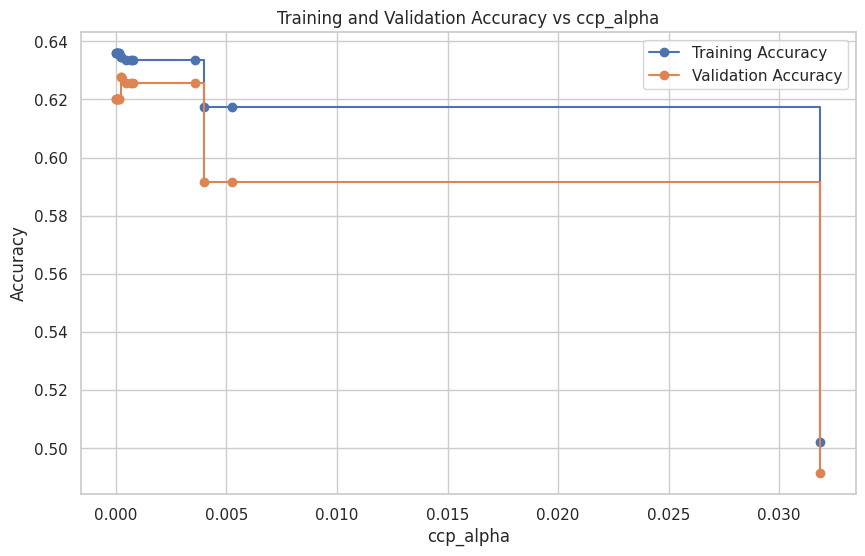

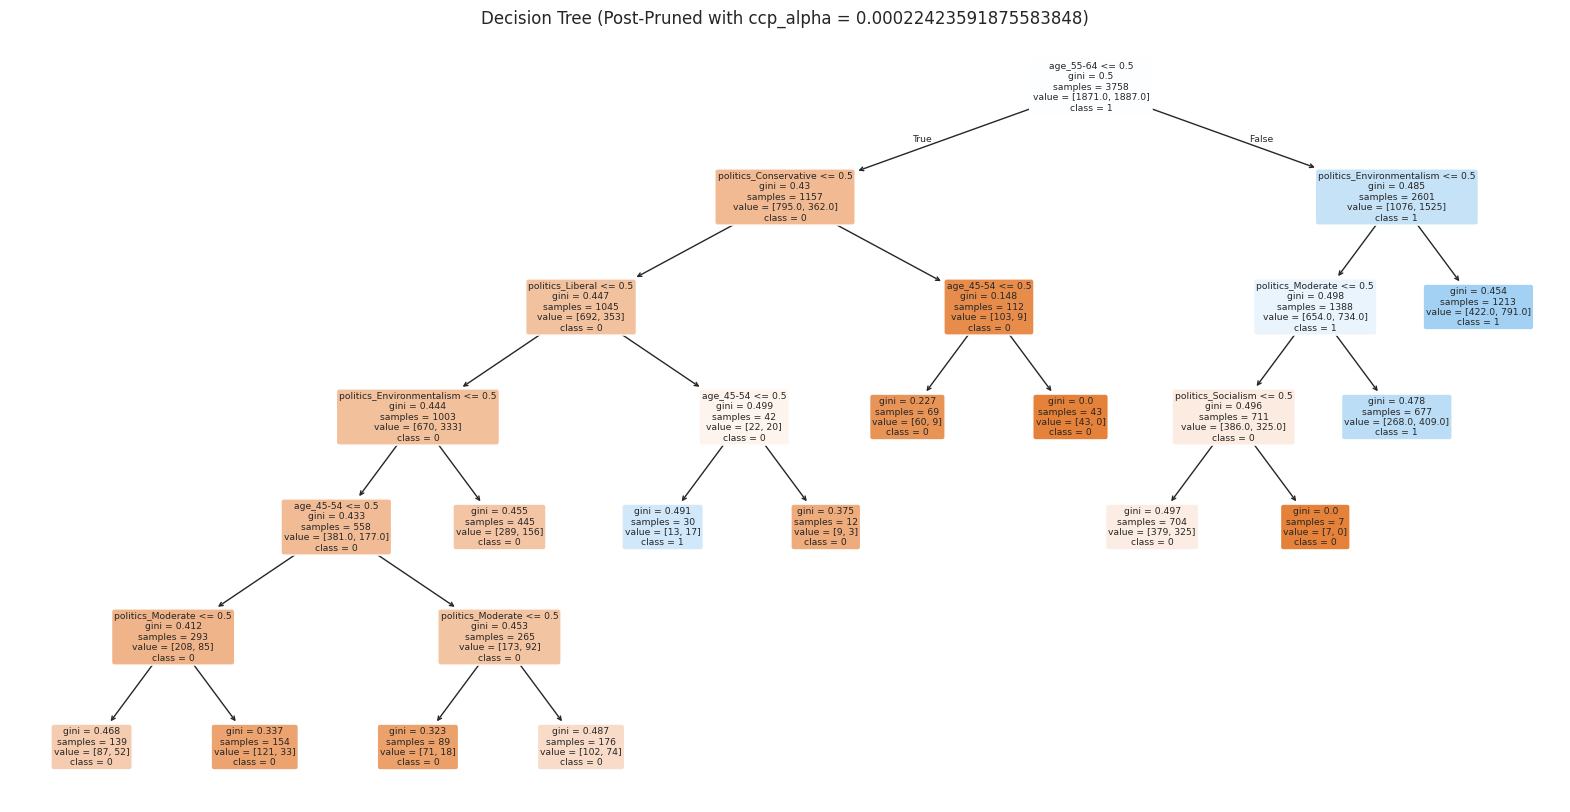

Test accuracy with best ccp_alpha: 0.6265957446808511


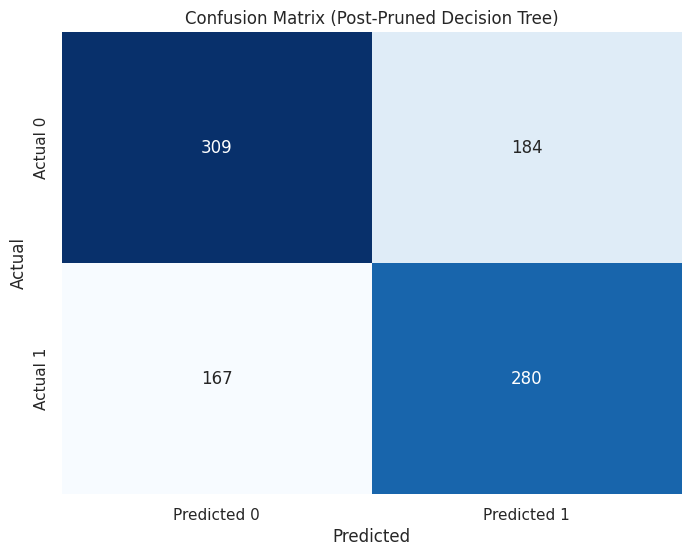

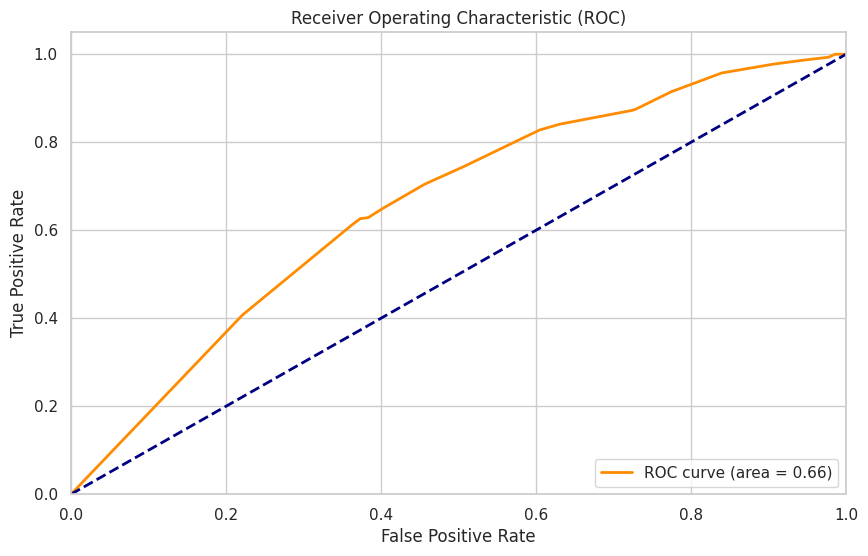

In [ ]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# Prepare the data
X = data4.drop('true_conversion', axis=1)
y = data4['true_conversion']

# Convert categorical features to numerical using one-hot encoding
X = pd.get_dummies(X, drop_first=True)

# Split the data into training and validation sets if not already done
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit a decision tree classifier to get the effective alphas
clf = DecisionTreeClassifier(random_state=42)
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas  # array of alpha values for pruning
clfs = []

# Train a series of decision trees with different ccp_alpha values
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=42, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)

# Calculate training and validation accuracies for each tree
train_scores = [accuracy_score(y_train, clf.predict(X_train)) for clf in clfs]
val_scores = [accuracy_score(y_val, clf.predict(X_val)) for clf in clfs]

# Identify the best alpha that gives the maximum validation accuracy
best_alpha_index = np.argmax(val_scores)
best_alpha = ccp_alphas[best_alpha_index]

print(f"Best ccp_alpha for maximum validation accuracy: {best_alpha}")

# Train the decision tree with the best ccp_alpha
clf_best = DecisionTreeClassifier(random_state=42, ccp_alpha=best_alpha)
clf_best.fit(X_train, y_train)

# Plot training and validation scores vs. ccp_alpha
plt.figure(figsize=(10, 6))
plt.plot(ccp_alphas, train_scores, marker='o', label='Training Accuracy', drawstyle="steps-post")
plt.plot(ccp_alphas, val_scores, marker='o', label='Validation Accuracy', drawstyle="steps-post")
plt.xlabel("ccp_alpha")
plt.ylabel("Accuracy")
plt.title("Training and Validation Accuracy vs ccp_alpha")
plt.legend()
plt.show()

# Visualize the pruned decision tree
plt.figure(figsize=(20, 10))
plot_tree(clf_best, feature_names=X.columns, class_names=['0', '1'], filled=True, rounded=True)
plt.title(f"Decision Tree (Post-Pruned with ccp_alpha = {best_alpha})")
plt.show()

# Evaluate on the test set
y_pred = clf_best.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)
print(f"Test accuracy with best ccp_alpha: {test_accuracy}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix (Post-Pruned Decision Tree)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# ROC Curve
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

### Bagging and Random Forest Classifiers after SMOTE

Bagging Classifier:
Best parameters: {'bootstrap': True, 'max_features': 0.75, 'max_samples': 1.0, 'n_estimators': 50}
              precision    recall  f1-score   support

           0       0.68      0.51      0.58       493
           1       0.57      0.73      0.64       447

    accuracy                           0.61       940
   macro avg       0.63      0.62      0.61       940
weighted avg       0.63      0.61      0.61       940

ROC AUC Score: 0.6551678759909425

Random Forest Classifier:
Best parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 200}
              precision    recall  f1-score   support

           0       0.66      0.61      0.63       493
           1       0.60      0.65      0.62       447

    accuracy                           0.63       940
   macro avg       0.63      0.63      0.63       940
weighted avg       0.63      0.63      0.63       940

ROC AUC Score: 0.6582853460754818


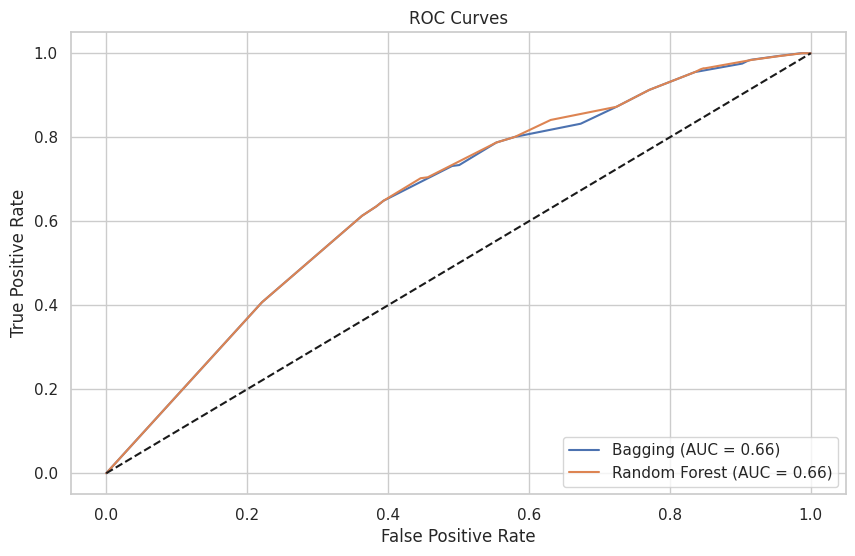

In [ ]:
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Bagging Classifier with extended parameter grid
bagging_clf = BaggingClassifier(random_state=42)
bagging_params = {
    'n_estimators': [50, 100, 200],            # Increase n_estimators for stability
    'max_samples': [0.6, 0.8, 1.0],            # Adjust sampling size
    'max_features': [0.5, 0.75, 1.0],          # Add max_features to limit the number of features per base estimator
    'bootstrap': [True, False]                 # Consider bootstrapping or not
}
bagging_grid = GridSearchCV(bagging_clf, bagging_params, cv=5, scoring='roc_auc')
bagging_grid.fit(X_train, y_train)
bagging_best = bagging_grid.best_estimator_

# Random Forest Classifier with extended parameter grid
rf_clf = RandomForestClassifier(random_state=42)
rf_params = {
    'n_estimators': [100, 200, 300],           # Increase range of estimators
    'max_depth': [None, 10, 20, 30],           # Allow deeper trees if needed
    'min_samples_split': [2, 5, 10],           # Control minimum samples to split nodes
    'min_samples_leaf': [1, 2, 4],             # Control minimum samples for leaf nodes
    'max_features': ['sqrt', 'log2', None]     # Test different subsets of features
}
rf_grid = GridSearchCV(rf_clf, rf_params, cv=5, scoring='roc_auc')
rf_grid.fit(X_train, y_train)
rf_best = rf_grid.best_estimator_

# Predictions
bagging_pred = bagging_best.predict(X_test)
rf_pred = rf_best.predict(X_test)

# Performance Evaluation
print("Bagging Classifier:")
print("Best parameters:", bagging_grid.best_params_)
print(classification_report(y_test, bagging_pred))
print(f"ROC AUC Score: {roc_auc_score(y_test, bagging_best.predict_proba(X_test)[:, 1])}")

print("\nRandom Forest Classifier:")
print("Best parameters:", rf_grid.best_params_)
print(classification_report(y_test, rf_pred))
print(f"ROC AUC Score: {roc_auc_score(y_test, rf_best.predict_proba(X_test)[:, 1])}")

# Visualization (ROC Curve for both models)
plt.figure(figsize=(10, 6))

for clf, label in [(bagging_best, 'Bagging'), (rf_best, 'Random Forest')]:
    y_prob = clf.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{label} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')  # Random classifier line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend(loc='lower right')
plt.show()


### Artificial Neural Network after SMOTE

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


106/106 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.5778 - loss: 0.6759 - val_accuracy: 0.6676 - val_loss: 0.6421
Epoch 2/100
106/106 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6033 - loss: 0.6656 - val_accuracy: 0.6649 - val_loss: 0.6289
Epoch 3/100
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6325 - loss: 0.6591 - val_accuracy: 0.6649 - val_loss: 0.6360
Epoch 4/100
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6291 - loss: 0.6499 - val_accuracy: 0.6649 - val_loss: 0.6240
Epoch 5/100
106/106 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6197 - loss: 0.6571 - val_accuracy: 0.6649 - val_loss: 0.6196
Epoch 6/100
106/106 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6236 - loss: 0.6485 - val_accuracy: 0.6676 - val_loss: 0.6187
Epoch 7/100
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6164 - loss: 0.6567 - val_accuracy: 0.6649 - val_loss: 0.6123
Epoch 8/100
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6274 - loss: 0.6493 - val_accuracy: 0.6649

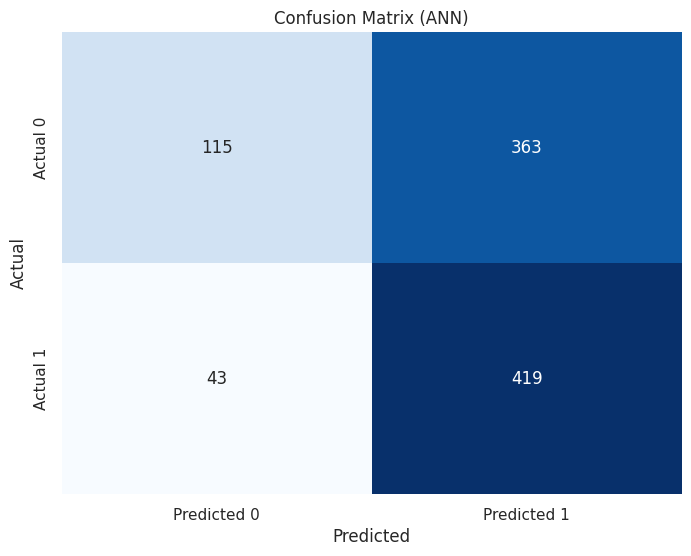

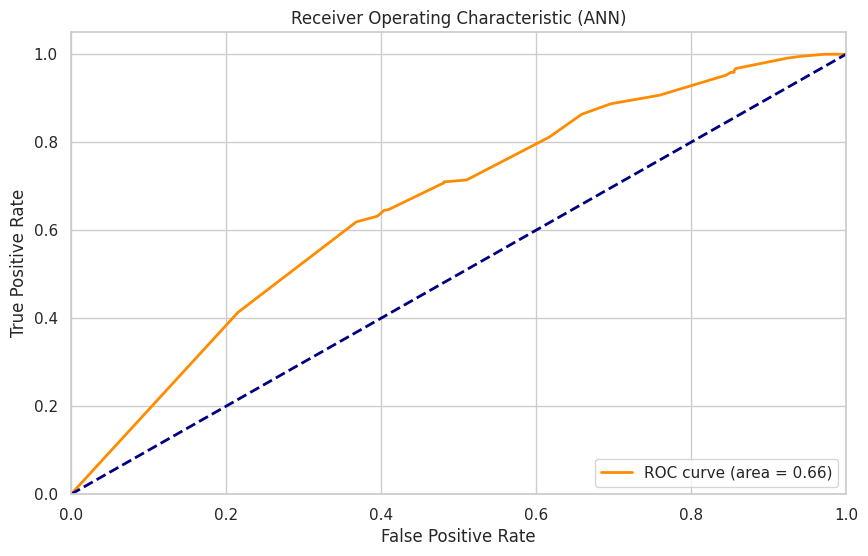

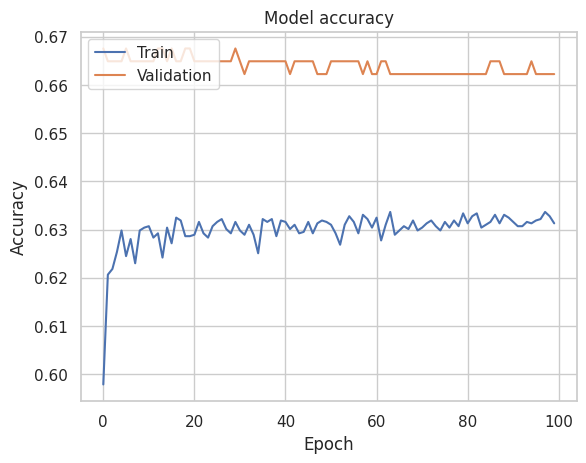

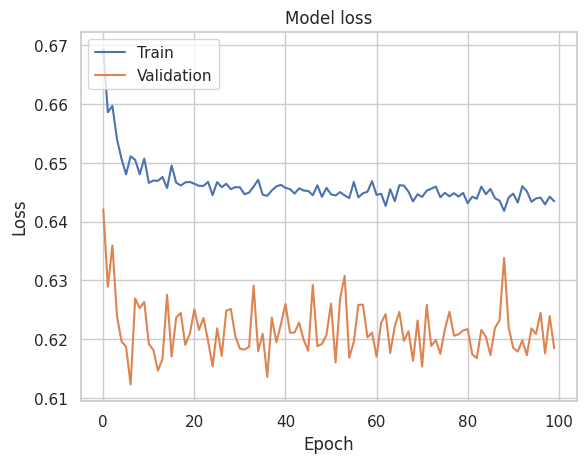

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# Prepare the data
X = data4.drop('true_conversion', axis=1)
y = data4['true_conversion']

# Identify numerical and categorical features
numerical_cols = X.select_dtypes(include=np.number).columns
categorical_cols = X.select_dtypes(include=['object']).columns

# Create transformers
numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown="ignore")

# Combine transformers using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a pipeline
model_pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

# Fit and transform the training data
X_train_transformed = model_pipeline.fit_transform(X_train)

# Transform the testing data
X_test_transformed = model_pipeline.transform(X_test)

# Define the ANN model
model = keras.Sequential([
    layers.Dense(128, input_shape=(X_train_transformed.shape[1],)),  # First dense layer
    layers.LeakyReLU(alpha=0.01),  # LeakyReLU with alpha=0.01
    layers.Dropout(0.2),  # Dropout layer for regularization
    layers.Dense(128),  # Second dense layer
    layers.LeakyReLU(alpha=0.01),  # LeakyReLU activation
    layers.Dropout(0.2),  # Dropout layer for regularization
    layers.Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train_transformed, y_train, epochs=100, batch_size=32, validation_split=0.1)

# Make predictions on the test set
y_pred_prob = model.predict(X_test_transformed)
y_pred = (y_pred_prob > 0.35).astype(int)

# Evaluate the model
loss, accuracy = model.evaluate(X_test_transformed, y_test, verbose=0)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix (ANN)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ANN)')
plt.legend(loc="lower right")
plt.show()

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


### XG Boost after SMOTE

Fitting 10 folds for each of 150 candidates, totalling 1500 fits


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [18:57:14] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


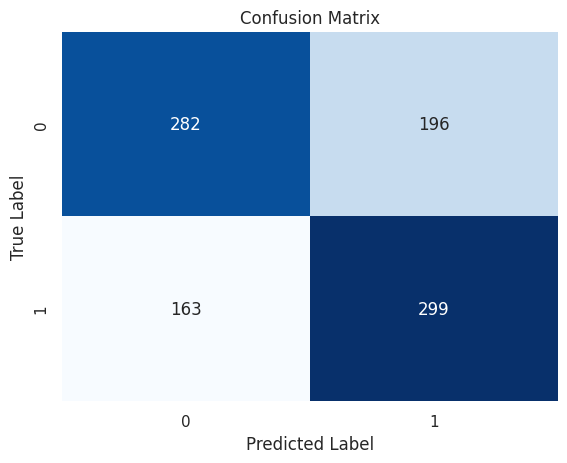

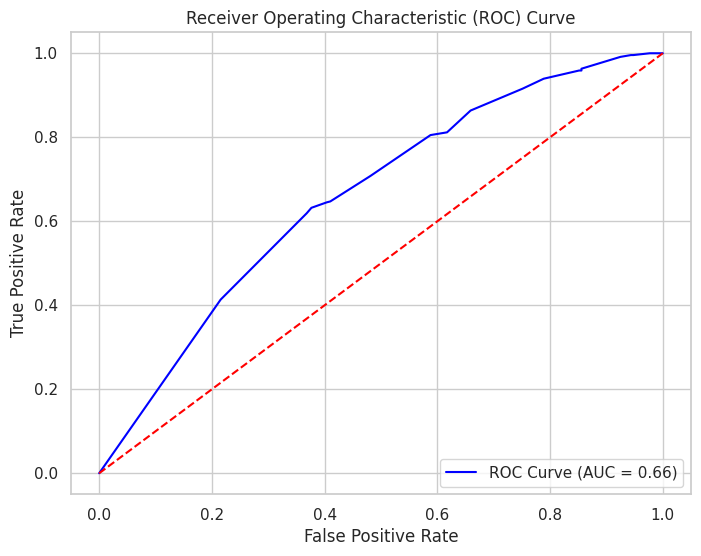

              precision    recall  f1-score   support

           0       0.63      0.59      0.61       478
           1       0.60      0.65      0.62       462

    accuracy                           0.62       940
   macro avg       0.62      0.62      0.62       940
weighted avg       0.62      0.62      0.62       940



In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# Separate features and target
X = data4.drop("true_conversion", axis=1)
y = data4["true_conversion"]

# Convert categorical features to numeric using one-hot encoding
X = pd.get_dummies(X, drop_first=True)

# Encode the target variable if it is categorical
le = LabelEncoder()
y = le.fit_transform(y)

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define parameter grid for XGBoost
param_dist = {
    "n_estimators": [100, 200, 300, 400, 500],
    "max_depth": [3, 5, 7, 9, 11],
    "learning_rate": [0.01, 0.05, 0.1, 0.15, 0.2],
    "subsample": [0.6, 0.7, 0.8, 0.9, 1.0],
    "colsample_bytree": [0.6, 0.7, 0.8, 0.9, 1.0],
    "gamma": [0, 0.1, 0.2, 0.3, 0.4],
    "min_child_weight": [1, 3, 5, 7]
}

# Initialize XGBoost classifier
xgb_clf = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Use RandomizedSearchCV to tune parameters
random_search = RandomizedSearchCV(
    estimator=xgb_clf,
    param_distributions=param_dist,
    n_iter=150,
    scoring='roc_auc',
    cv=10,
    verbose=1,
    n_jobs=-1,
    random_state=42
)

# Fit the model
random_search.fit(X_train, y_train)

# Get the best estimator
best_model = random_search.best_estimator_

# Make predictions
y_pred = best_model.predict(X_test)
y_pred_proba = best_model.predict_proba(X_test)[:, 1]

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color="blue", label="ROC Curve (AUC = {:.2f})".format(roc_auc))
plt.plot([0, 1], [0, 1], color="red", linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.show()

# Print classification report
print(classification_report(y_test, y_pred))


# Dataset Class Balancing by ADASYN (Adaptive Synthetic Algorithm)

In [61]:
data3

religion          politics college_educated parents homeowner  \
0        Christianity  Environmentalism                1       1         1   
1               Other         Communism                1       1         1   
2               Other      Conservative                1       1         1   
4               Other          Moderate                1       1         1   
6        Christianity         Communism                1       1         1   
...               ...               ...              ...     ...       ...   
1434335         Other          Moderate                1       1         1   
1434358         Other           Liberal                1       0         1   
1435329         Other      Conservatism                1       1         1   
1441325         Other          Moderate                0       1         0   
1441742         Other      Conservatism                0       1         1   

        gender    age income   area  true_conversion  
0            M  55-64  <100K  Urban                0  
1            M  55-64  <100K  Urban                0  
2            F  55-64  <100K  Urban                0  
4            F  55-64  >100K  Urban                0  
6            M  55-64  <100K  Rural                0  
...        ...    ...    ...    ...              ...  
1434335      F  45-54  <100K  Rural                0  
1434358      M  55-64  <100K  Rural                0  
1435329      F  18-24  >100K  Urban                0  
1441325      M  45-54  <100K  Urban                0  
1441742      F  45-54  >100K  Urban                0  

[2591 rows x 10 columns]

In [81]:
from sklearn.utils import shuffle
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
import pandas as pd

# Assuming 'data3' is your DataFrame
# Separate features and target variable
X = data3.drop('true_conversion', axis=1)
y = data3['true_conversion']

# Identify numerical and categorical features
numerical_cols = X.select_dtypes(include=np.number).columns
categorical_cols = X.select_dtypes(exclude=np.number).columns

# Apply Label Encoding to categorical features
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    label_encoders[col] = le

# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Create a new balanced DataFrame
data3_balanced = pd.DataFrame(X_resampled, columns=X.columns)
data3_balanced['true_conversion'] = y_resampled

# Now data3_balanced contains the balanced dataset with label-encoded categorical features
print("Balanced dataset class distribution:\n", data3_balanced['true_conversion'].value_counts())
data3_balanced

Balanced dataset class distribution:
 0    2349
1    2349
Name: true_conversion, dtype: int64


religion  politics  college_educated  parents  homeowner  gender  age  \
0            0         3                 1        1          1       1    3   
1            1         0                 1        1          1       1    3   
2            1         2                 1        1          1       0    3   
3            1         6                 1        1          1       0    3   
4            0         0                 1        1          1       1    3   
...        ...       ...               ...      ...        ...     ...  ...   
4693         0         3                 1        1          1       1    1   
4694         0         2                 1        1          1       0    3   
4695         1         6                 1        0          1       0    3   
4696         1         0                 1        1          1       0    3   
4697         0         5                 1        1          1       0    1   

      income  area  true_conversion  
0          0     1                0  
1          0     1                0  
2          0     1                0  
3          1     1                0  
4          0     0                0  
...      ...   ...              ...  
4693       0     0                1  
4694       0     0                1  
4695       1     0                1  
4696       0     1                1  
4697       1     0                1  

[4698 rows x 10 columns]

# Classification Models after ADASYN

### Decision Tree Model after ADASYN

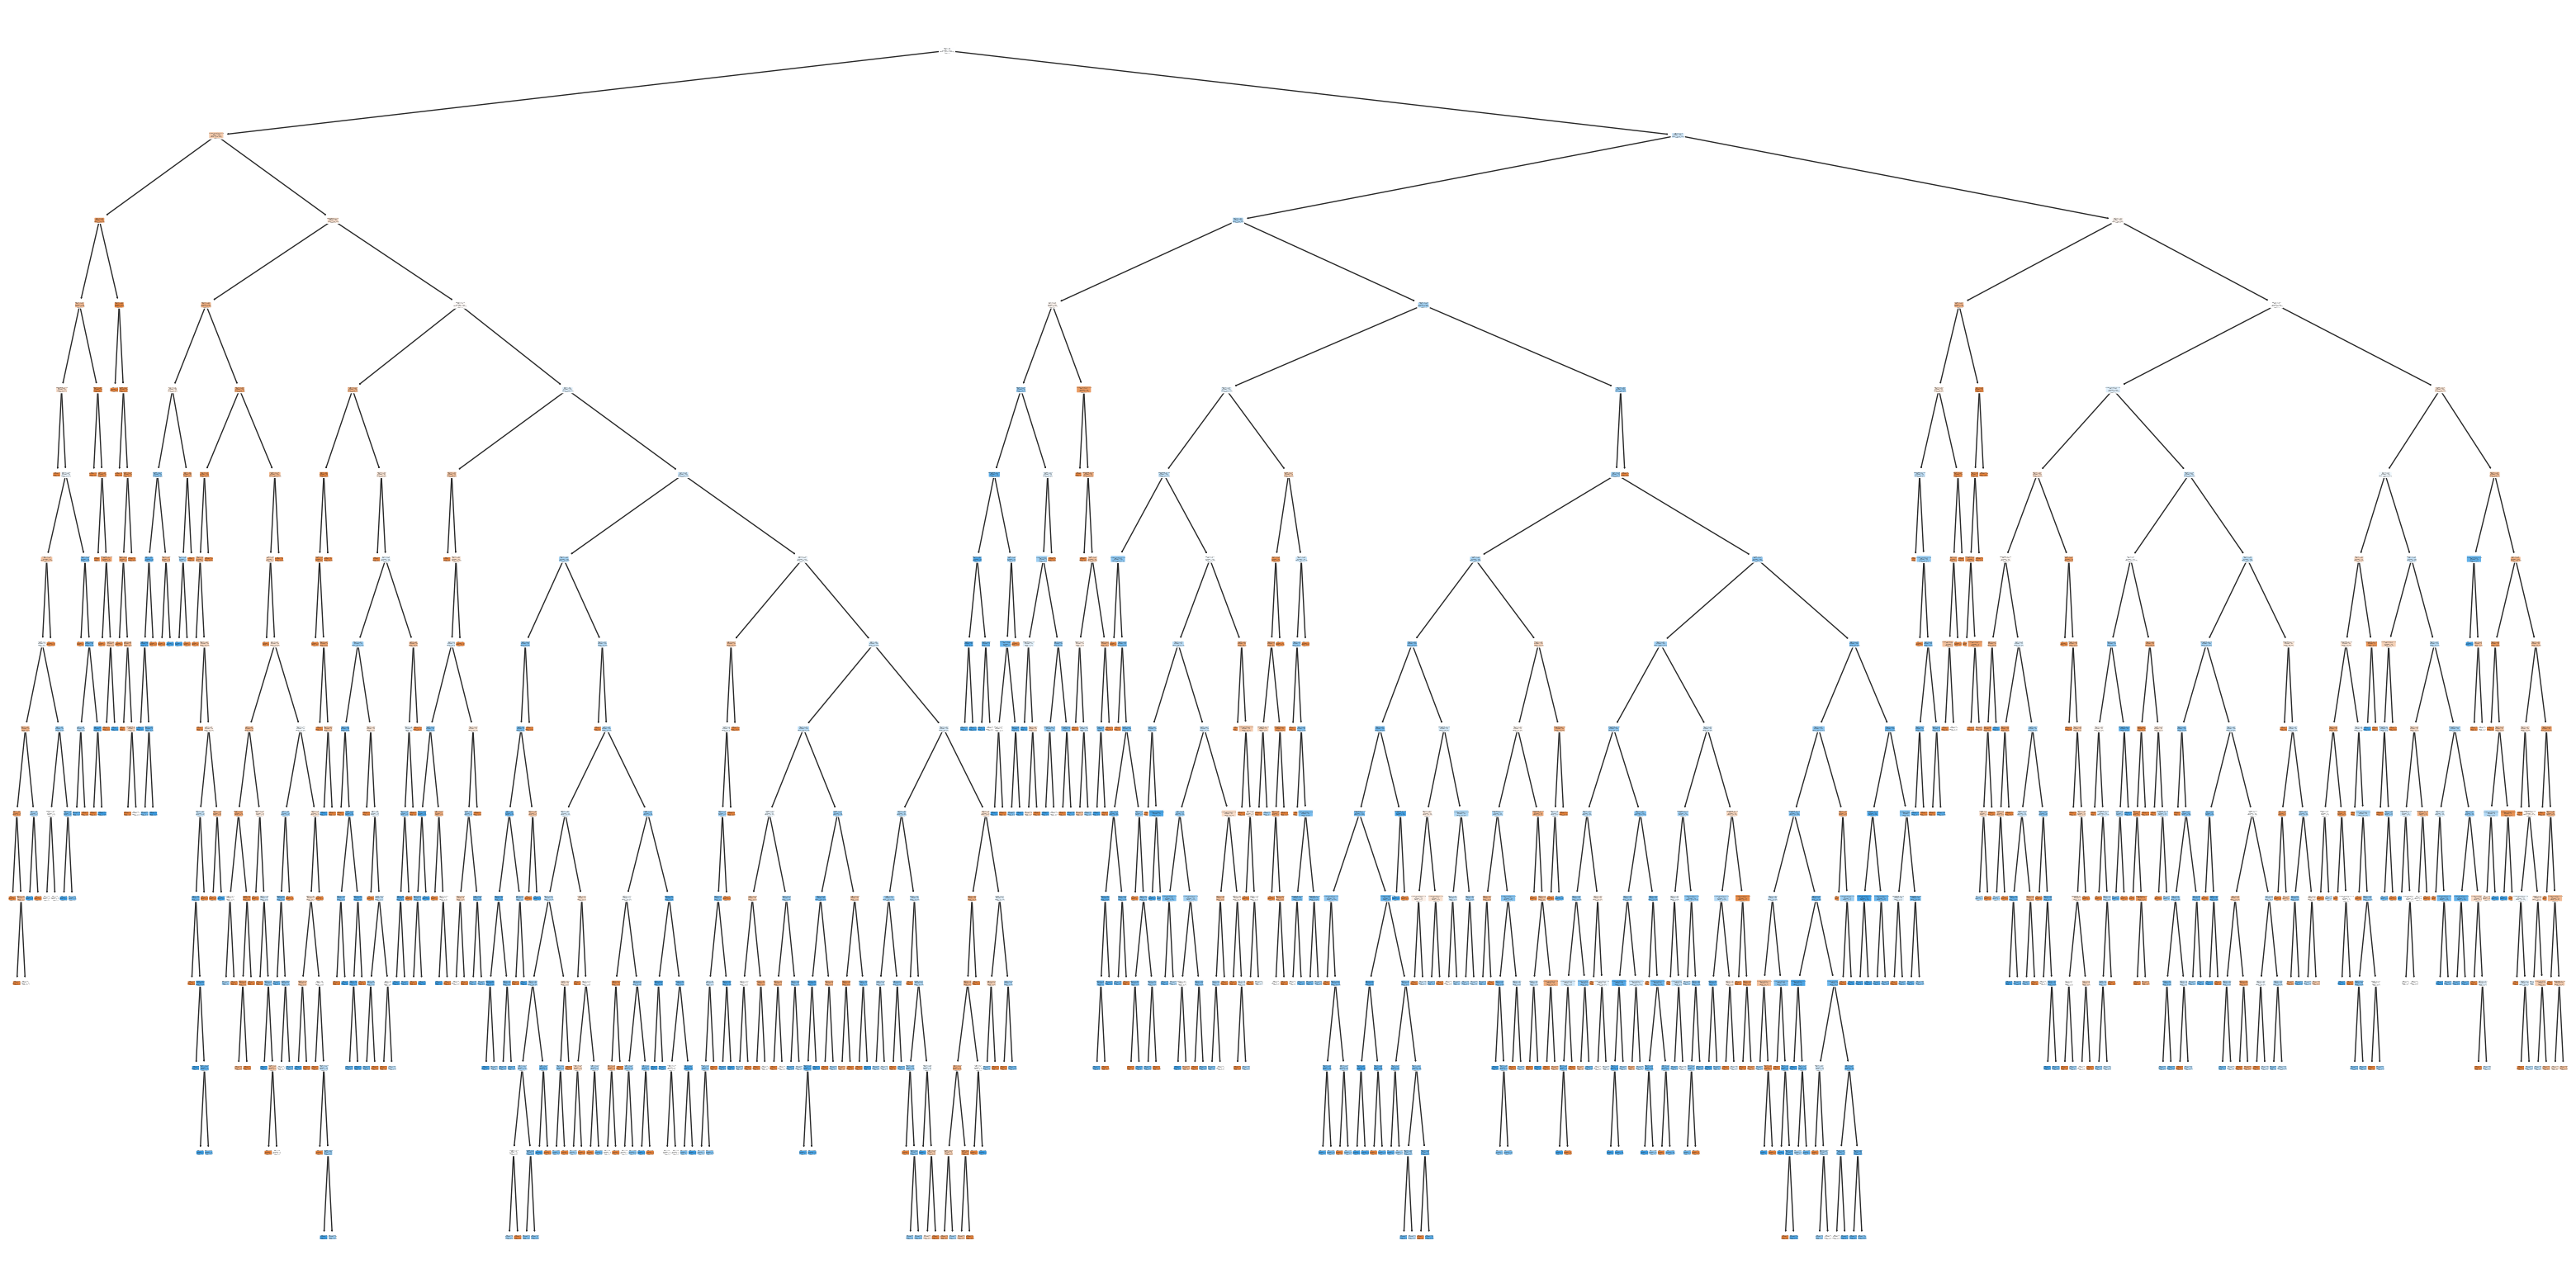

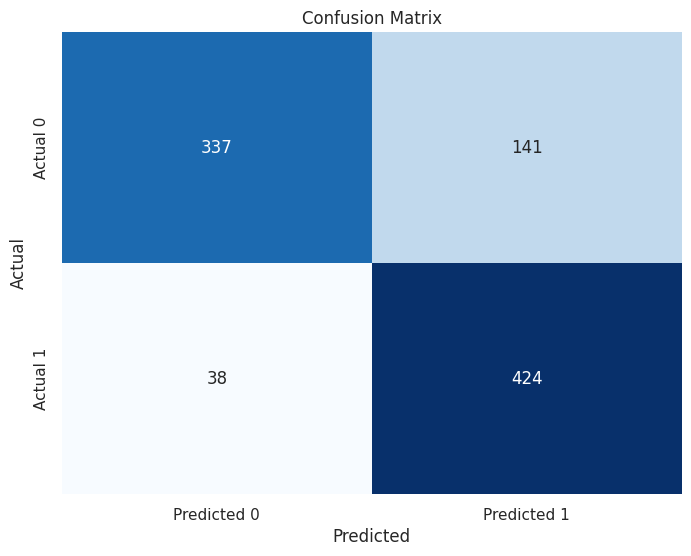

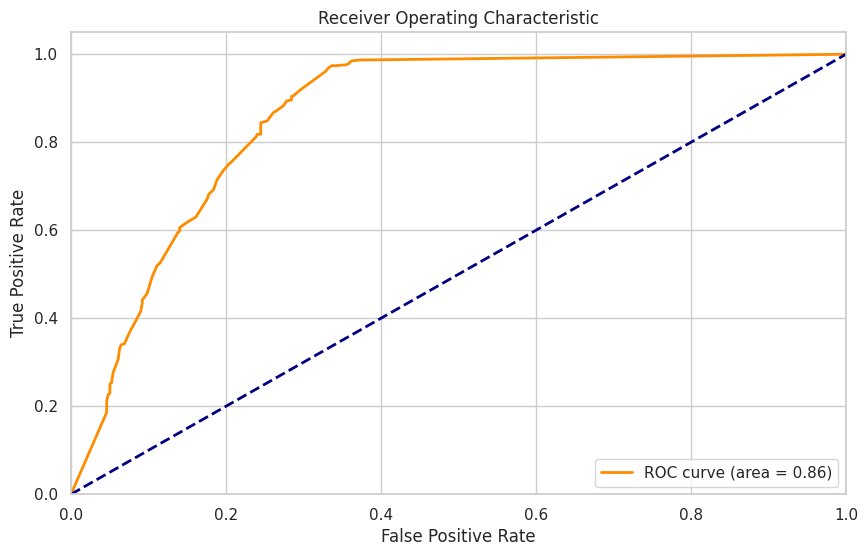

In [86]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# Prepare the data
X = data3_balanced.drop('true_conversion', axis=1)
y = data3_balanced['true_conversion']

# Convert categorical features to numerical using one-hot encoding
X = pd.get_dummies(X, drop_first=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the decision tree classifier
clf = DecisionTreeClassifier(random_state=42)  # No max_depth for a fully grown tree
clf.fit(X_train, y_train)

# Visualize the decision tree
plt.figure(figsize=(40, 20))
plot_tree(clf, feature_names=X.columns, class_names=['0', '1'], filled=True, rounded=True)
plt.show()

# Make predictions on the test set
y_pred = clf.predict(X_test)
y_prob = clf.predict_proba(X_test)[:, 1]

# Evaluate the model
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

### Pre-Pruned Decision Tree Model after ADASYN

Best depth for maximum AUC: 15


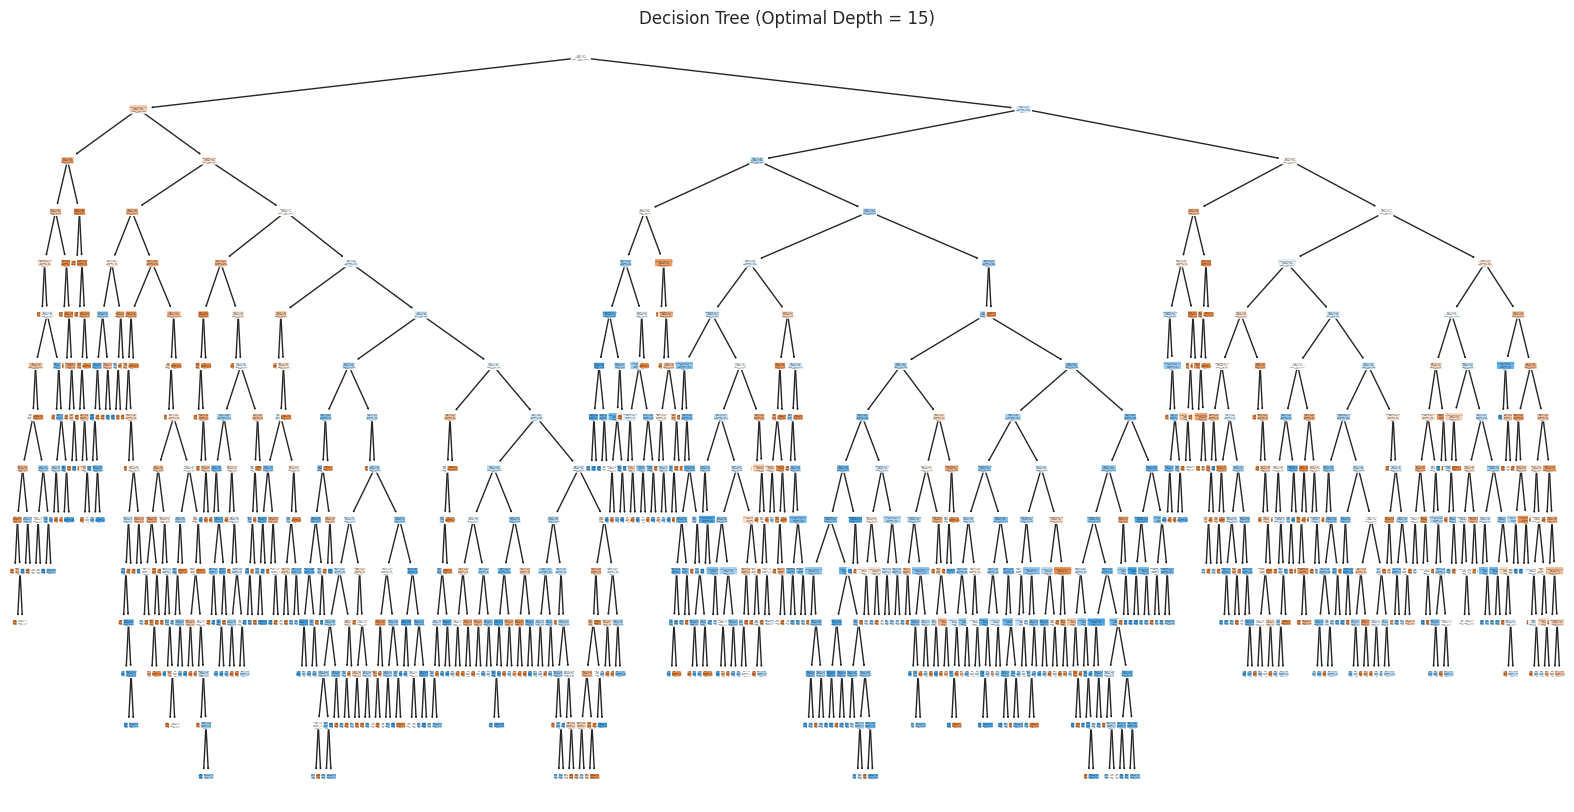

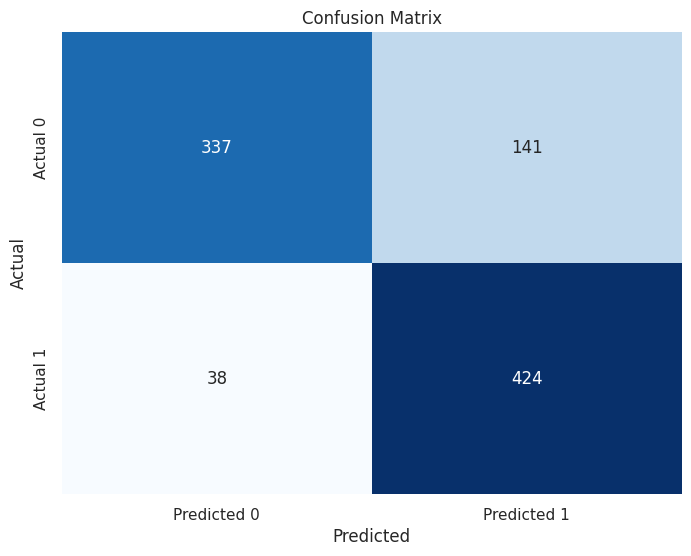

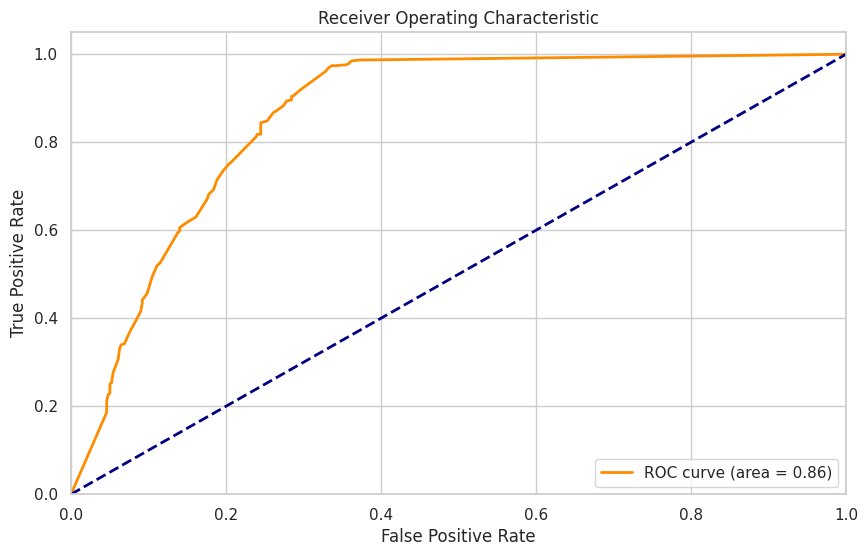

In [87]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import roc_auc_score, roc_curve, auc, confusion_matrix
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Initialize variables to store the best depth and the highest AUC score
best_depth = None
best_auc = 0
auc_scores = []

# Test max depths from 4 to 16
for depth in range(4, 16):
    clf = DecisionTreeClassifier(max_depth=depth, random_state=42)

    # Calculate the mean AUC score using cross-validation
    cv_auc = cross_val_score(clf, X_train, y_train, cv=5, scoring='roc_auc').mean()
    auc_scores.append(cv_auc)

    # Update best depth if current AUC is higher than the previous best
    if cv_auc > best_auc:
        best_auc = cv_auc
        best_depth = depth

# Prepare the data
X = data3_balanced.drop('true_conversion', axis=1)
y = data3_balanced['true_conversion']

# Convert categorical features to numerical using one-hot encoding
X = pd.get_dummies(X, drop_first=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the decision tree with the best depth
clf_best = DecisionTreeClassifier(max_depth=best_depth, random_state=42)
clf_best.fit(X_train, y_train)

# Display the best depth
print(f"Best depth for maximum AUC: {best_depth}")

# Visualize the decision tree with the best depth
plt.figure(figsize=(20, 10))
plot_tree(clf_best, feature_names=X.columns, class_names=['0', '1'], filled=True, rounded=True)
plt.title(f"Decision Tree (Optimal Depth = {best_depth})")
plt.show()

# Make predictions and calculate AUC on the test set
y_pred = clf_best.predict(X_test)
y_prob = clf_best.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Plot ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


### Post-Pruned Decision Tree Model after ADASYN

Best ccp_alpha for maximum validation accuracy: 6.0822626016877965e-05


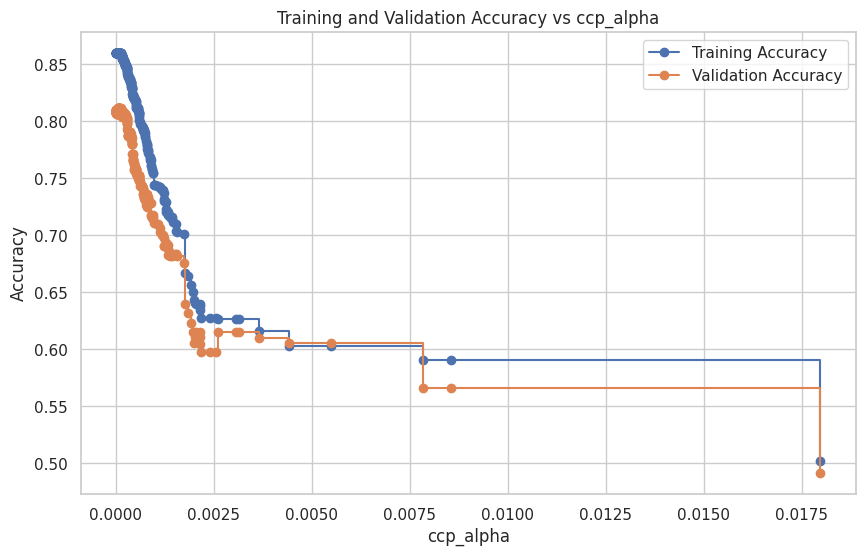

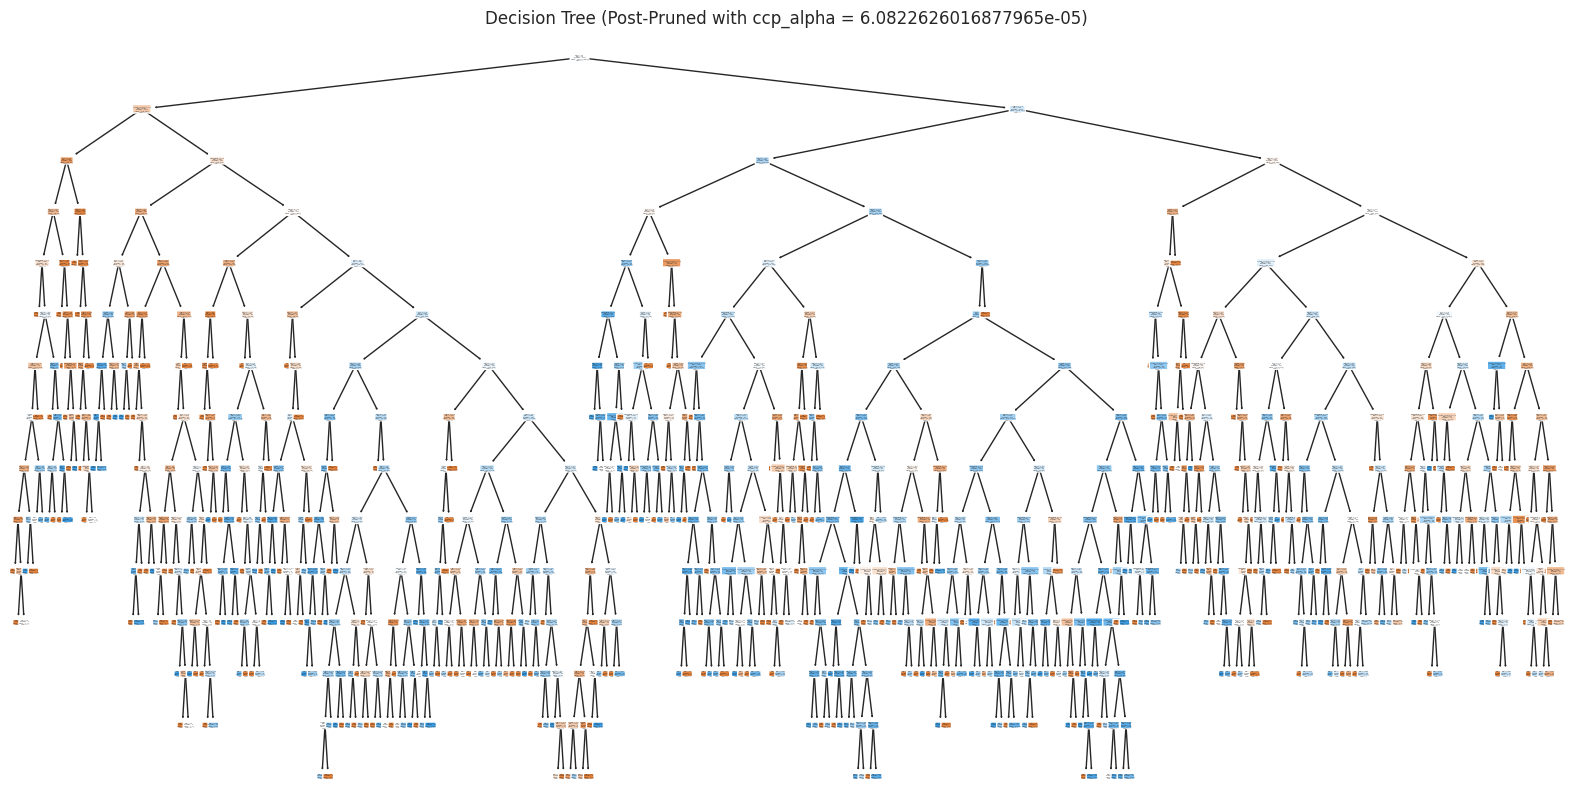

Test accuracy with best ccp_alpha: 0.8117021276595745


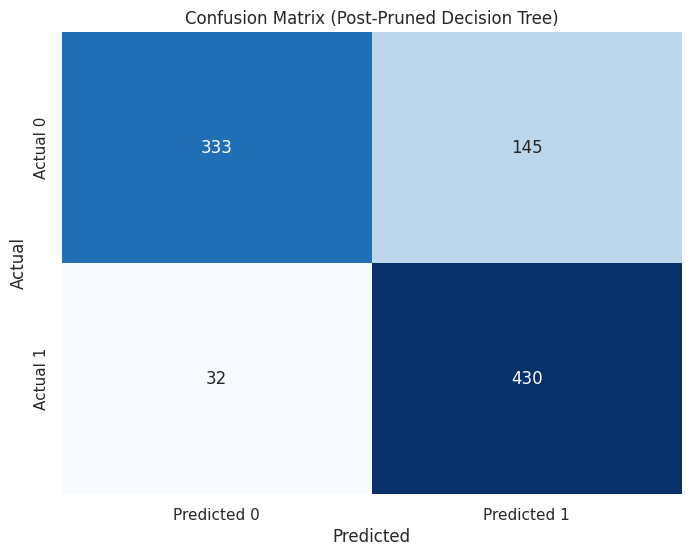

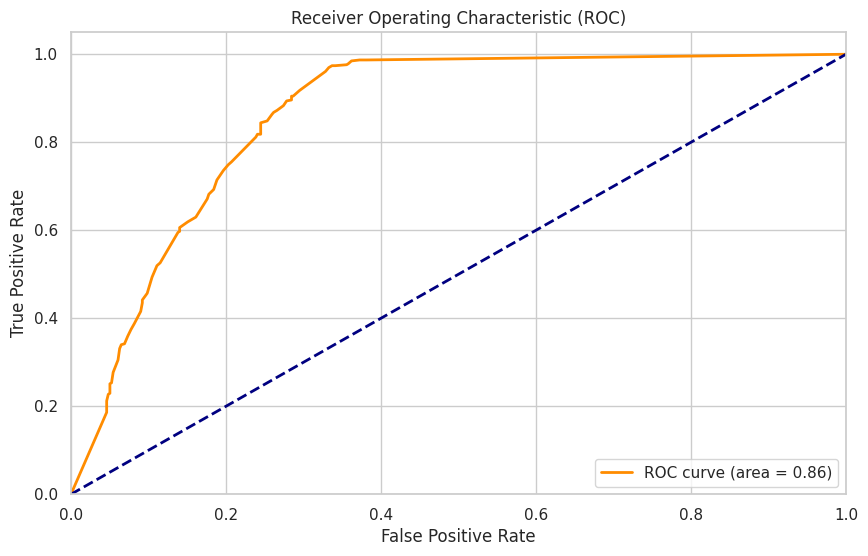

In [88]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# Prepare the data
X = data3_balanced.drop('true_conversion', axis=1)
y = data3_balanced['true_conversion']

# Convert categorical features to numerical using one-hot encoding
X = pd.get_dummies(X, drop_first=True)

# Split the data into training and validation sets if not already done
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit a decision tree classifier to get the effective alphas
clf = DecisionTreeClassifier(random_state=42)
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas  # array of alpha values for pruning
clfs = []

# Train a series of decision trees with different ccp_alpha values
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=42, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)

# Calculate training and validation accuracies for each tree
train_scores = [accuracy_score(y_train, clf.predict(X_train)) for clf in clfs]
val_scores = [accuracy_score(y_val, clf.predict(X_val)) for clf in clfs]

# Identify the best alpha that gives the maximum validation accuracy
best_alpha_index = np.argmax(val_scores)
best_alpha = ccp_alphas[best_alpha_index]

print(f"Best ccp_alpha for maximum validation accuracy: {best_alpha}")

# Train the decision tree with the best ccp_alpha
clf_best = DecisionTreeClassifier(random_state=42, ccp_alpha=best_alpha)
clf_best.fit(X_train, y_train)

# Plot training and validation scores vs. ccp_alpha
plt.figure(figsize=(10, 6))
plt.plot(ccp_alphas, train_scores, marker='o', label='Training Accuracy', drawstyle="steps-post")
plt.plot(ccp_alphas, val_scores, marker='o', label='Validation Accuracy', drawstyle="steps-post")
plt.xlabel("ccp_alpha")
plt.ylabel("Accuracy")
plt.title("Training and Validation Accuracy vs ccp_alpha")
plt.legend()
plt.show()

# Visualize the pruned decision tree
plt.figure(figsize=(20, 10))
plot_tree(clf_best, feature_names=X.columns, class_names=['0', '1'], filled=True, rounded=True)
plt.title(f"Decision Tree (Post-Pruned with ccp_alpha = {best_alpha})")
plt.show()

# Evaluate on the test set
y_pred = clf_best.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)
print(f"Test accuracy with best ccp_alpha: {test_accuracy}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix (Post-Pruned Decision Tree)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# ROC Curve
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

### Naive Bayes Classifier after ADASYN

Accuracy: 0.6074468085106383
Precision: 0.5902912621359223
Recall: 0.658008658008658
F1-score: 0.6223132036847492
ROC AUC: 0.646538607835679


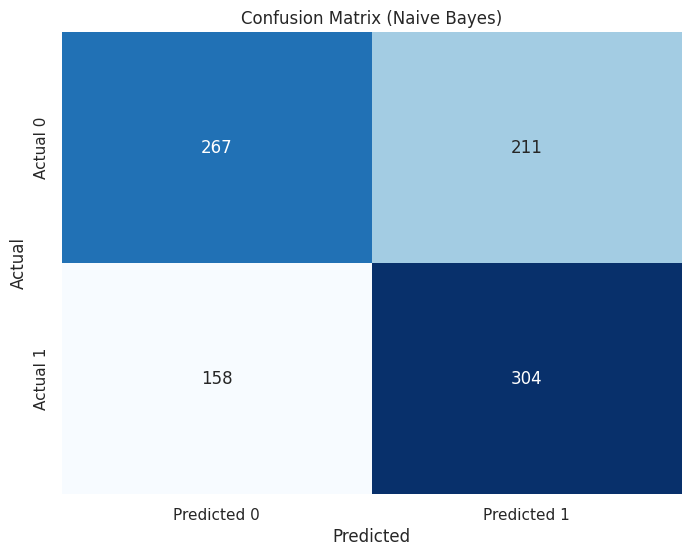

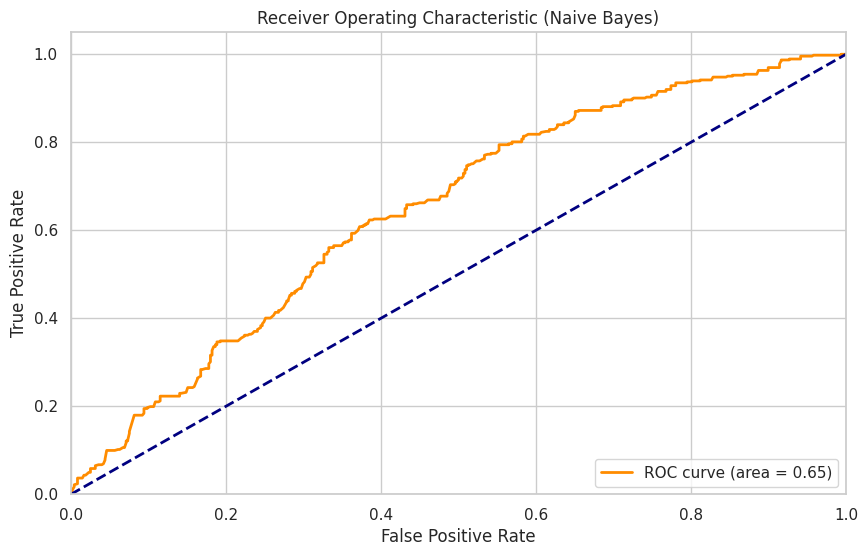

In [90]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# Prepare the data
X = data3_balanced.drop('true_conversion', axis=1)
y = data3_balanced['true_conversion']

# Convert categorical features to numerical using one-hot encoding
X = pd.get_dummies(X, drop_first=True)

# Split the data into training and validation sets if not already done
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Gaussian Naive Bayes classifier
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = nb_classifier.predict(X_test)
y_prob = nb_classifier.predict_proba(X_test)[:, 1]

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)


print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")
print(f"ROC AUC: {roc_auc}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix (Naive Bayes)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (Naive Bayes)')
plt.legend(loc="lower right")
plt.show()

### Bagging Classification Model after ADASYN

Bagging Classifier:
Best parameters: {'bootstrap': True, 'max_features': 1.0, 'max_samples': 0.6, 'n_estimators': 100}
              precision    recall  f1-score   support

           0       0.90      0.71      0.79       478
           1       0.75      0.92      0.83       462

    accuracy                           0.81       940
   macro avg       0.83      0.81      0.81       940
weighted avg       0.83      0.81      0.81       940

ROC AUC Score: 0.8872466445688203


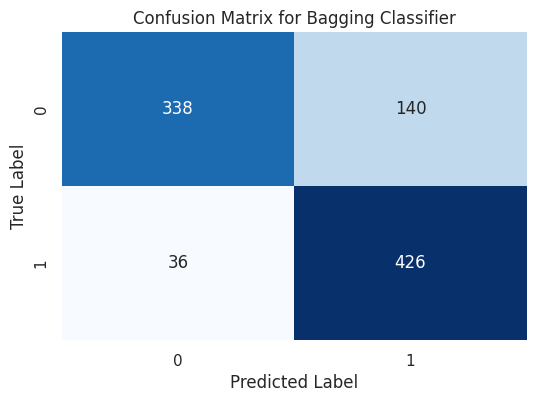

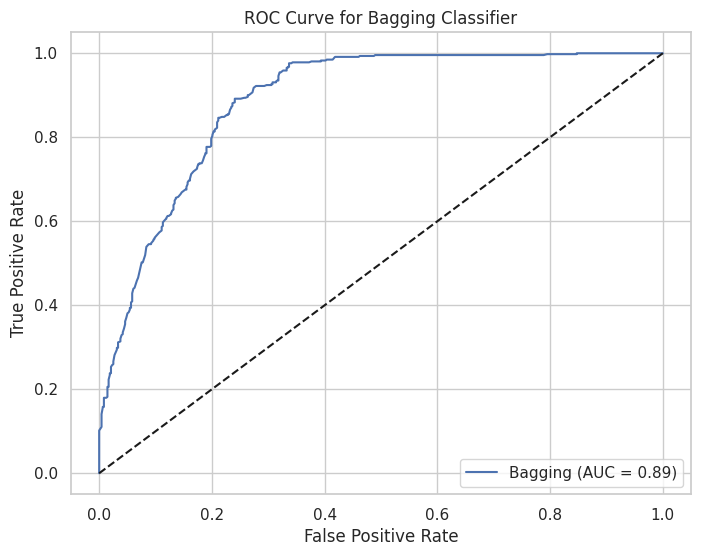

In [85]:
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, auc, confusion_matrix
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Separate features and target
X = data3_balanced.drop("true_conversion", axis=1)
y = data3_balanced["true_conversion"]

# Convert categorical features to numeric using one-hot encoding
X = pd.get_dummies(X, drop_first=True)

# Encode the target variable if it is categorical
le = LabelEncoder()
y = le.fit_transform(y)

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Bagging Classifier with extended parameter grid
bagging_clf = BaggingClassifier(random_state=42)
bagging_params = {
    'n_estimators': [50, 100, 200],
    'max_samples': [0.6, 0.8, 1.0],
    'max_features': [0.5, 0.75, 1.0],
    'bootstrap': [True, False]
}
bagging_grid = GridSearchCV(bagging_clf, bagging_params, cv=5, scoring='roc_auc')
bagging_grid.fit(X_train, y_train)
bagging_best = bagging_grid.best_estimator_

# Predictions and Evaluation
bagging_pred = bagging_best.predict(X_test)
bagging_prob = bagging_best.predict_proba(X_test)[:, 1]

# Print Best Parameters and Classification Report
print("Bagging Classifier:")
print("Best parameters:", bagging_grid.best_params_)
print(classification_report(y_test, bagging_pred))
print(f"ROC AUC Score: {roc_auc_score(y_test, bagging_prob)}")

# Confusion Matrix Heatmap
conf_matrix = confusion_matrix(y_test, bagging_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix for Bagging Classifier")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, bagging_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Bagging (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Random classifier line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Bagging Classifier')
plt.legend(loc='lower right')
plt.show()


### Random Forest after ADASYN


Random Forest Classifier:
Best parameters: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
              precision    recall  f1-score   support

           0       0.90      0.70      0.79       478
           1       0.75      0.92      0.83       462

    accuracy                           0.81       940
   macro avg       0.83      0.81      0.81       940
weighted avg       0.83      0.81      0.81       940

ROC AUC Score: 0.8903439656577731


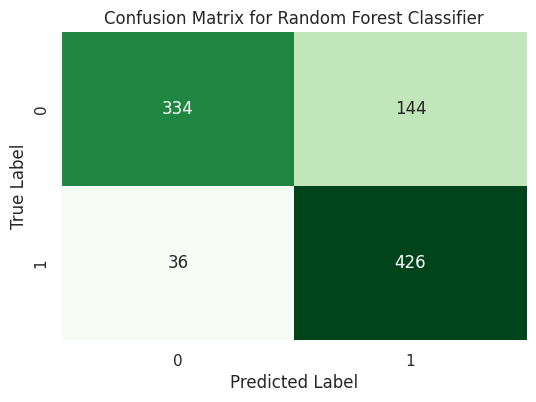

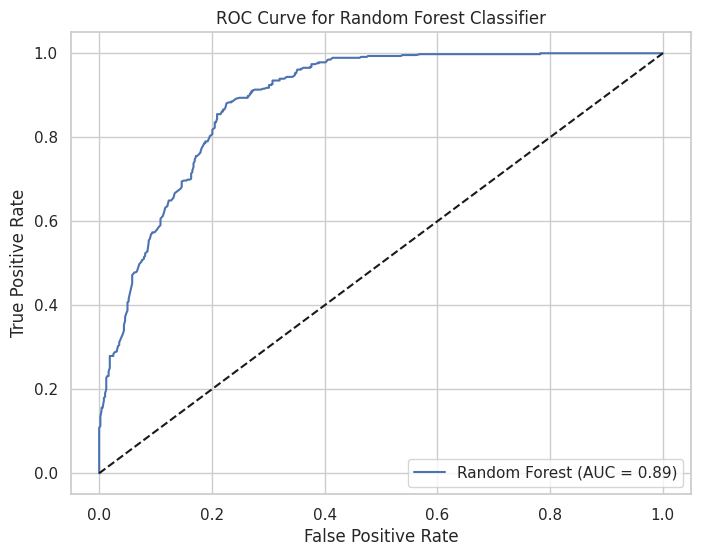


Feature Importances (Random Forest):
politics            0.297363
age                 0.147290
area                0.091798
homeowner           0.085036
income              0.084844
religion            0.078744
college_educated    0.074023
gender              0.071254
parents             0.069647
dtype: float64


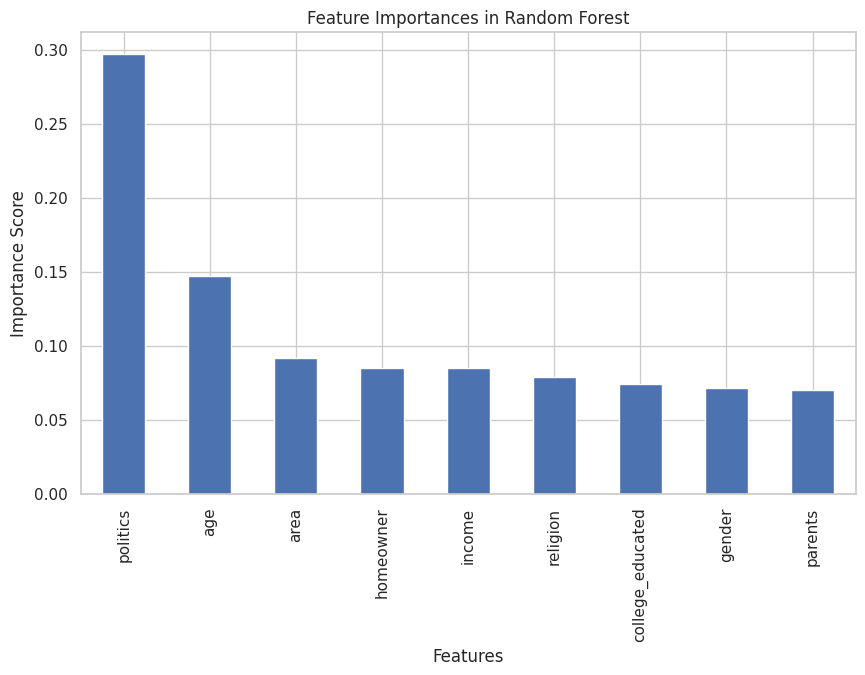

In [84]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, auc, confusion_matrix
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Separate features and target
X = data3_balanced.drop("true_conversion", axis=1)
y = data3_balanced["true_conversion"]

# Convert categorical features to numeric using one-hot encoding
X = pd.get_dummies(X, drop_first=True)

# Encode the target variable if it is categorical
le = LabelEncoder()
y = le.fit_transform(y)

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest Classifier with extended parameter grid
rf_clf = RandomForestClassifier(random_state=42)
rf_params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]
}
rf_grid = GridSearchCV(rf_clf, rf_params, cv=5, scoring='roc_auc')
rf_grid.fit(X_train, y_train)
rf_best = rf_grid.best_estimator_

# Predictions and Evaluation
rf_pred = rf_best.predict(X_test)
rf_prob = rf_best.predict_proba(X_test)[:, 1]

# Print Best Parameters and Classification Report
print("\nRandom Forest Classifier:")
print("Best parameters:", rf_grid.best_params_)
print(classification_report(y_test, rf_pred))
print(f"ROC AUC Score: {roc_auc_score(y_test, rf_prob)}")

# Confusion Matrix Heatmap
conf_matrix_rf = confusion_matrix(y_test, rf_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_rf, annot=True, fmt="d", cmap="Greens", cbar=False)
plt.title("Confusion Matrix for Random Forest Classifier")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# ROC Curve
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, rf_prob)
roc_auc_rf = auc(fpr_rf, tpr_rf)

plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {roc_auc_rf:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Random classifier line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Random Forest Classifier')
plt.legend(loc='lower right')
plt.show()

# Feature Importance
rf_feature_importances = pd.Series(rf_best.feature_importances_, index=X_train.columns).sort_values(ascending=False)
print("\nFeature Importances (Random Forest):")
print(rf_feature_importances)

# Plot feature importances
plt.figure(figsize=(10, 6))
rf_feature_importances.plot(kind='bar')
plt.title("Feature Importances in Random Forest")
plt.xlabel("Features")
plt.ylabel("Importance Score")
plt.show()


### XG Boost after ADASYN

Fitting 10 folds for each of 150 candidates, totalling 1500 fits


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [19:54:16] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


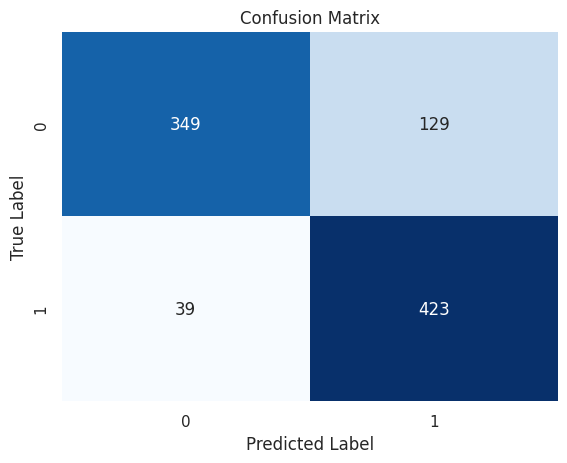

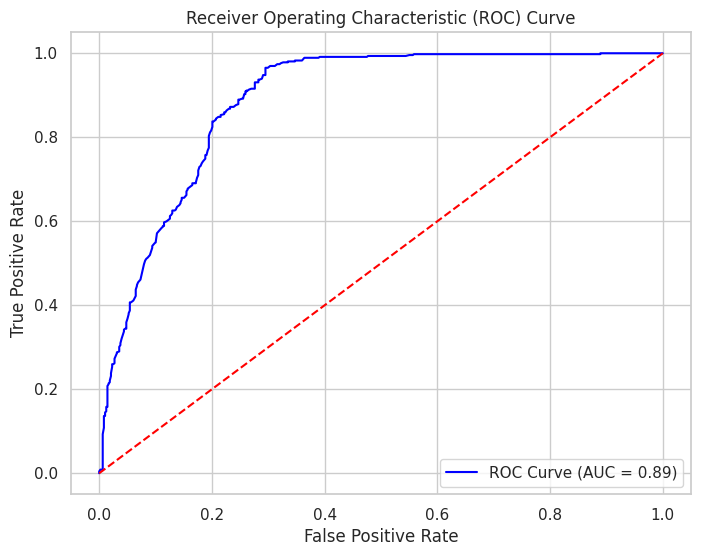

              precision    recall  f1-score   support

           0       0.90      0.73      0.81       478
           1       0.77      0.92      0.83       462

    accuracy                           0.82       940
   macro avg       0.83      0.82      0.82       940
weighted avg       0.83      0.82      0.82       940



In [82]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# Separate features and target
X = data3_balanced.drop("true_conversion", axis=1)
y = data3_balanced["true_conversion"]

# Convert categorical features to numeric using one-hot encoding
X = pd.get_dummies(X, drop_first=True)

# Encode the target variable if it is categorical
le = LabelEncoder()
y = le.fit_transform(y)

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define parameter grid for XGBoost
param_dist = {
    "n_estimators": [100, 200, 300, 400, 500],
    "max_depth": [3, 5, 7, 9, 11],
    "learning_rate": [0.01, 0.05, 0.1, 0.15, 0.2],
    "subsample": [0.6, 0.7, 0.8, 0.9, 1.0],
    "colsample_bytree": [0.6, 0.7, 0.8, 0.9, 1.0],
    "gamma": [0, 0.1, 0.2, 0.3, 0.4],
    "min_child_weight": [1, 3, 5, 7]
}

# Initialize XGBoost classifier
xgb_clf = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Use RandomizedSearchCV to tune parameters
random_search = RandomizedSearchCV(
    estimator=xgb_clf,
    param_distributions=param_dist,
    n_iter=150,
    scoring='roc_auc',
    cv=10,
    verbose=1,
    n_jobs=-1,
    random_state=42
)

# Fit the model
random_search.fit(X_train, y_train)

# Get the best estimator
best_model = random_search.best_estimator_

# Make predictions
y_pred = best_model.predict(X_test)
y_pred_proba = best_model.predict_proba(X_test)[:, 1]

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color="blue", label="ROC Curve (AUC = {:.2f})".format(roc_auc))
plt.plot([0, 1], [0, 1], color="red", linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.show()

# Print classification report
print(classification_report(y_test, y_pred))


### Artificial Neural Network after ADASYN

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Epoch 1/100
106/106 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.5875 - loss: 0.6669 - val_accuracy: 0.6090 - val_loss: 0.6355
Epoch 2/100
106/106 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6498 - loss: 0.6229 - val_accuracy: 0.6596 - val_loss: 0.6083
Epoch 3/100
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6637 - loss: 0.6011 - val_accuracy: 0.6915 - val_loss: 0.6099
Epoch 4/100
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6906 - loss: 0.5876 - val_accuracy: 0.6809 - val_loss: 0.6049
Epoch 5/100
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6996 - loss: 0.5688 - val_accuracy: 0.6968 - val_loss: 0.5873
Epoch 6/100
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7023 - loss: 0.5597 - val_accuracy: 0.7101 - val_loss: 0.5693
Epoch 7/100
106/106 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6993 - loss: 0.5564 - val_accuracy: 0.7048 - val_loss: 0.5726
Epoch 8/100
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7147 - loss: 0.5535 - val_acc

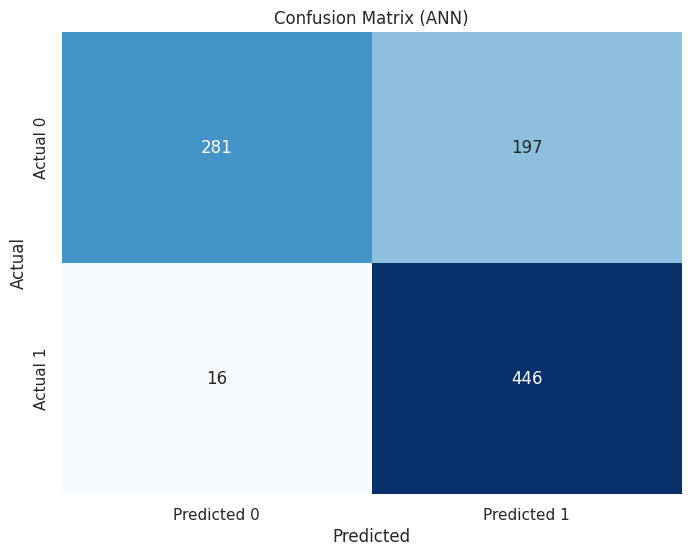

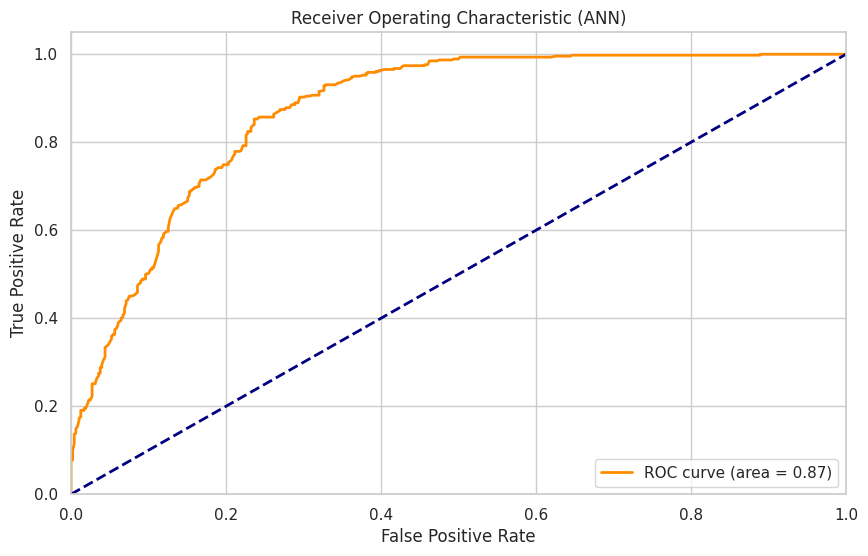

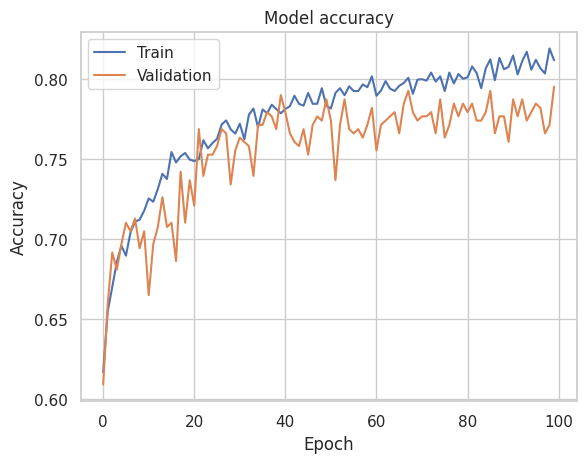

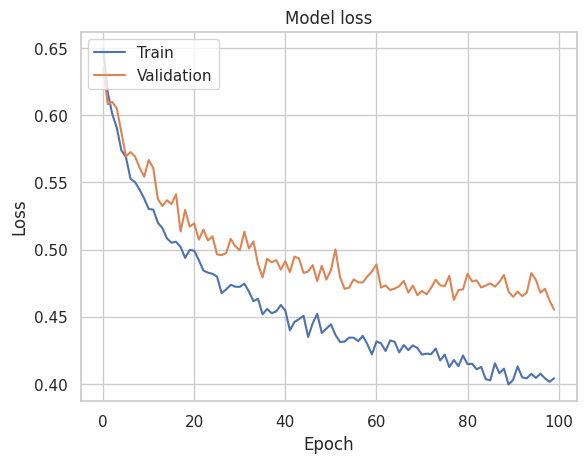

In [83]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# Prepare the data
X = data3_balanced.drop('true_conversion', axis=1)
y = data3_balanced['true_conversion']

# Identify numerical and categorical features
numerical_cols = X.select_dtypes(include=np.number).columns
categorical_cols = X.select_dtypes(include=['object']).columns

# Create transformers
numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown="ignore")

# Combine transformers using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a pipeline
model_pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

# Fit and transform the training data
X_train_transformed = model_pipeline.fit_transform(X_train)

# Transform the testing data
X_test_transformed = model_pipeline.transform(X_test)

# Define the ANN model
model = keras.Sequential([
    layers.Dense(128, input_shape=(X_train_transformed.shape[1],)),  # First dense layer
    layers.LeakyReLU(alpha=0.01),  # LeakyReLU with alpha=0.01
    layers.Dropout(0.2),  # Dropout layer for regularization
    layers.Dense(128),  # Second dense layer
    layers.LeakyReLU(alpha=0.01),  # LeakyReLU activation
    layers.Dropout(0.2),  # Dropout layer for regularization
    layers.Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train_transformed, y_train, epochs=100, batch_size=32, validation_split=0.1)

# Make predictions on the test set
y_pred_prob = model.predict(X_test_transformed)
y_pred = (y_pred_prob > 0.35).astype(int)

# Evaluate the model
loss, accuracy = model.evaluate(X_test_transformed, y_test, verbose=0)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix (ANN)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ANN)')
plt.legend(loc="lower right")
plt.show()

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


In [95]:
from google.colab import files

# Convert data2 DataFrame to CSV file
data2.to_csv('data2.csv', index=False)  # Use index=False if you don't need the index in the file.

# Download the CSV file
files.download('data2.csv')

#If data3_balanced exists as a dataframe
data3_balanced.to_csv('data3_balanced.csv', index=False)
files.download('data3_balanced.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>